# Baseball Case Study

### Import Data from Website

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

# 

### EDA

In [3]:
df.shape

(30, 17)

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [7]:
df["CG"].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [8]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# 

### Checking Correlation

In [11]:
df.drop('W', axis=1). corrwith(df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

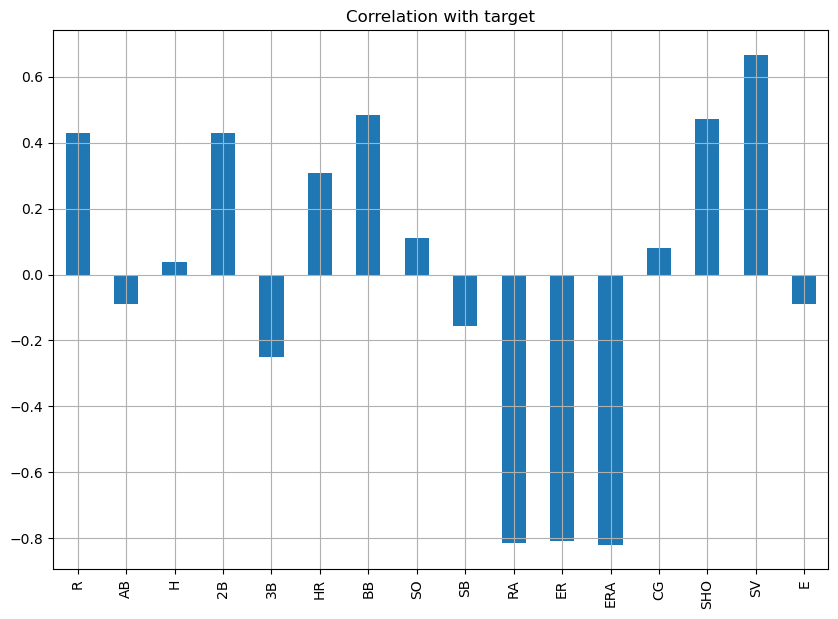

In [12]:
import matplotlib.pyplot as plt
df.drop('W', axis=1).corrwith(df.W).plot(kind='bar', grid=True, figsize=(10, 7), title="Correlation with target")
plt.show()

# 

### Checking Multi-correlation

In [13]:
x = df.drop(columns = ['W'])
y = df['W']

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif

VIF variables
0    1638.985029         R
1    4277.157018        AB
2    4698.798408         H
3     904.439835        2B
4      32.435486        3B
5     285.773237        HR
6     269.485018        BB
7     398.234104        SO
8      28.654970        SB
9   17204.829356        RA
10  49837.289228        ER
11  23551.544014       ERA
12      6.771036        CG
13     30.276598       SHO
14    119.686080        SV
15     94.215202         E

In [14]:
corr = df.corr()
corr

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

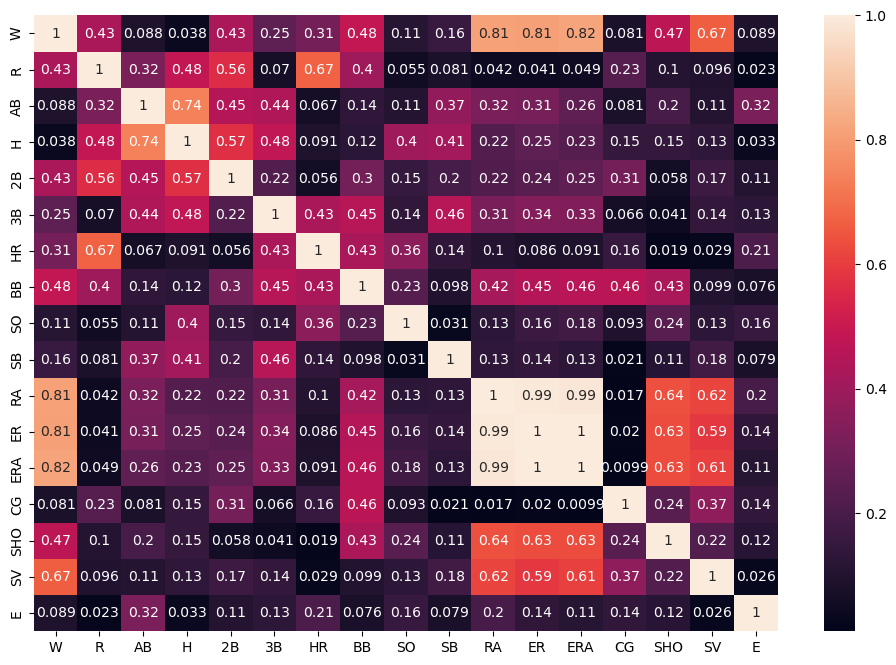

In [15]:
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Checking Contribution Score

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
x = df.drop(columns = ['W'])
y = df['W']

In [18]:
best_features = SelectKBest(score_func=f_classif, k=16)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(16, 'Score'))

   Feature_Name     Score
0             R  4.325471
8            SB  3.145176
14           SV  2.966365
9            RA  2.420967
15            E  2.403946
11          ERA  1.665038
10           ER  1.574876
1            AB  1.552727
7            SO  1.509218
13          SHO  1.204067
6            BB  1.048384
5            HR  0.989166
3            2B  0.904863
4            3B  0.850035
2             H  0.763151
12           CG  0.383449


# 

### Checking Skewness

In [19]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [20]:
import warnings
warnings.filterwarnings ('ignore')

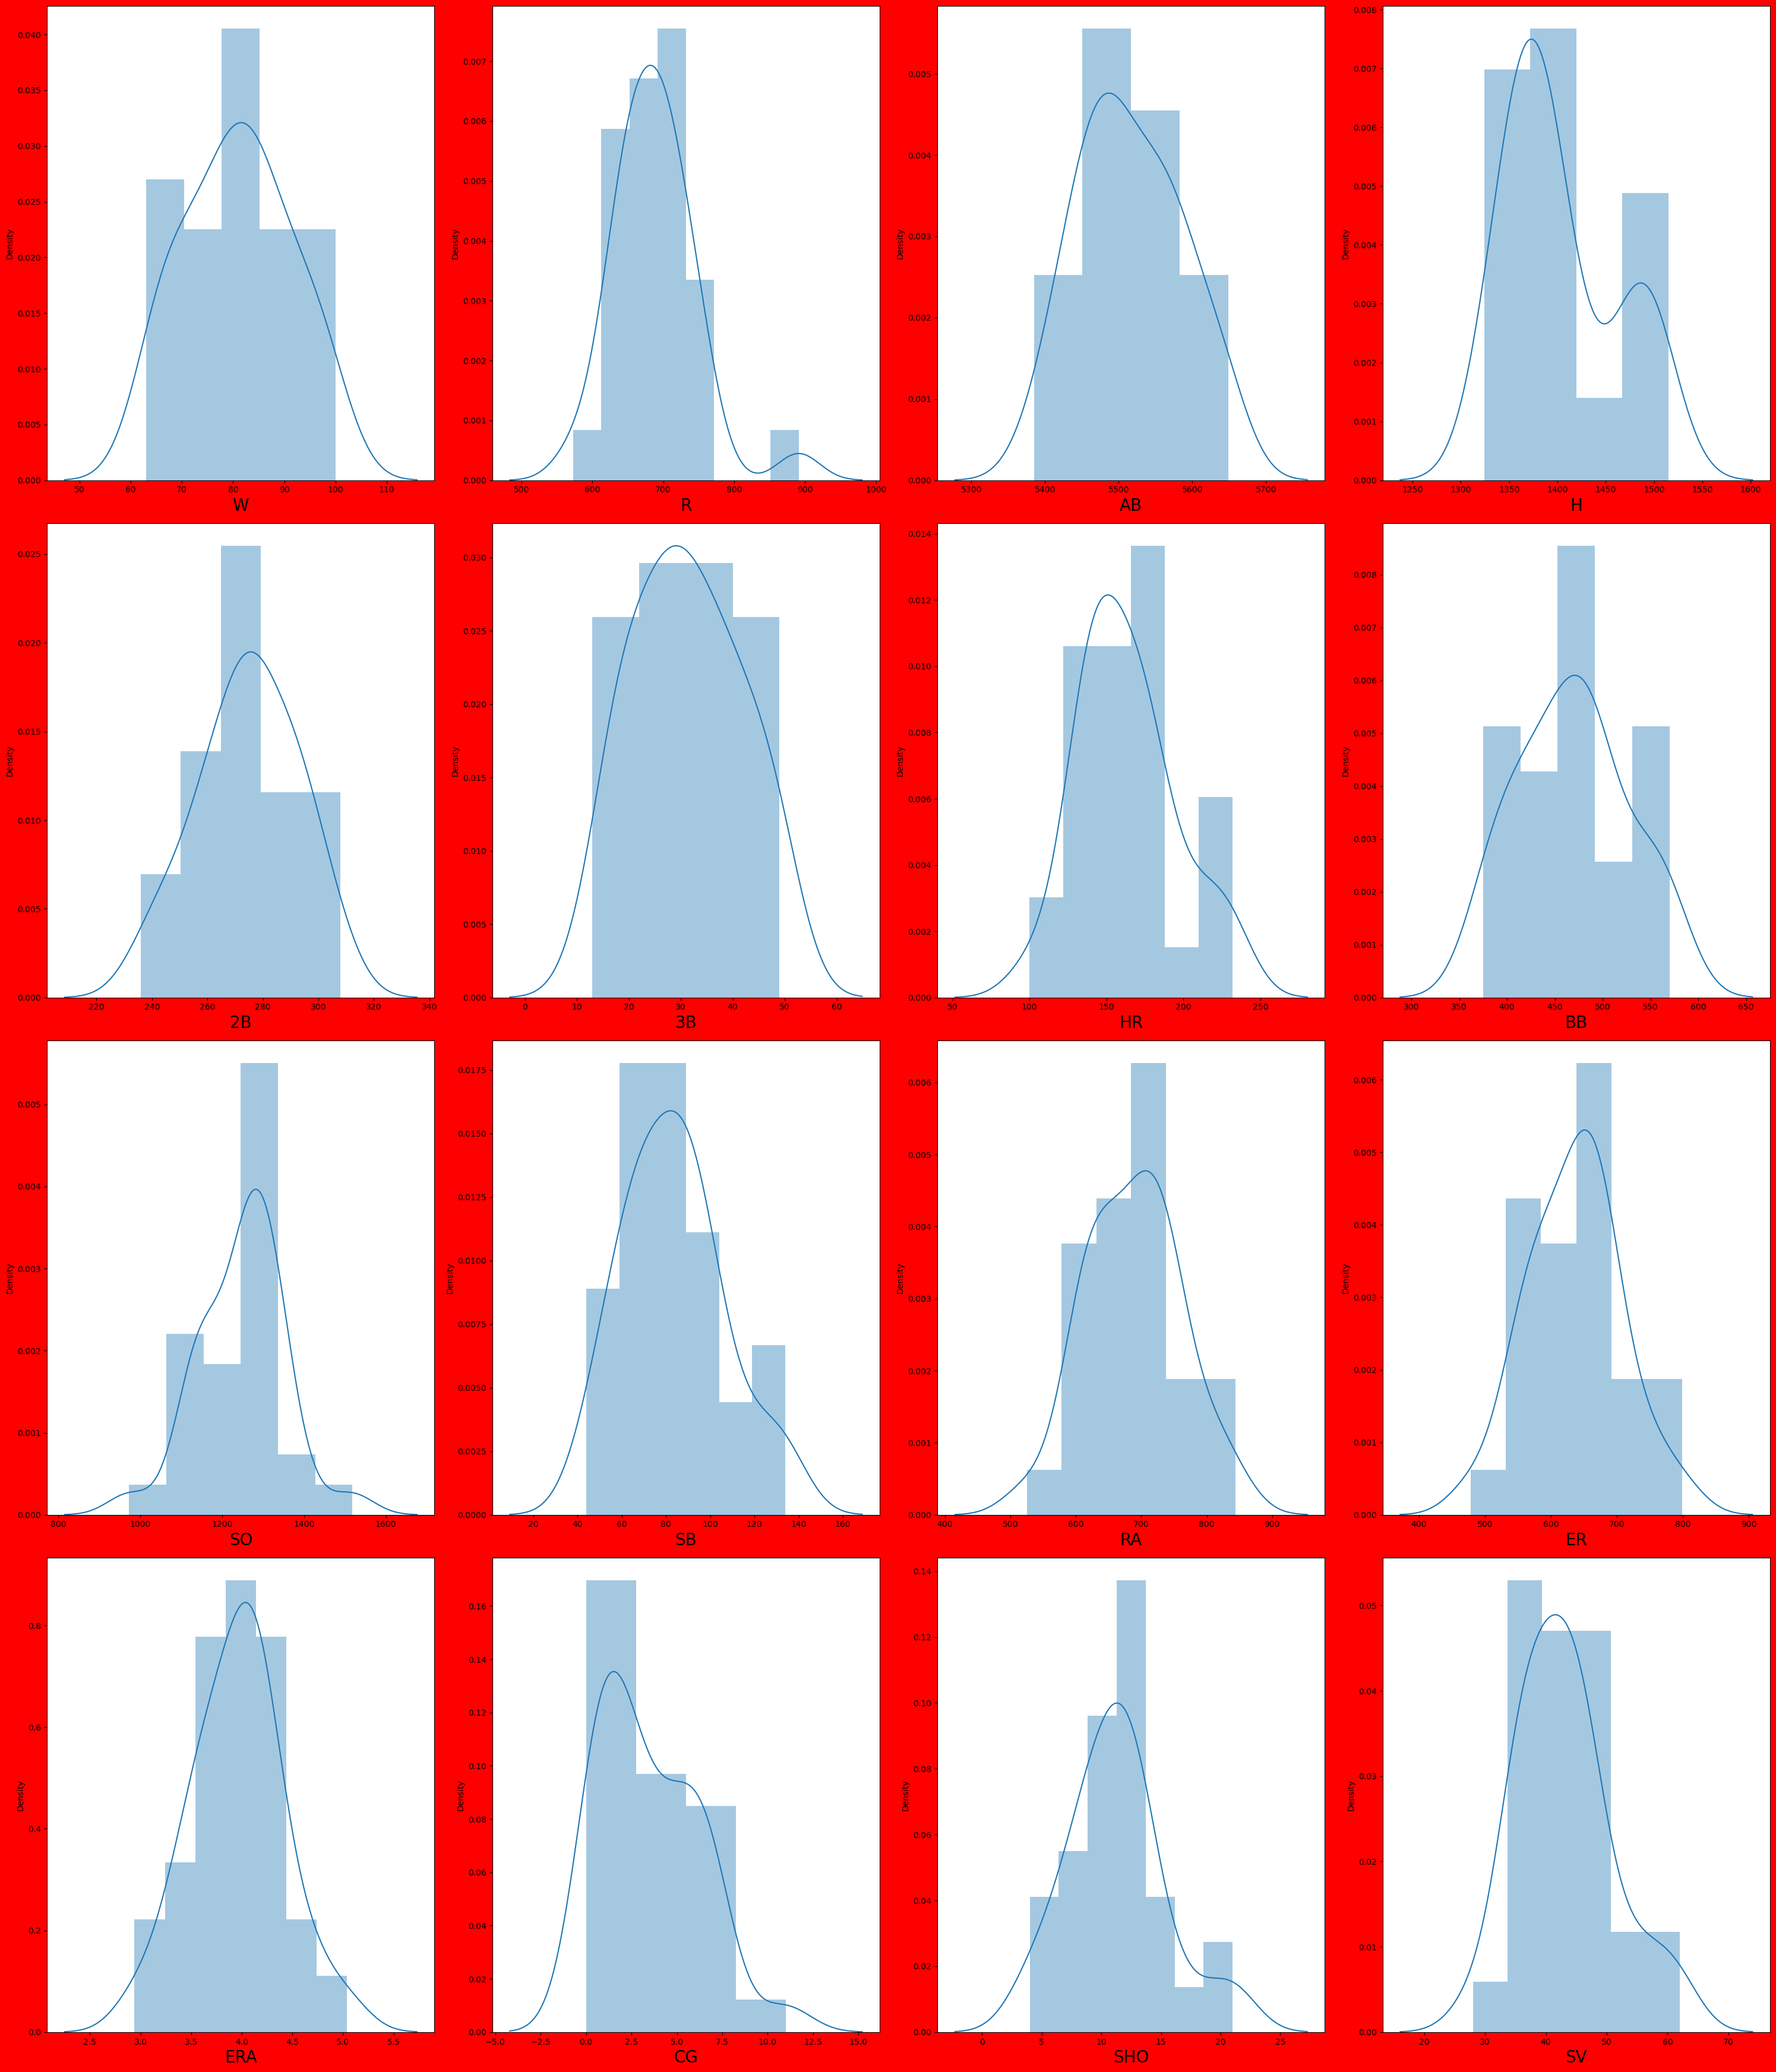

In [21]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Checking Outliners

In [22]:
df_features = df.drop('W',axis=1)

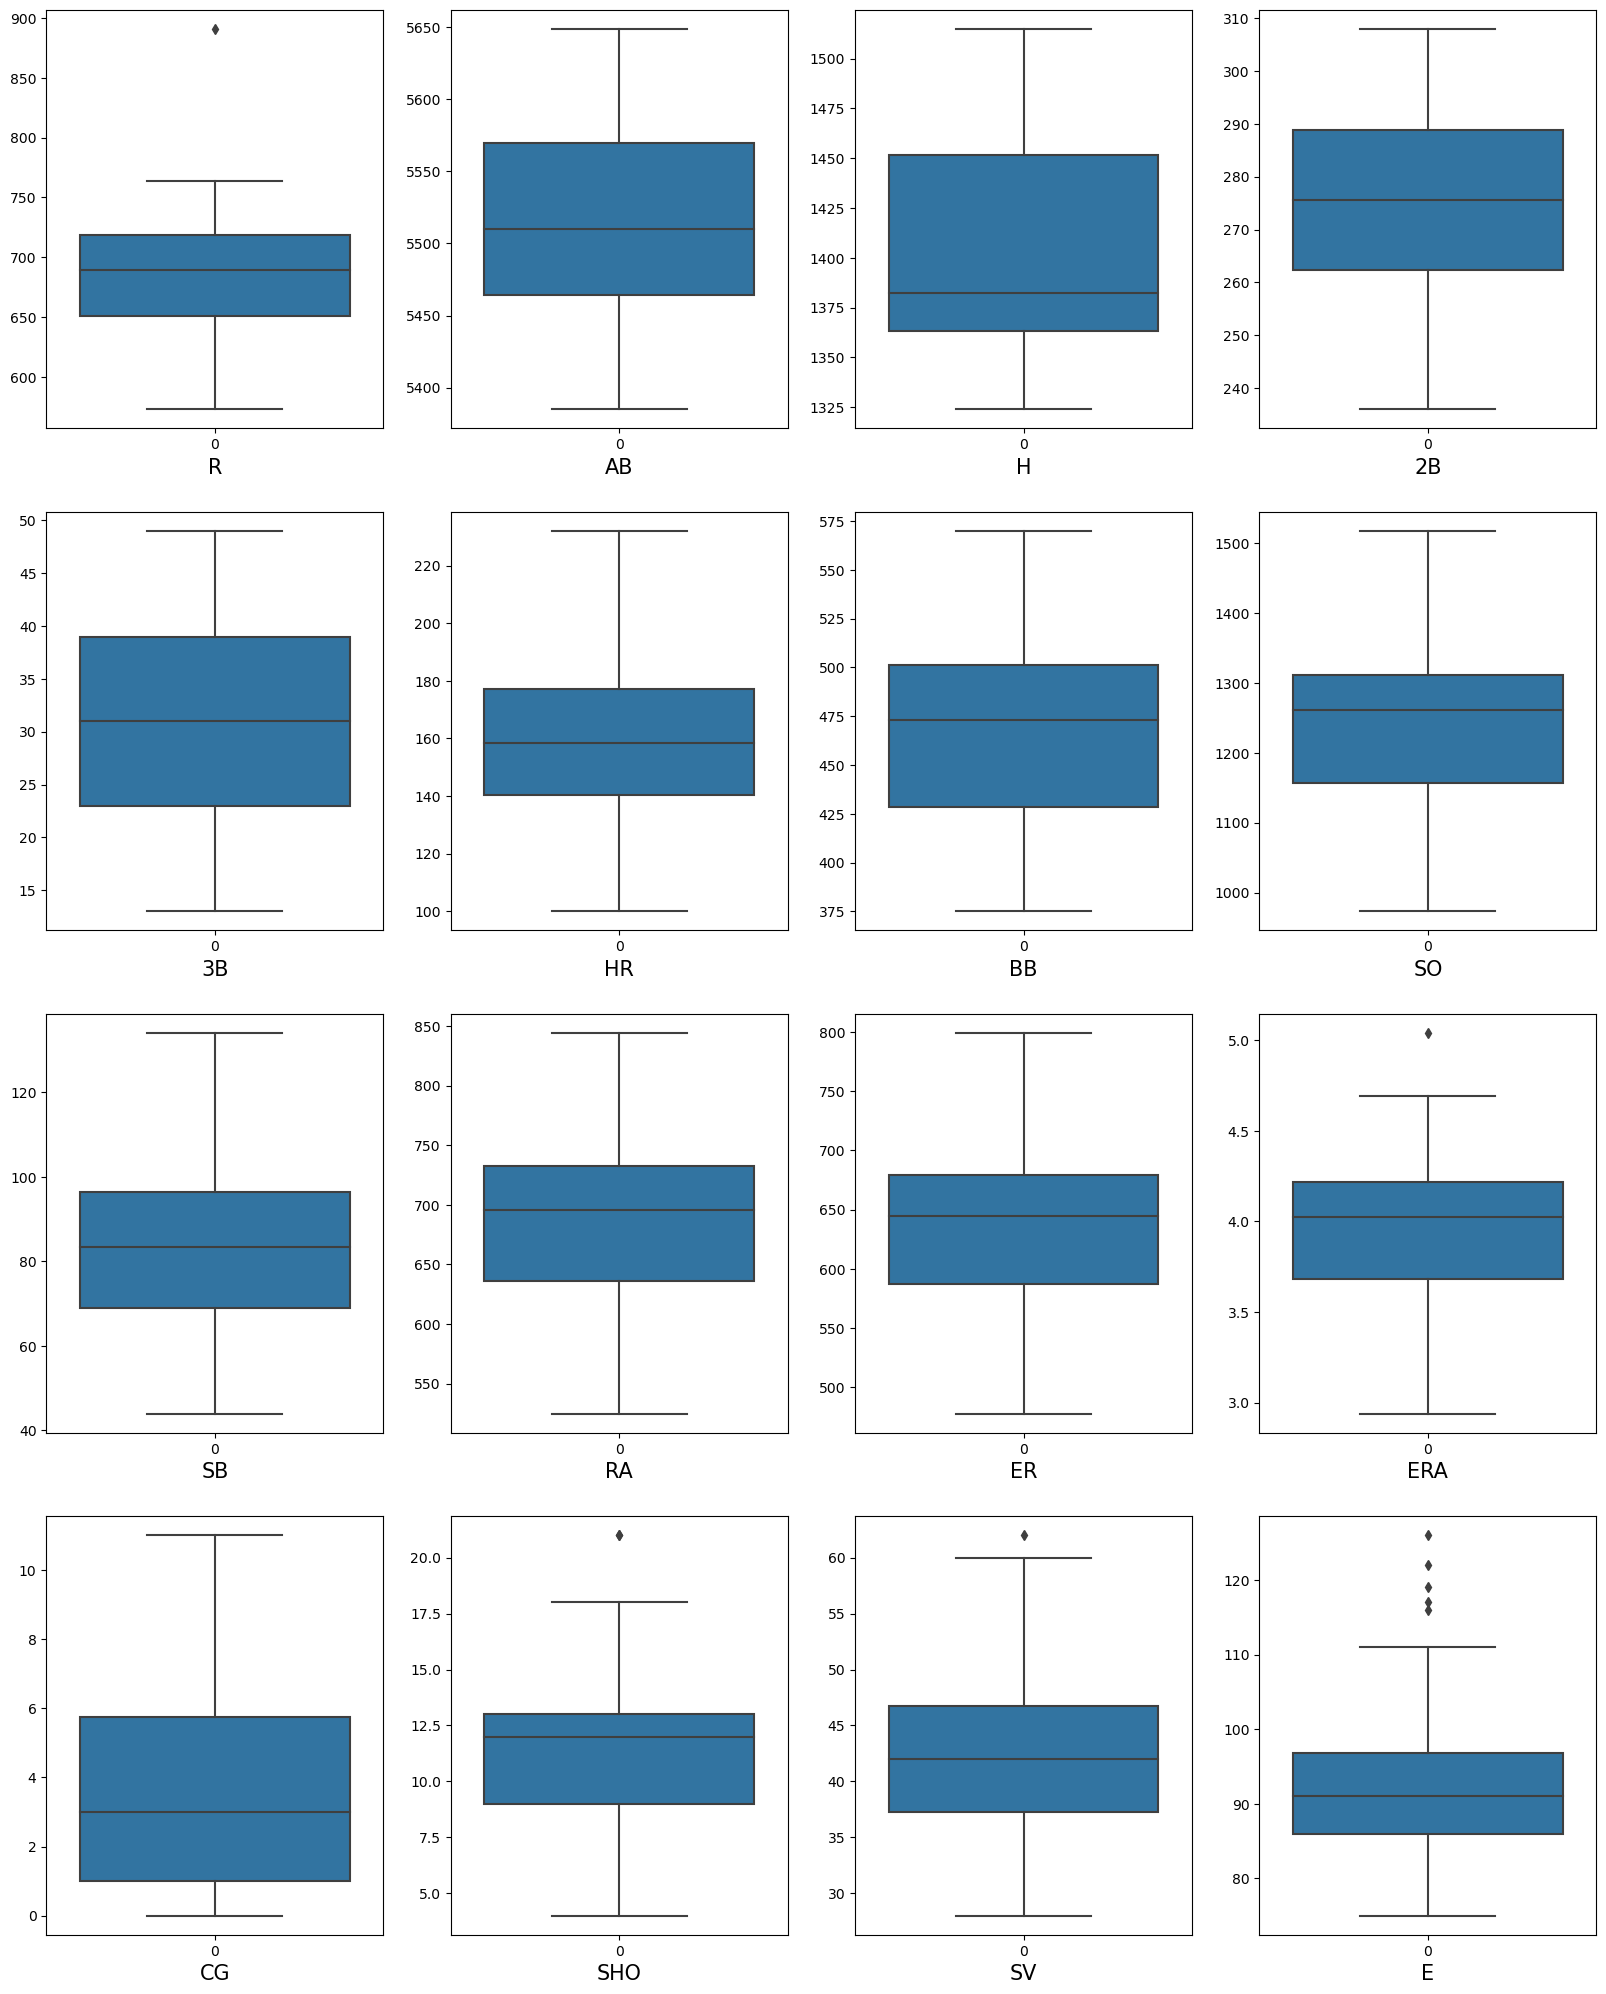

In [23]:
plt.figure(figsize=(20,25))
graph = 1

for column in df_features: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

# 

### Checking Distribution

In [24]:
x = df.drop(columns = ['W'])
y = df['W']

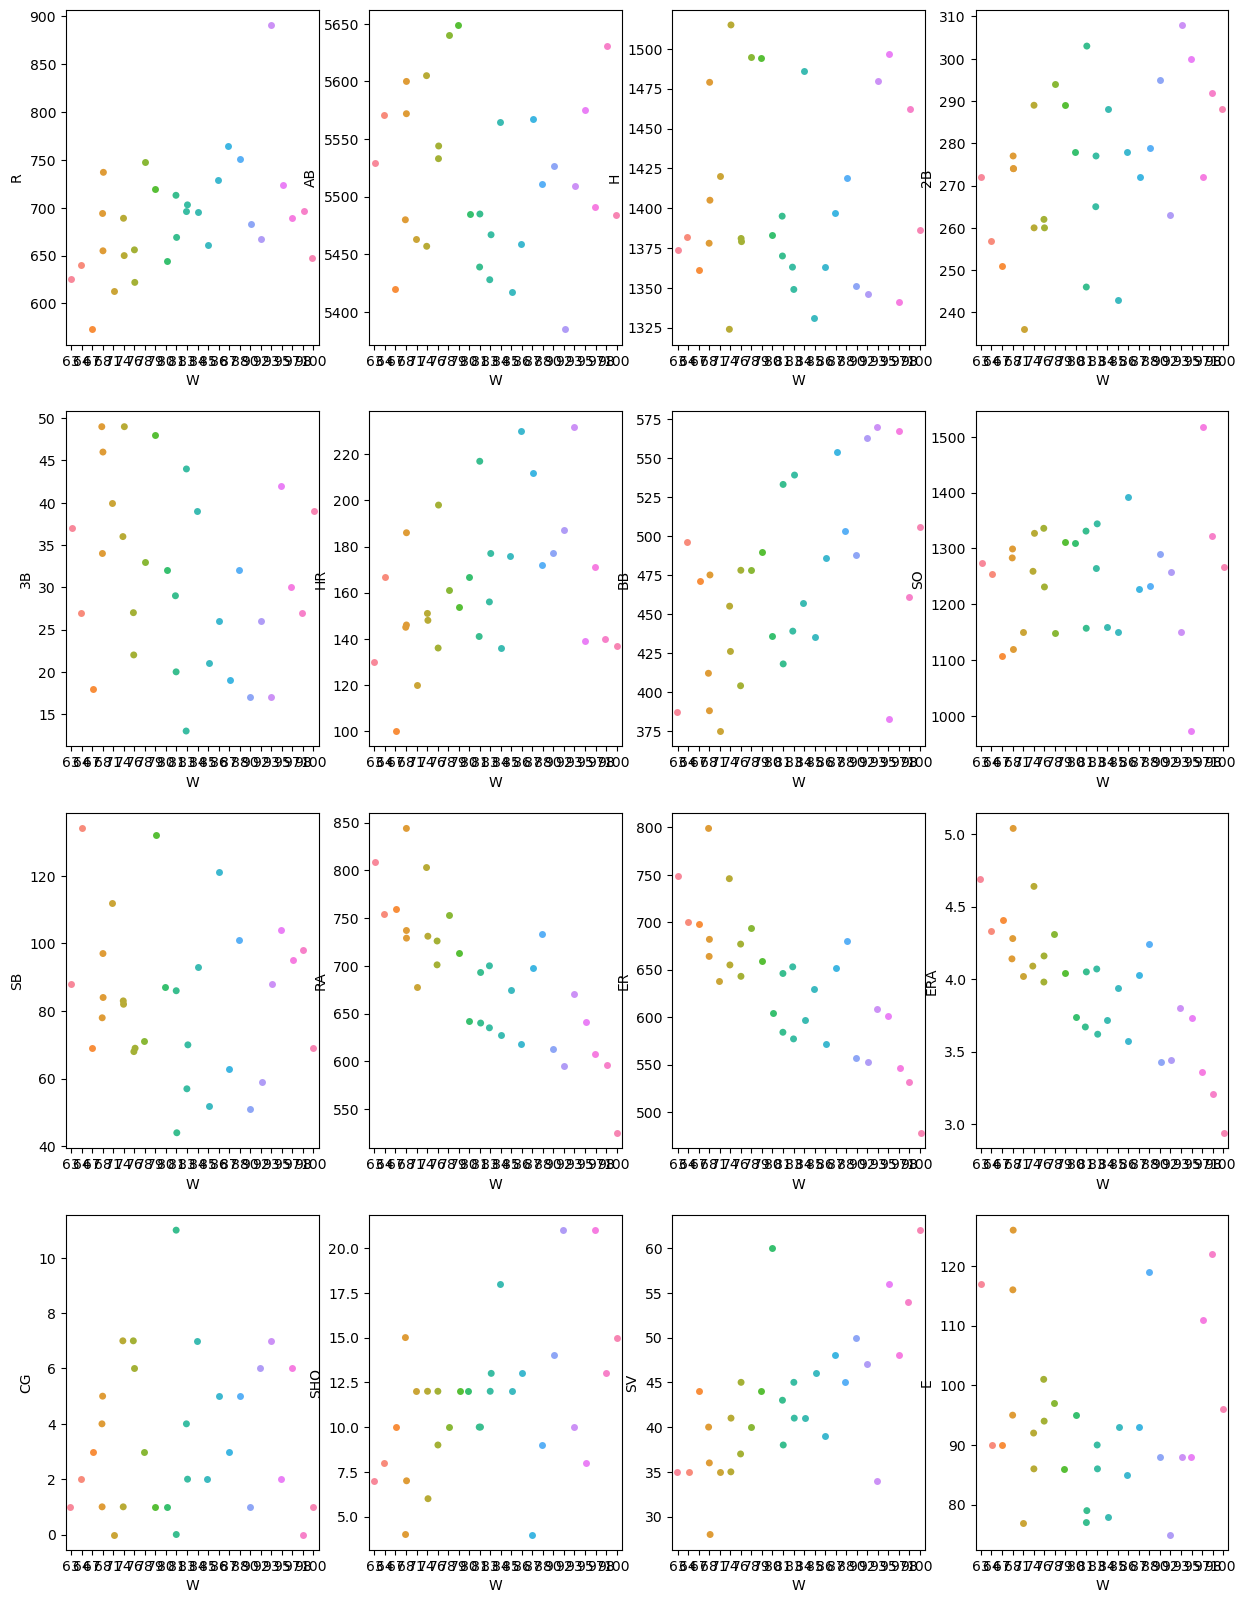

In [25]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax = plt.subplot (4,4,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

### Checking Best Features

In [26]:
from sklearn.feature_selection import SelectPercentile, chi2

In [27]:
x = df.drop(['W'], axis=1)
y = df.W
SPercentile = SelectPercentile (score_func=chi2, percentile=80)
SPercentile = SPercentile.fit(x, y)

In [28]:
cols = SPercentile.get_support (indices=True)
print ('Feature Index = ', cols)
features=x.columns[cols]
print ('Features = ',list(features))

Feature Index =  [ 0  2  4  5  6  7  8  9 10 12 14 15]
Features =  ['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E']


In [29]:
df_scores = pd.DataFrame({'features': x.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.scores_, 'pValue': SPercentile.pvalues_ })
df_scores.sort_values (by='Chi2Score', ascending=False)

features   Chi2Score        pValue
7        SO  213.268413  8.938748e-33
9        RA  197.781566  9.420381e-30
10       ER  192.499607  9.976463e-29
8        SB  166.938124  8.089020e-24
6        BB  161.137711  1.019445e-22
5        HR  142.024649  3.903996e-19
0         R  137.220468  3.022392e-18
4        3B   77.453674  8.163669e-08
15        E   54.037102  2.646094e-04
2         H   50.277253  8.471974e-04
14       SV   38.328947  2.347677e-02
12       CG   38.019231  2.535108e-02
13      SHO   35.808260  4.314958e-02
3        2B   26.829168  2.633067e-01
1        AB   22.350297  4.991972e-01
11      ERA    1.306697  1.000000e+00

# 

### Transformation of Data

#### 1) Removing Outliners

In [30]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [31]:
from scipy.stats import zscore
import numpy as np

z_score = zscore (df[['R', 'ERA', 'SHO', 'SV', 'E']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]

df.describe()

W           R           AB            H          2B  \
count   29.000000   29.000000    29.000000    29.000000   29.000000   
mean    80.551724  681.241379  5516.517241  1400.896552  273.586207   
std     10.384006   45.357040    71.701076    56.264265   17.269952   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  650.000000  5463.000000  1363.000000  262.000000   
50%     81.000000  689.000000  5511.000000  1382.000000  274.000000   
75%     87.000000  713.000000  5571.000000  1420.000000  288.000000   
max    100.000000  764.000000  5649.000000  1515.000000  303.000000   

              3B          HR          BB           SO          SB          RA  \
count  29.000000   29.000000   29.000000    29.000000   29.000000   29.000000   
mean   31.793103  161.275862  465.620690  1251.551724   83.344828  688.862069   
std    10.276114   29.600792   54.728821   103.930123   23.202949   73.300616   
min    13.000000  100.000000  375.000000   973.000000   44.000000  525.000000   
25%    26.000000  140.000000  426.000000  1159.000000   69.000000  635.000000   
50%    32.000000  156.000000  471.000000  1264.000000   83.000000  698.000000   
75%    39.000000  177.000000  496.000000  1312.000000   97.000000  733.000000   
max    49.000000  230.000000  567.000000  1518.000000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   29.000000  29.000000  29.000000  29.000000  29.000000   29.000000  
mean   636.758621   3.961724   3.344828  11.344828  43.379310   94.551724  
std     71.195734   0.461148   2.729153   4.185655   7.816712   14.153713  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    584.000000   3.670000   1.000000   9.000000  38.000000   86.000000  
50%    646.000000   4.030000   3.000000  12.000000  43.000000   92.000000  
75%    680.000000   4.240000   5.000000  13.000000  47.000000   97.000000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [32]:
df_features = df.drop('W',axis=1)

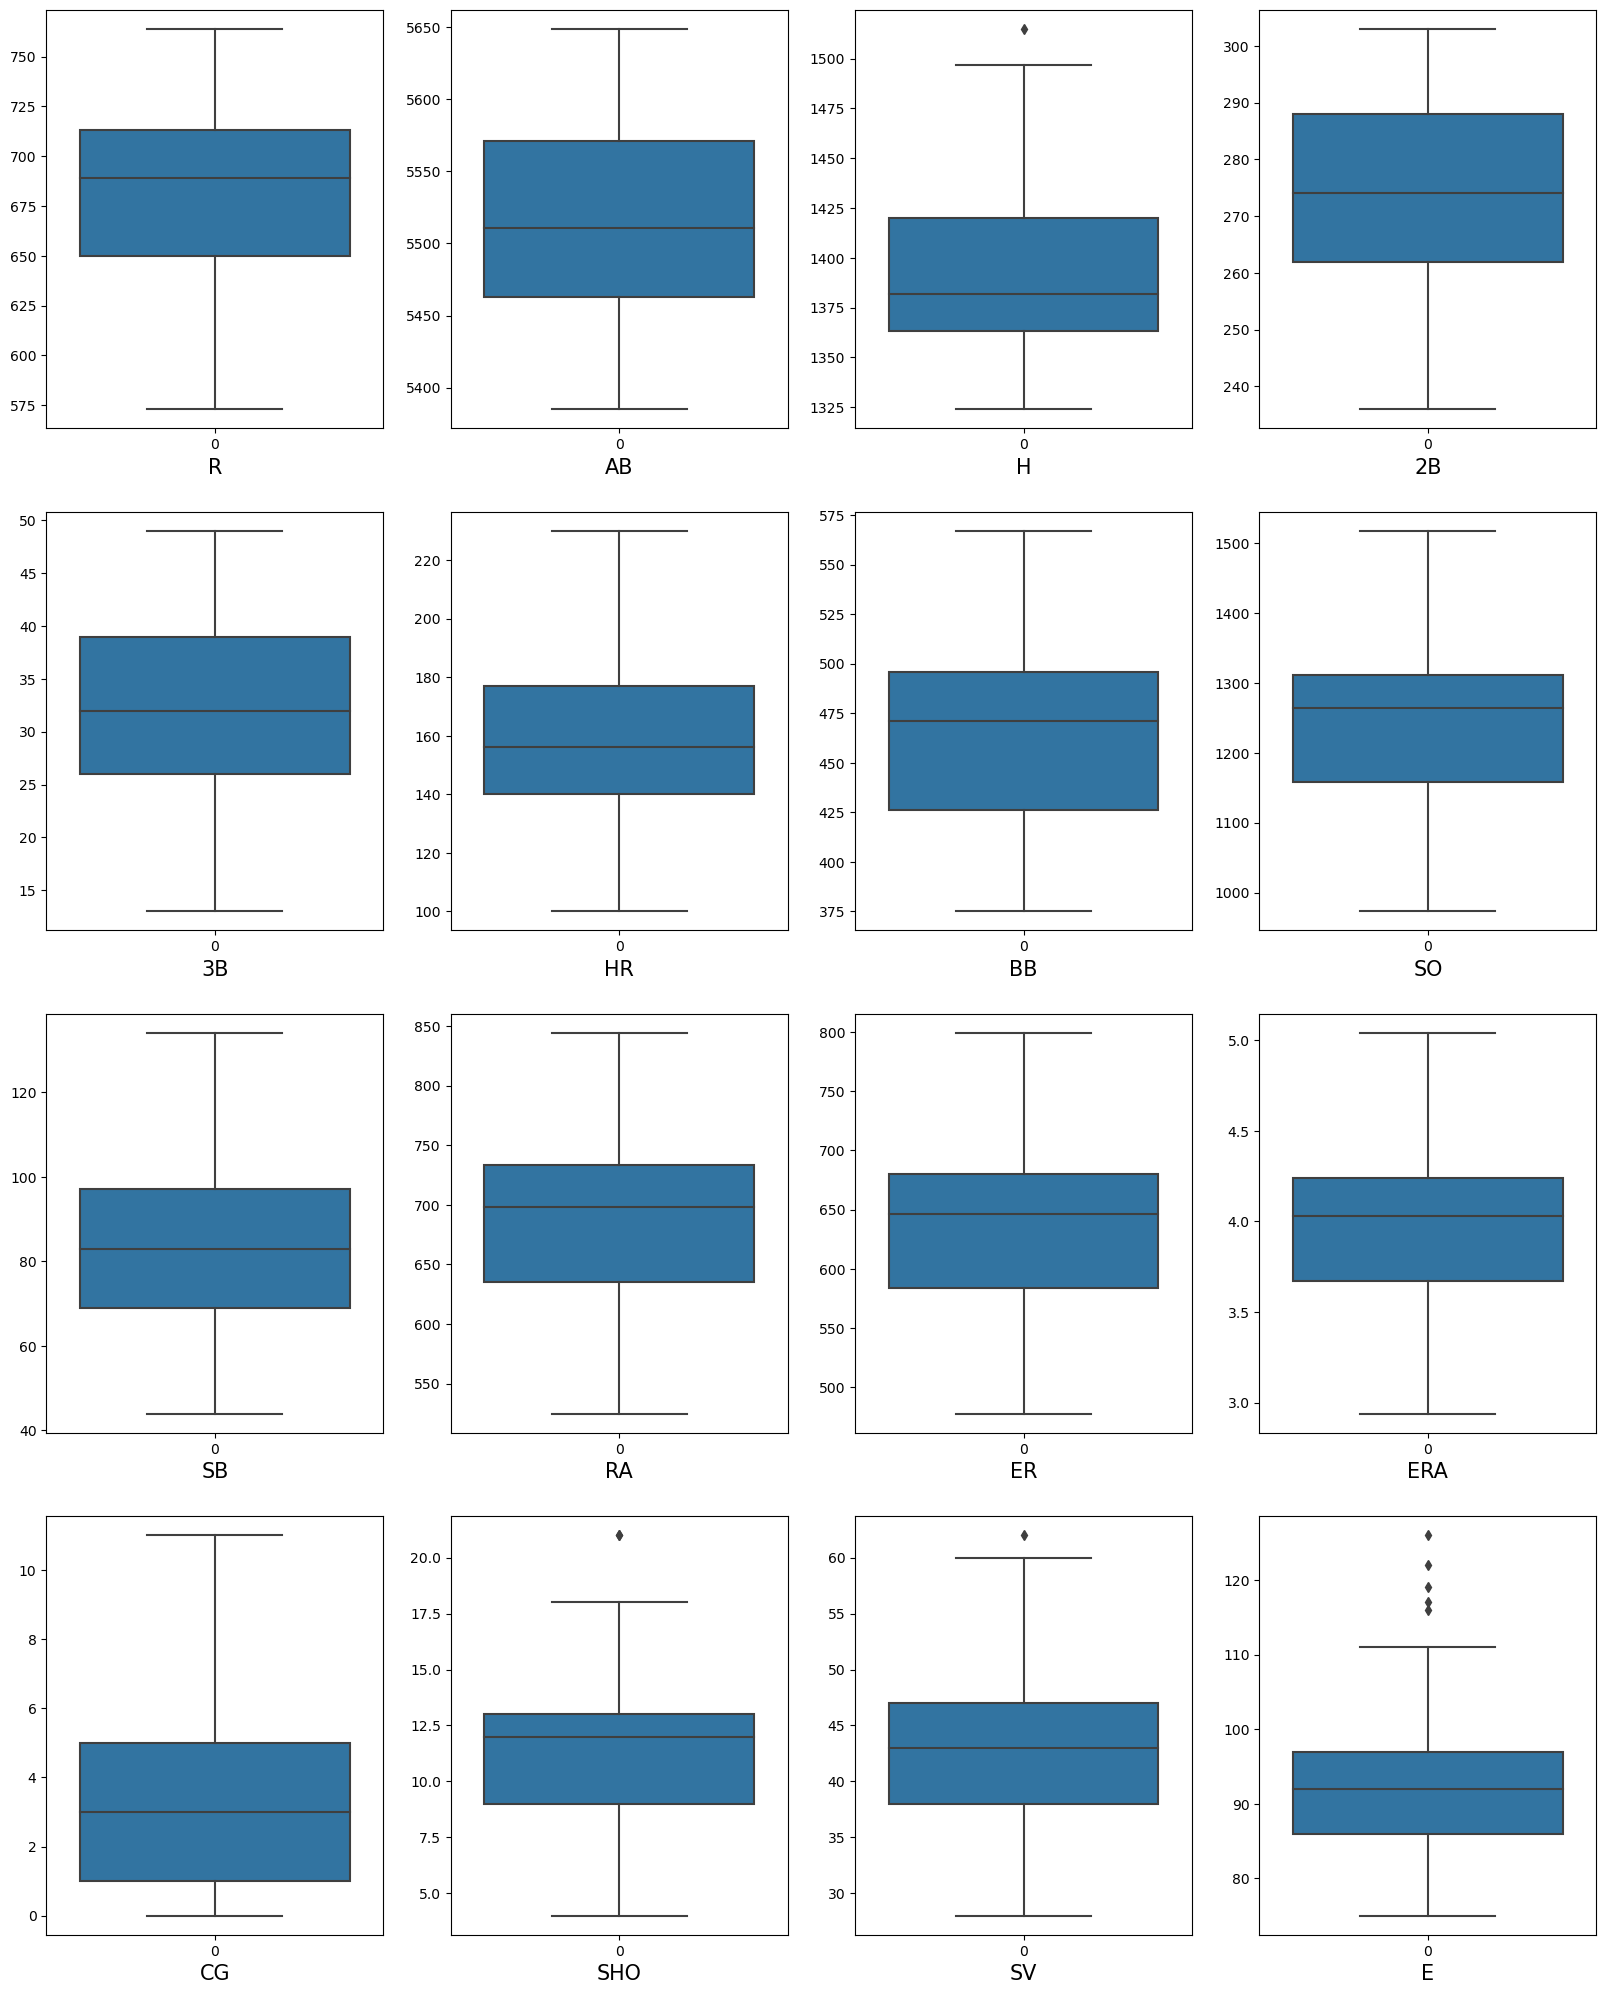

In [33]:
plt.figure(figsize=(20,25))
graph = 1

for column in df_features: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

#### 2) Removing Skewness

In [34]:
from sklearn.preprocessing import PowerTransformer

In [35]:
scaler = PowerTransformer (method="box-cox")

In [36]:
features = ['E','SV','SHO','H','R',]

In [37]:
df[features] = scaler.fit_transform(df[features]. values)

In [38]:
df[features].head()

E        SV       SHO             H         R
0 -0.348122  1.532705 -0.784786  1.387779e-17  0.962545
1 -0.540670  0.311820  0.236008  1.387779e-17  0.298868
2 -1.326159 -0.663935 -0.252164  1.387779e-17 -0.312102
3  0.650759 -0.820436 -0.512066  1.387779e-17 -1.308302
4 -0.540670 -1.148850  0.236008  1.387779e-17  0.137742

In [39]:
df.skew()

W      0.119013
R     -0.024858
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO   -0.000201
SV    -0.000857
E      0.065150
dtype: float64

In [40]:
import warnings
warnings.filterwarnings ('ignore')

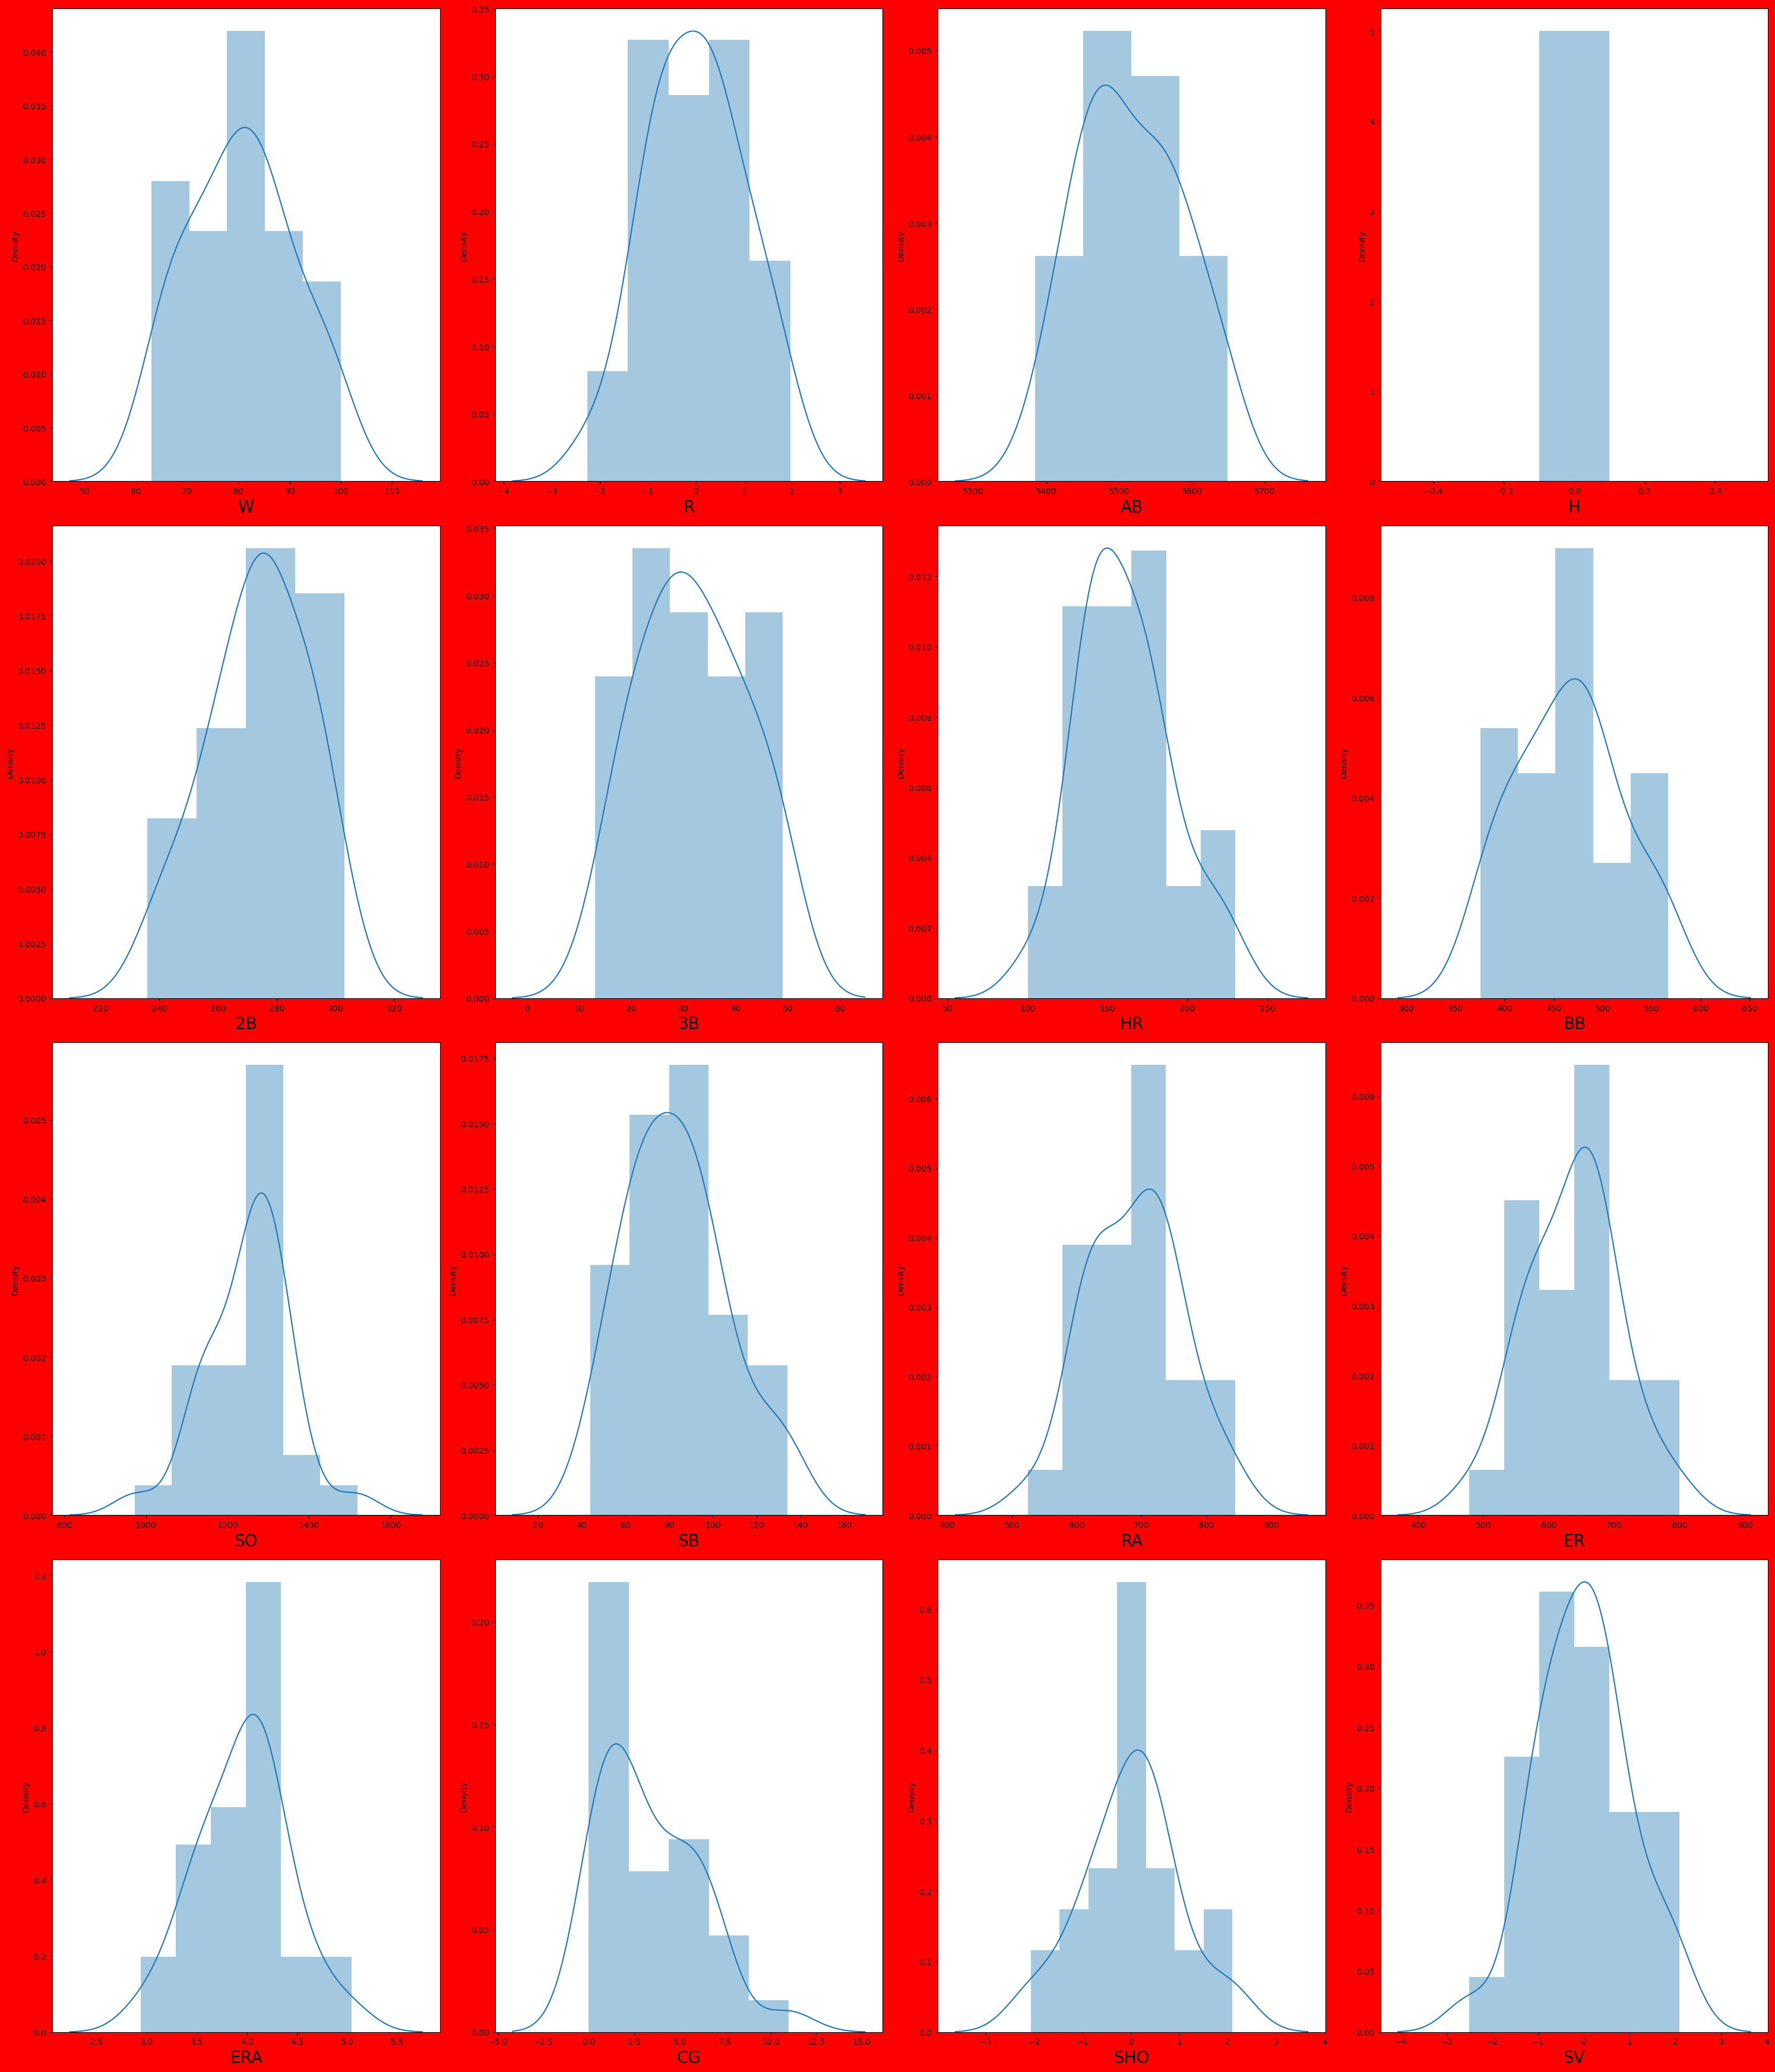

In [41]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

#### 3) Dimension Reduction

In [42]:
x = df.drop('W', axis=1)
y = df['W']

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform (x)

In [45]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

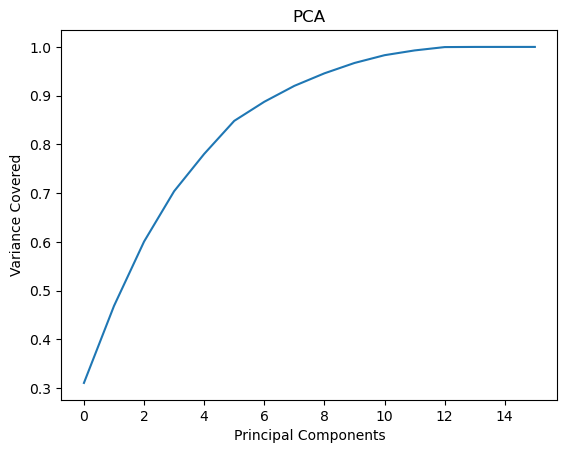

In [46]:
plt.figure()
plt.plot(np.cumsum(pca. explained_variance_ratio_)) 
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [47]:
pc = PCA(n_components=7)
x_pc = pc.fit_transform(x_scaled)

In [48]:
x_scaled.shape

(29, 16)

In [49]:
x_pc.shape

(29, 7)

# 

### Test-Train Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split (x_pc, y, test_size=0.25, random_state=355)

# 

### Important Metrices

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 

### Importing Models

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost
from sklearn.ensemble import GradientBoostingRegressor

# 

### Linear Regression

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(x_train, y_train)

LinearRegression()

In [56]:
reg.coef_

array([-4.0389959 , -2.36715185,  0.1274358 , -1.64397514, -0.66637853,
        0.31733155, -0.73825645])

In [57]:
reg.intercept_

80.10768596167611

In [58]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.8783749936826565


In [59]:
y_pred = reg.predict(x_test)

In [60]:
r2_score(y_test, y_pred)

0.7443182743066838

In [61]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 26.45906358229427
RMSE 5.143837437389936
MAE 4.262022840404655


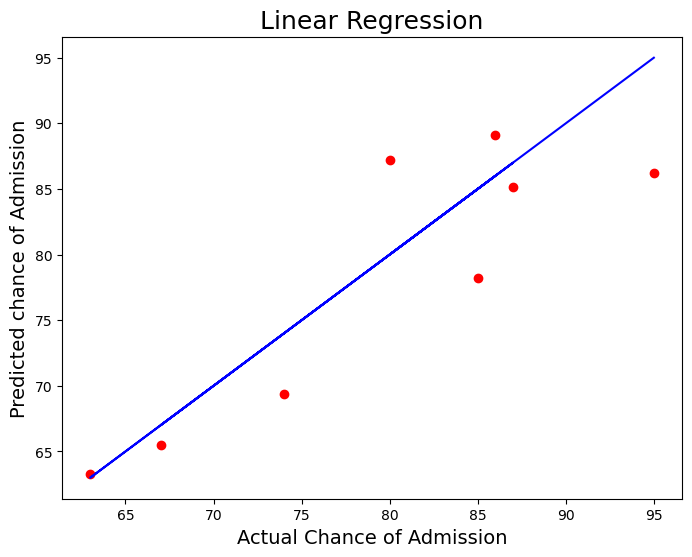

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Linear Regression', fontsize=18) 
plt.savefig('lr.png')
plt.show()

### Cross-validation for LinearRegression

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cv_score=cross_val_score (reg, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [65]:
cv_score

array([0.35037758, 0.62616589, 0.79922131, 0.92981672])

In [66]:
cv_mean

0.6763953778683058

# 

### DecisionTreeRegressor

In [1149]:
dr = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae', "gini", "entropy", "log_loss"],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [113]:
dec = DecisionTreeRegressor(criterion='mae', splitter='random', max_features=None, min_samples_leaf= 1, min_samples_split=5,max_depth=16)

In [122]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=16, min_samples_split=5,
                      splitter='random')

In [123]:
print('Accuracy Score:',dec.score(x_train, y_train))

Accuracy Score: 0.9161246671613776


In [124]:
y_pred = dec.predict(x_test)

In [125]:
r2_score(y_test, y_pred)

0.6016910765514117

In [126]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 41.21875
RMSE 6.420183019198129
MAE 5.3125


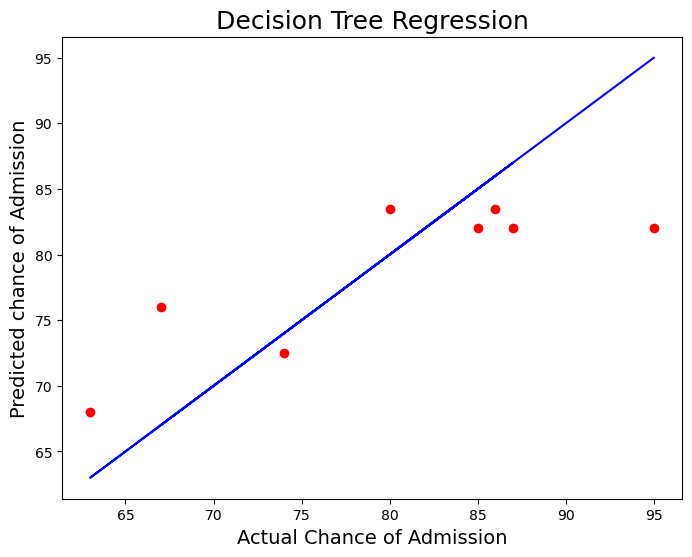

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Decision Tree Regression', fontsize=18) 
plt.savefig('dt.png')
plt.show()

### Cross-validation for DecisionTreeRegressor

In [128]:
from sklearn.model_selection import cross_val_score

In [177]:
cv_score=cross_val_score (dec, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [178]:
cv_score

array([-0.29621936,  0.40934505,  0.79506024,  0.37522202])

In [179]:
cv_mean

0.32085198838863627

# 

### RandomForestRegressor

In [758]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}

In [180]:
rf = RandomForestRegressor(n_estimators=25, max_features= None ,min_samples_split=6,max_depth=4)

In [181]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_split=6,
                      n_estimators=25)

In [182]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.8641553094741548


In [183]:
y_pred = rf.predict(x_test)

In [184]:
r2_score(y_test, y_pred)

0.6322446926963718

In [185]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 38.05692812924889
RMSE 6.169029755905615
MAE 5.290037698412702


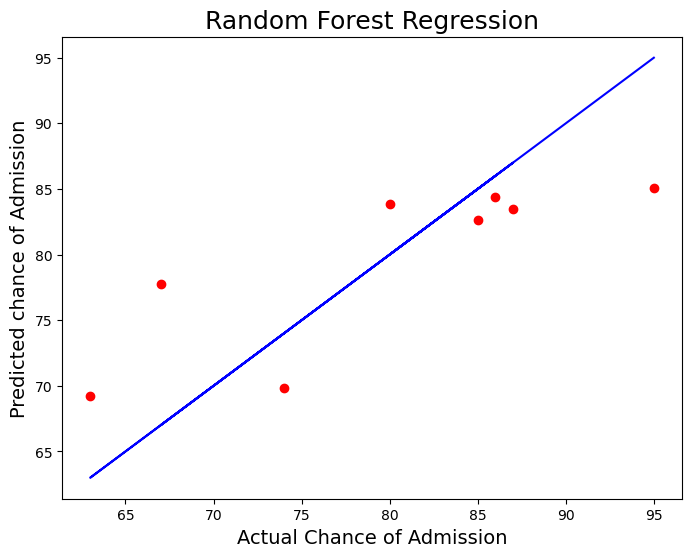

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Random Forest Regression', fontsize=18) 
plt.savefig('rf.png')
plt.show()

### Cross-validation for RandomForestRegressor

In [187]:
from sklearn.model_selection import cross_val_score

In [191]:
cv_score=cross_val_score (rf, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [192]:
cv_score

array([-0.08194471,  0.39880023,  0.67220142,  0.46774148])

In [193]:
cv_mean

0.3641996047985075

# 

### KNeighborsRegressor

In [765]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 5}

In [194]:
reg_KN = KNeighborsRegressor(n_neighbors=4, leaf_size=1, p = 5)

In [195]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=4, p=5)

In [196]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.715087411061155


In [197]:
y_pred = reg_KN.predict(x_test)

In [198]:
r2_score(y_test, y_pred)

0.6321908500679451

In [199]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 38.0625
RMSE 6.169481339626533
MAE 5.3125


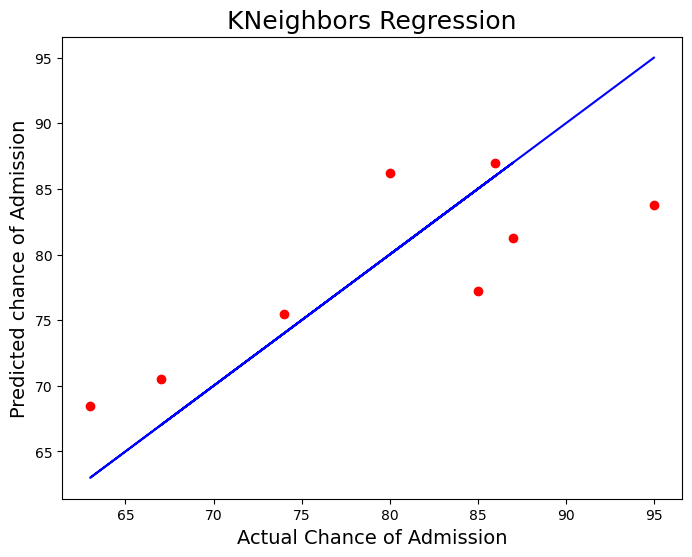

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('KNeighbors Regression', fontsize=18) 
plt.savefig('knn.png')
plt.show()

### Cross-validation for KNeighborsRegressor

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
cv_score=cross_val_score (reg_KN, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [203]:
cv_score

array([-0.09015372,  0.39836262,  0.48401355,  0.76813666])

In [204]:
cv_mean

0.39008977800227956

# 

### SVR

In [772]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [211]:
svr = SVR(kernel='rbf',C=21, gamma=0.01)

In [212]:
svr.fit(x_train, y_train)

SVR(C=21, gamma=0.01)

In [213]:
y_pred = svr.predict(x_test)

In [214]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.8680275354328175


In [215]:
r2_score(y_test, y_pred)

0.6331713267916834

In [216]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 37.96103597904189
RMSE 6.1612527929830865
MAE 5.417069910172497


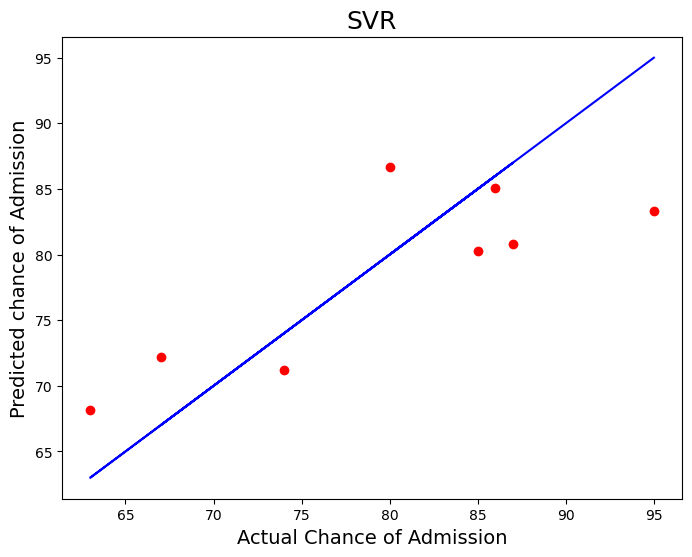

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('SVR', fontsize=18) 
plt.savefig('svc.png')
plt.show()

### Cross-validation for SVR

In [218]:
from sklearn.model_selection import cross_val_score

In [219]:
cv_score=cross_val_score (svr, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [220]:
cv_score

array([0.18004474, 0.53647626, 0.74377278, 0.62713855])

In [221]:
cv_mean

0.5218580794794099

# 

### XGB

In [222]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [223]:
y_pred = xgb.predict(x_test)

In [225]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.9999997049704308


In [226]:
r2_score(y_test, y_pred)

0.8151127735175903

In [227]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 19.132939078015625
RMSE 4.374121520718831
MAE 3.760042190551758


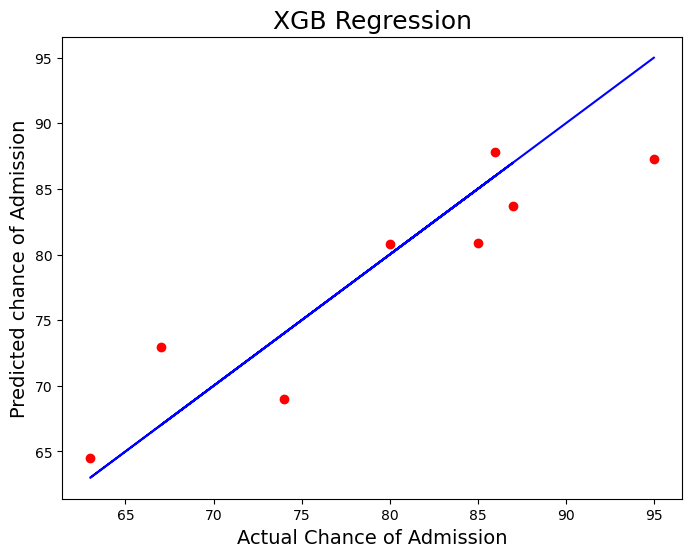

In [228]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('XGB Regression', fontsize=18) 
plt.savefig('xgb.png')
plt.show()

### Cross-validation for XGB

In [229]:
from sklearn.model_selection import cross_val_score

In [230]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [231]:
cv_score

array([0.033333  , 0.56075567, 0.60397462, 0.55182962])

In [232]:
cv_mean

0.437473227430933

# 

### GradientBoostingRegressor

In [233]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1,0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 190}

In [244]:
gbt = GradientBoostingRegressor(n_estimators=90, learning_rate=0.1, max_depth=3, min_samples_split=2)

In [245]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=90)

In [246]:
y_pred = gbt.predict(x_test)

In [247]:
print('Accuracy Score:',gbt.score(x_train, y_train))

Accuracy Score: 0.9999996512657396


In [248]:
r2_score(y_test, y_pred)

0.7263629892962803

In [249]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 28.317155029542747
RMSE 5.321386570203554
MAE 4.9186668121696755


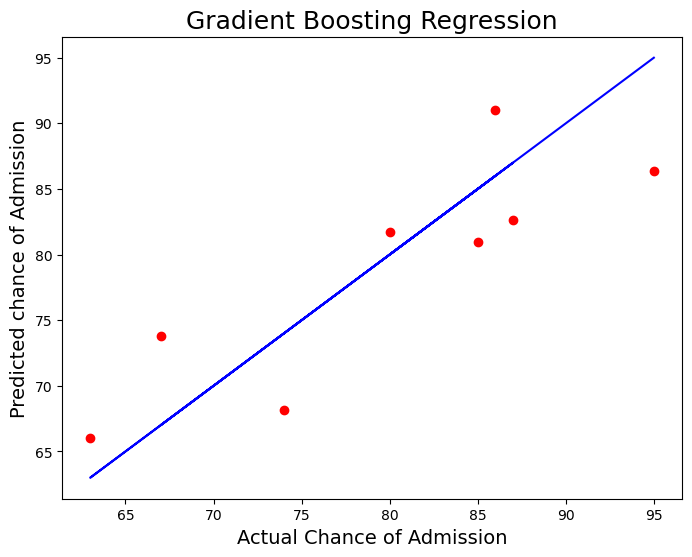

In [250]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Gradient Boosting Regression', fontsize=18) 
plt.savefig('gb.png')
plt.show()

### Cross-validation for GradientBoostingRegressor

In [251]:
from sklearn.model_selection import cross_val_score

In [252]:
cv_score=cross_val_score (gbt, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [253]:
cv_score

array([-0.39716876,  0.46155349,  0.80168862,  0.45896601])

In [254]:
cv_mean

0.3312598361496875

# 

### Lasso Regression

In [75]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [76]:
alpha = lasscv.alpha_
alpha

0.17721812974382475

In [77]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.17721812974382475)

In [78]:
y_pred = reg_lasso.predict(x_test)

In [79]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.8764581139825471


In [80]:
r2_score(y_test, y_pred)

0.7406490452796848

In [73]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 26.838771454885123
RMSE 5.180614968793292
MAE 4.200500385667077


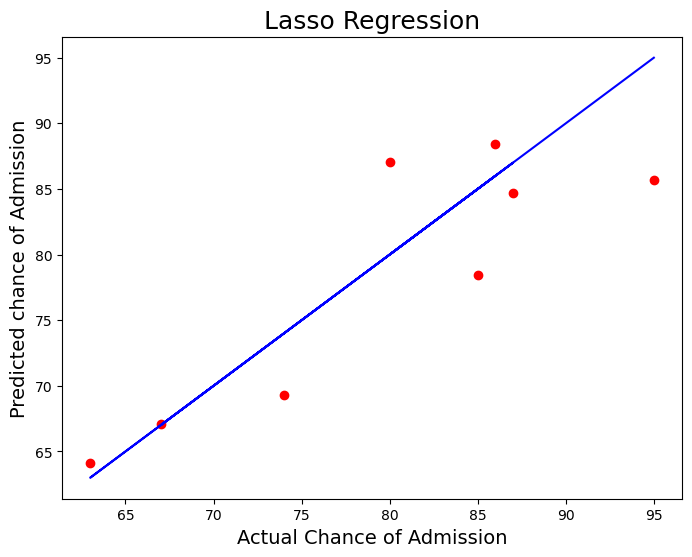

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
plt.savefig('ls.png')
plt.show()

### Cross-validation for Lasso Regression

In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [265]:
cv_score

array([0.38609659, 0.65739888, 0.80126545, 0.941109  ])

In [266]:
cv_mean

0.6964674806807419

# 

### Ridge Regression

In [81]:
ridgecv = RidgeCV(alphas = np.arange(1,100,5), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        normalize=True)

In [82]:
alpha = ridgecv.alpha_
alpha

1

In [83]:
reg_rid = Ridge(alpha=ridgecv.alpha_)           # Passing Learning rate/speed to Ridge
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

In [84]:
y_pred = reg_rid.predict(x_test)

In [85]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.8781394031440353


In [86]:
r2_score(y_test, y_pred)

0.7453131856485744

In [87]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 26.356105803898302
RMSE 5.133819806333126
MAE 4.232513550166768


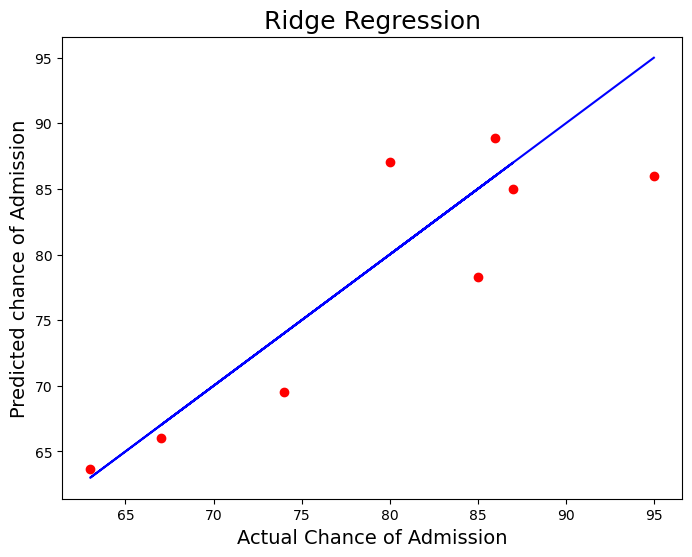

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Ridge Regression', fontsize=18) 
plt.savefig('rd.png')
plt.show()

### Cross-validation for Ridge Regression

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cv_score=cross_val_score (reg_rid, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [91]:
cv_score

array([0.36429894, 0.63683532, 0.79821436, 0.93536667])

In [92]:
cv_mean

0.6836788206600352

# 

## The Best Model

### Lasso Regression

In [255]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [256]:
alpha = lasscv.alpha_
alpha

0.17721812974382475

In [257]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.17721812974382475)

In [258]:
y_pred = reg_lasso.predict(x_test)

In [259]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.8764581139825471


In [260]:
r2_score(y_test, y_pred)

0.7406490452796848

In [261]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 26.838771454885123
RMSE 5.180614968793292
MAE 4.200500385667077


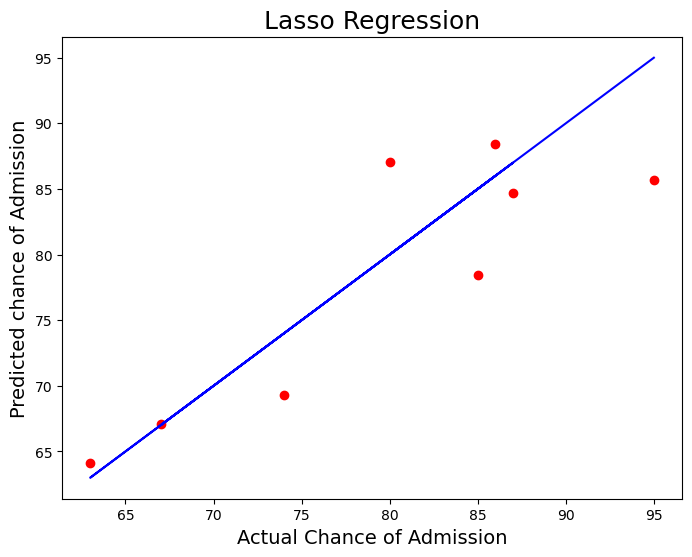

In [262]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
#plt.savefig('ls.png')
plt.show()

### Cross-validation for Lasso Regression

In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [265]:
cv_score

array([0.38609659, 0.65739888, 0.80126545, 0.941109  ])

In [266]:
cv_mean

0.6964674806807419

#### Lasso Regression model has the higher R2 score. The difference between the Accuracy of Training data & R2 score is very less & the difference between the R2 score & Cross Validation mean score is the least of all models. Hence, Lasso Regression is the best model.

# 

### Saving the Best Model

In [279]:
import pickle 

In [280]:
with open('model_lasso', 'wb') as f: 
    pickle.dump(reg_lasso, f)

# 

# 

# 

# 

# 

# Avocado Project

In [2589]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [2590]:
import pandas as pd
import numpy as np

In [2591]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  
3  2015.0  Albany  
4  2015.0  Albany

# 

### EDA

In [2592]:
df.shape

(16468, 14)

In [2593]:
df.drop_duplicates(inplace=True)
df.shape

(1518, 14)

In [2594]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [2595]:
df.drop(['Unnamed: 0','Date','year'], axis=1,inplace=True)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  
0     8603.62       93.25          0.0  conventional  Albany  
1     9408.07       97.49          0.0  conventional  Albany  
2     8042.21      103.14          0.0  conventional  Albany  
3     5677.40      133.76          0.0  conventional  Albany  
4     5986.26      197.69          0.0  conventional  Albany

In [2596]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico', nan], dtype=object)

In [2597]:
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58,  nan])

In [2598]:
df["type"].unique()

array(['conventional', nan], dtype=object)

In [2599]:
df.nunique()

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
region            51
dtype: int64

In [2600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518 entries, 0 to 1517
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  region        1517 non-null   object 
dtypes: float64(9), object(2)
memory usage: 142.3+ KB


# 

### Dealing Null Values

In [2601]:
df.isnull().sum()

AveragePrice    1
Total Volume    1
4046            1
4225            1
4770            1
Total Bags      1
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
region          1
dtype: int64

In [2602]:
missing = df[df['region'].isna()]
missing.head()

AveragePrice  Total Volume  4046  4225  4770  Total Bags  Small Bags  \
1517           NaN           NaN   NaN   NaN   NaN         NaN         NaN   

      Large Bags  XLarge Bags type region  
1517         NaN          NaN  NaN    NaN

In [2603]:
df.dropna(how='all', inplace=True)

In [2604]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

# 

### Dropping Unnecessary Columns

In [2605]:
df["type"].unique()

array(['conventional'], dtype=object)

In [2606]:
df.drop(['type'], axis=1,inplace=True)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  region  
0     8603.62       93.25          0.0  Albany  
1     9408.07       97.49          0.0  Albany  
2     8042.21      103.14          0.0  Albany  
3     5677.40      133.76          0.0  Albany  
4     5986.26      197.69          0.0  Albany

##### Column 'type' has only values. So basically it can be avoided

# 

### Encoding

In [2607]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2608]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

In [2609]:
df.region = le.fit_transform(df.region)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  region  
0     8603.62       93.25          0.0       0  
1     9408.07       97.49          0.0       0  
2     8042.21      103.14          0.0       0  
3     5677.40      133.76          0.0       0  
4     5986.26      197.69          0.0       0

# 

### Checking Details

In [2610]:
df.columns=['AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags', 'Small_Bags', 'Large_Bags','XLarge_Bags','region']
df.head()

AveragePrice  Total_Volume     4046       4225    4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  region  
0     8603.62       93.25          0.0       0  
1     9408.07       97.49          0.0       0  
2     8042.21      103.14          0.0       0  
3     5677.40      133.76          0.0       0  
4     5986.26      197.69          0.0       0

In [2611]:
df.describe()

AveragePrice  Total_Volume          4046          4225          4770  \
count   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03   
mean       1.074990  1.601879e+06  6.464387e+05  6.114375e+05  5.040550e+04   
std        0.188891  4.433143e+06  1.947614e+06  1.672906e+06  1.377812e+05   
min        0.490000  3.875074e+04  4.677200e+02  1.783770e+03  0.000000e+00   
25%        0.980000  1.474700e+05  2.040034e+04  4.147606e+04  9.112500e+02   
50%        1.080000  4.027919e+05  8.175117e+04  1.186649e+05  7.688170e+03   
75%        1.190000  9.819751e+05  3.775785e+05  4.851503e+05  2.916730e+04   
max        1.680000  4.465546e+07  1.893304e+07  1.895648e+07  1.381516e+06   

         Total_Bags    Small_Bags    Large_Bags    XLarge_Bags       region  
count  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000  1517.000000  
mean   2.935974e+05  2.487736e+05  4.264205e+04    2181.771074    21.196440  
std    7.579765e+05  6.474765e+05  1.182157e+05    7455.712144    16.132398  
min    3.311770e+03  3.311770e+03  0.000000e+00       0.000000     0.000000  
25%    3.620689e+04  2.972722e+04  5.407400e+02       0.000000     6.000000  
50%    7.397906e+04  6.237569e+04  5.044350e+03       0.000000    19.000000  
75%    1.576097e+05  1.461994e+05  2.926767e+04     401.480000    35.000000  
max    6.736304e+06  5.893642e+06  1.121076e+06  108072.790000    50.000000

In [2612]:
m=df['Total_Volume'].mean()
m

1601879.06783784

In [2613]:
m=df['Total_Volume'].std()
m

4433142.820746168

##### The standard deviation is larger than the mean for the certain columns: Total_Volume, Total_Bags, Small_Bags, XLarge_Bags

# 

### Checking Outliners

In [2614]:
df.columns

Index(['AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'region'],
      dtype='object')

In [2615]:
df_features = df.drop(['region'], axis=1)

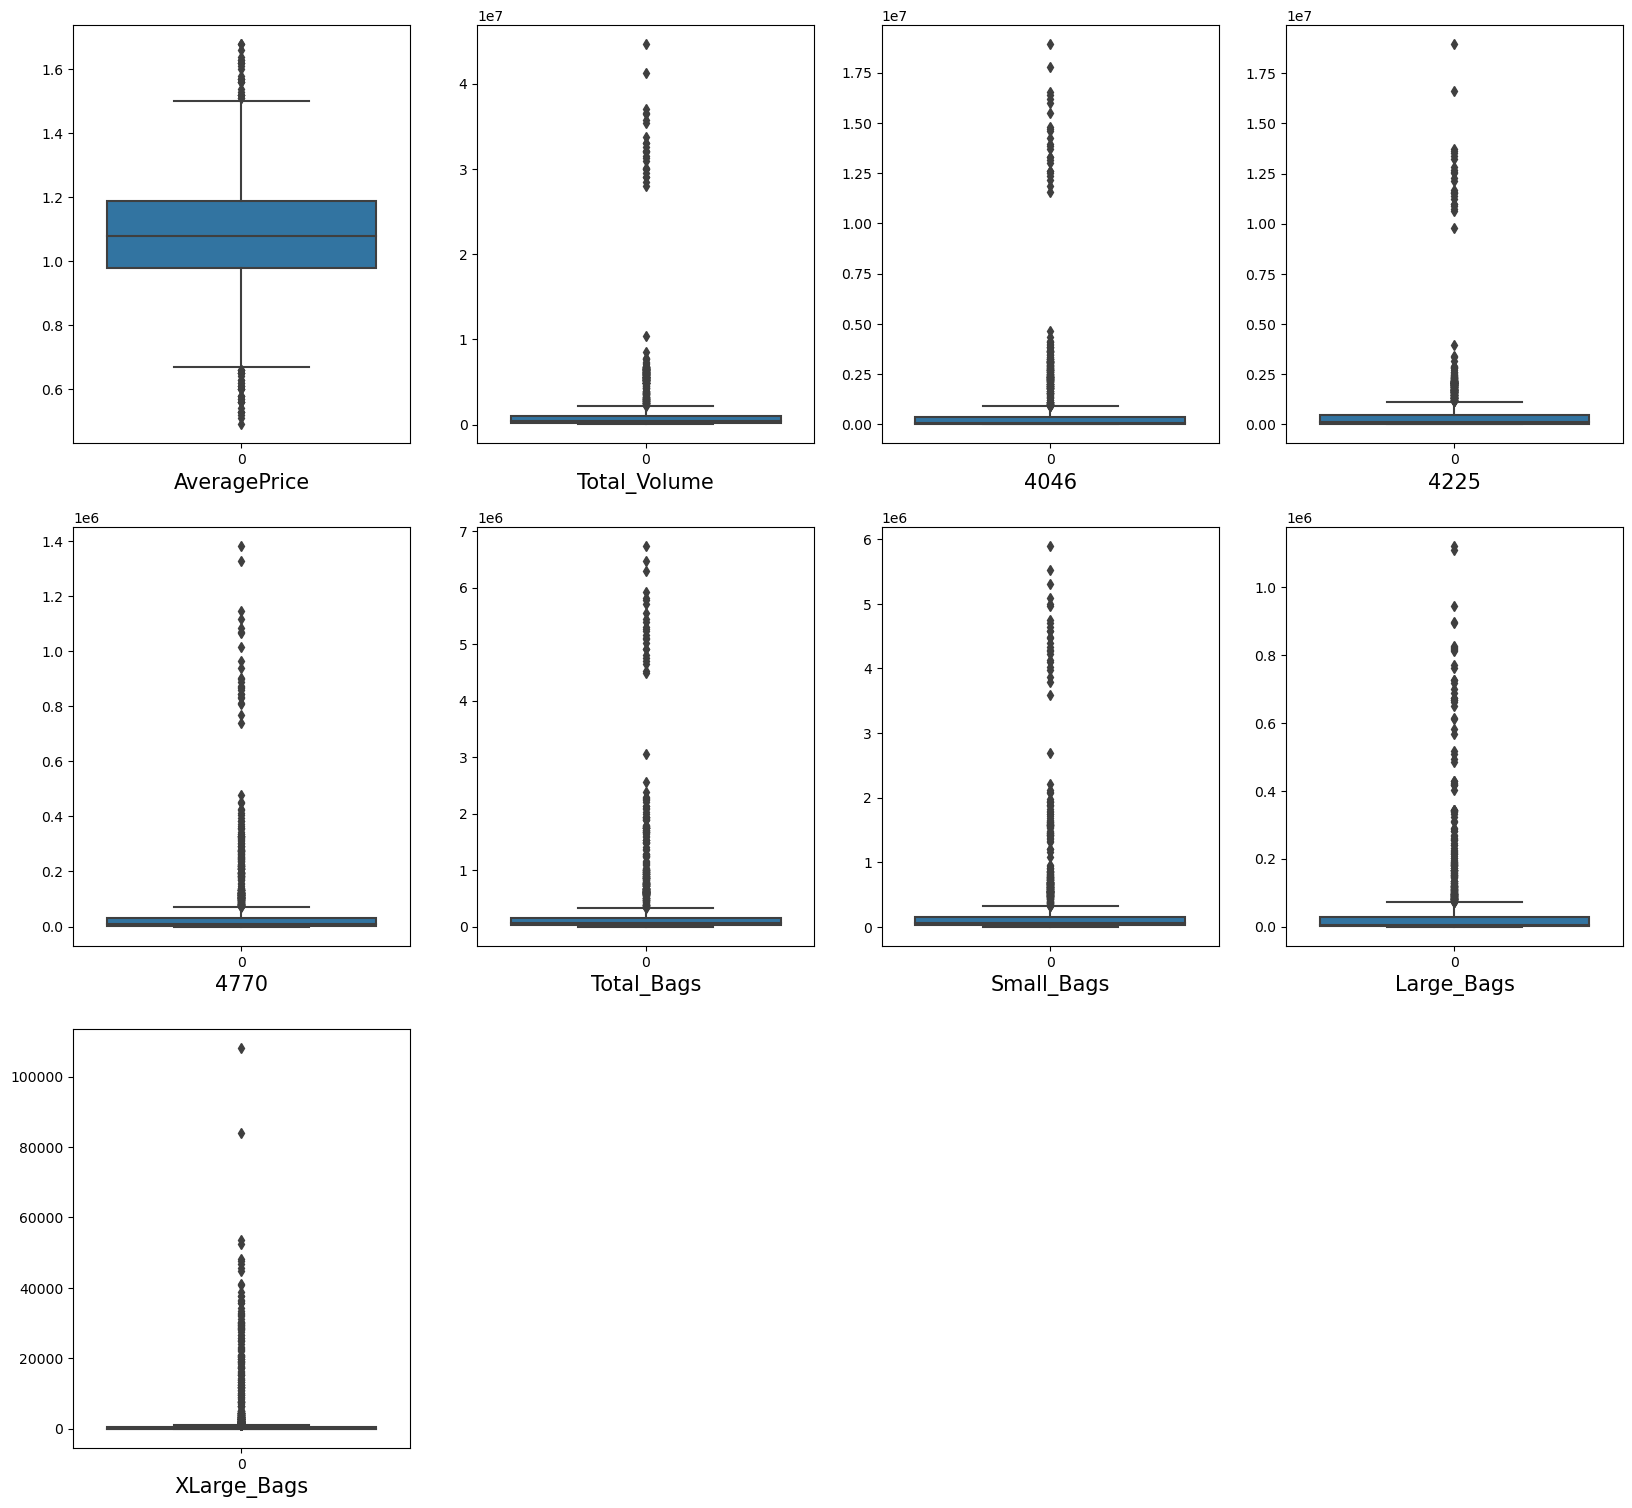

In [2616]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df_features: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

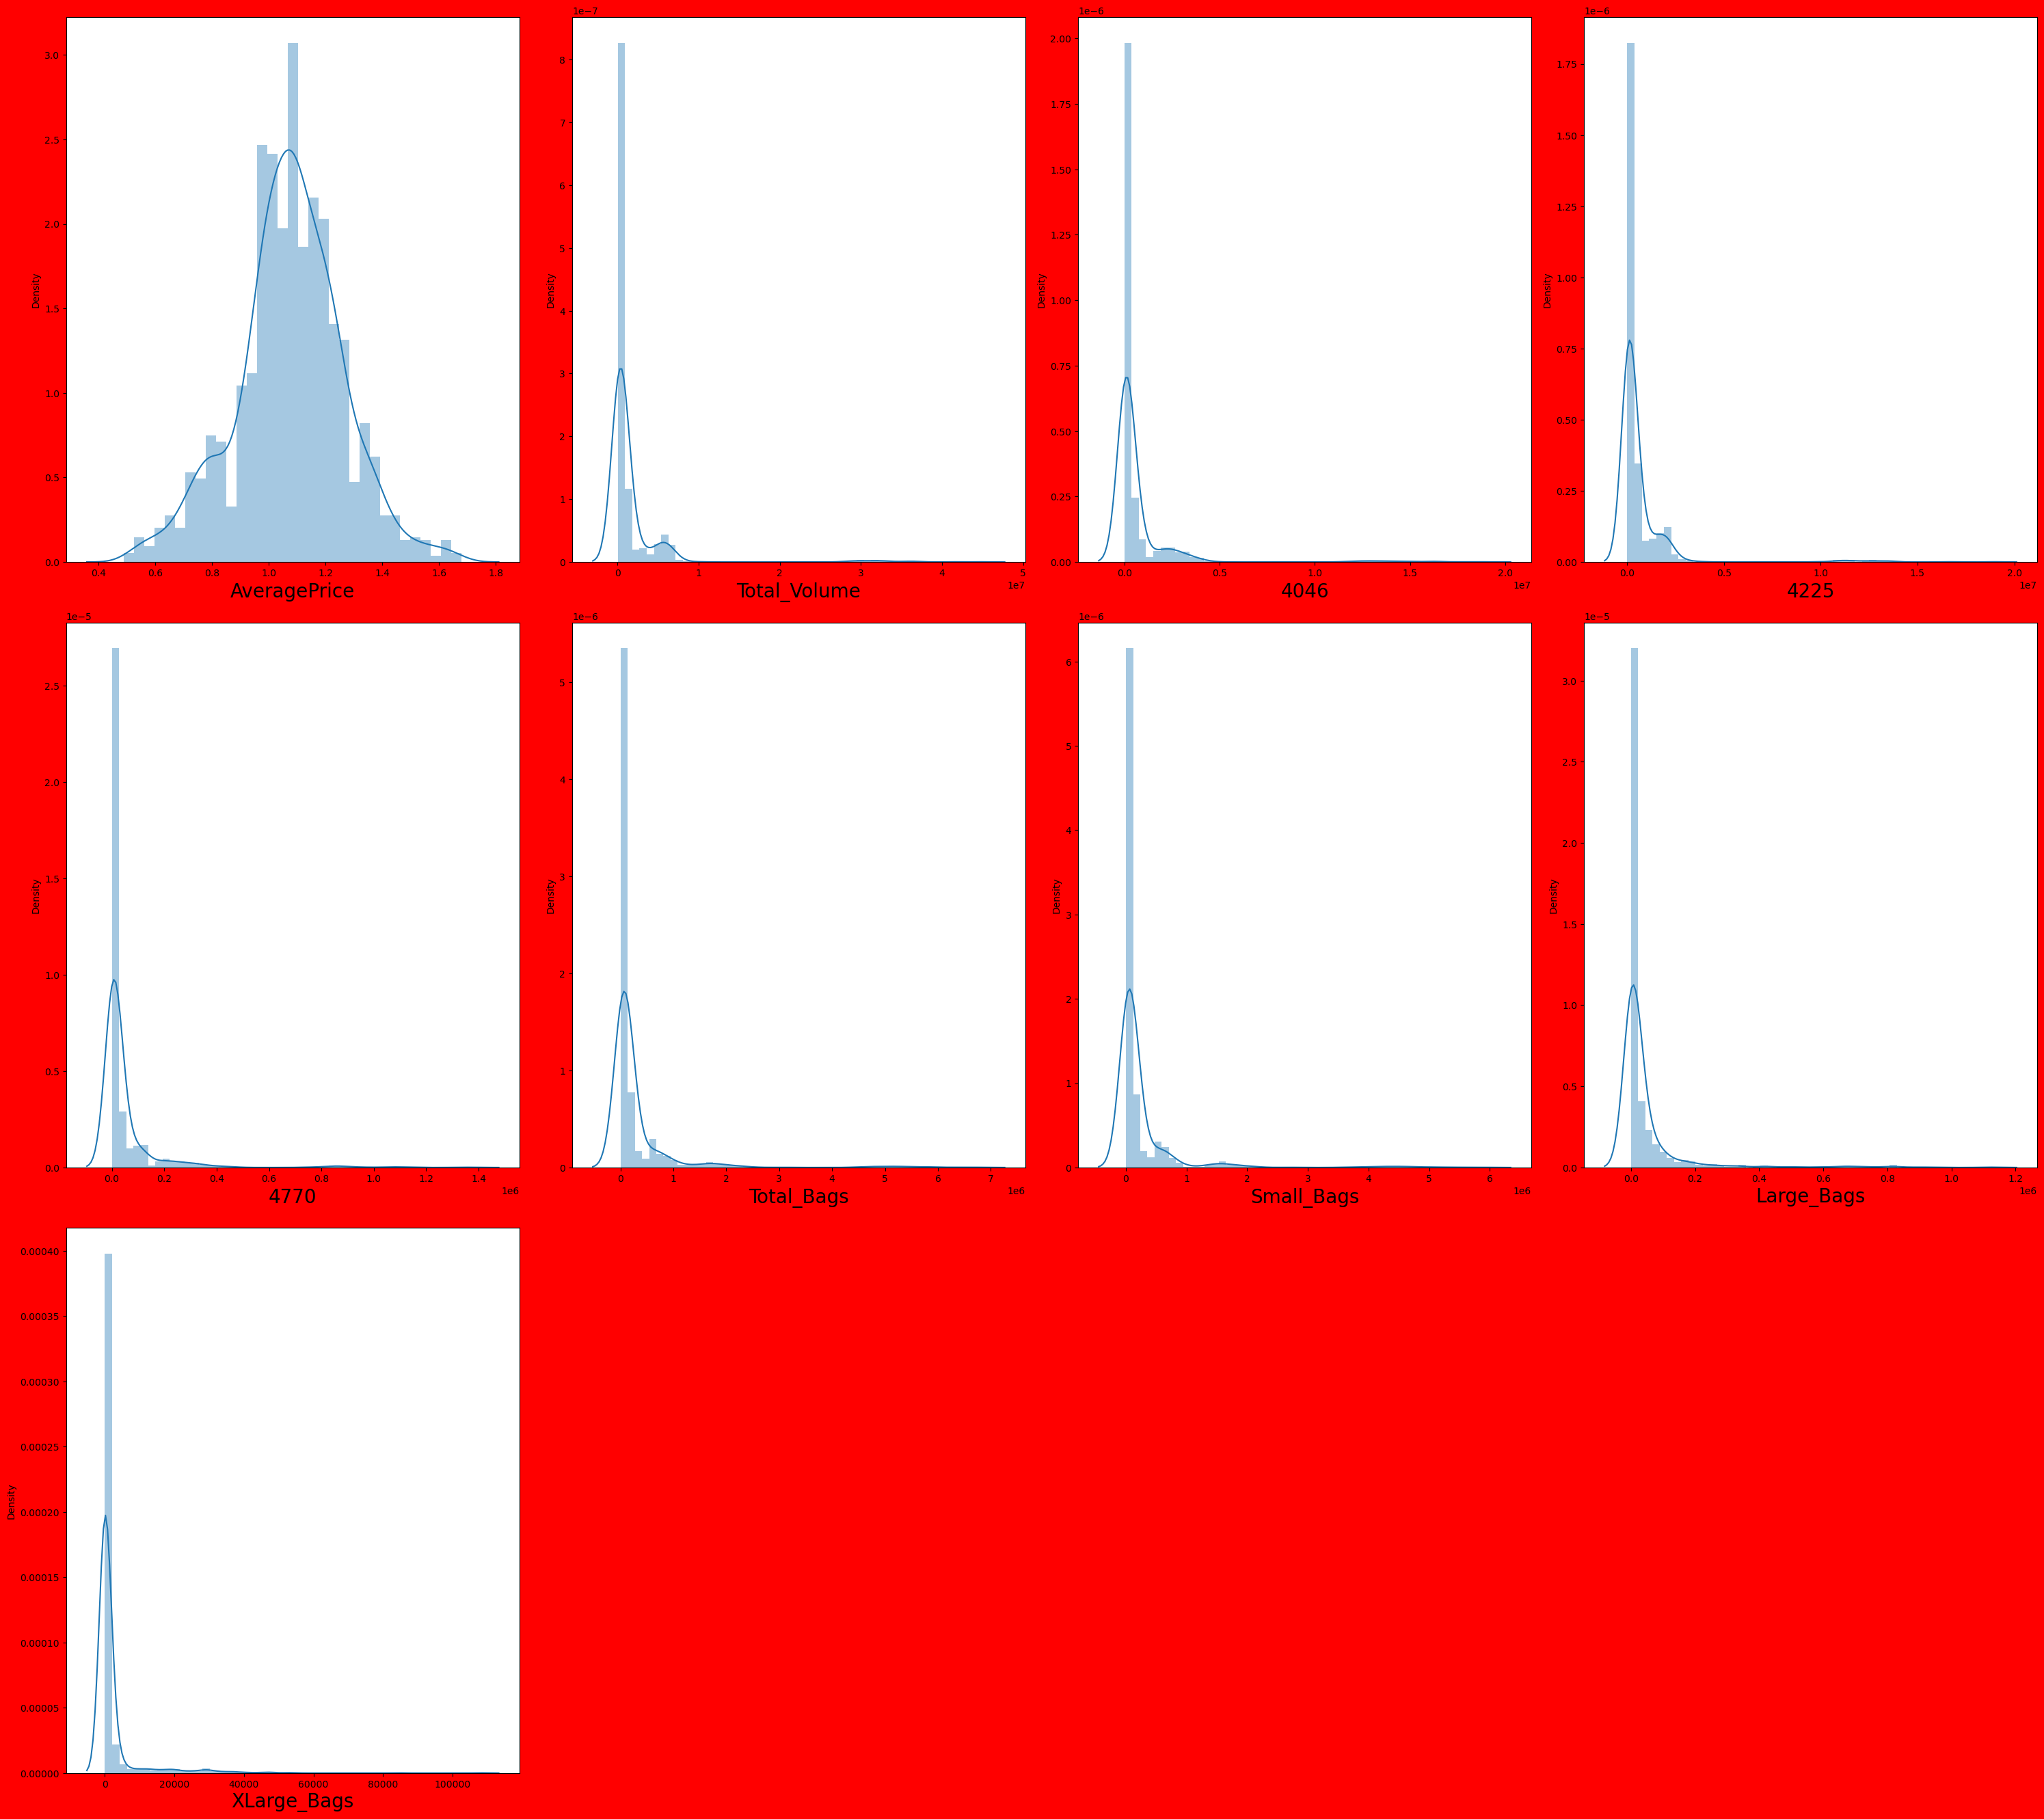

In [2617]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df_features:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df_features[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Removing Outliners

In [2618]:
df_features.columns

Index(['AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags'],
      dtype='object')

In [2619]:
from scipy.stats import zscore 

z_score = zscore (df[['Total_Volume', '4046', '4225', '4770', 'Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 1.5).all(axis=1)
df = df[filtering_entry]

df.describe()

AveragePrice  Total_Volume          4046          4225           4770  \
count   1363.000000  1.363000e+03  1.363000e+03  1.363000e+03    1363.000000   
mean       1.083940  6.872999e+05  2.640327e+05  2.859579e+05   20083.225356   
std        0.189926  1.103843e+06  5.762291e+05  4.530903e+05   39385.549317   
min        0.490000  3.875074e+04  4.677200e+02  1.783770e+03       0.000000   
25%        0.990000  1.368732e+05  1.543411e+04  3.898417e+04     673.695000   
50%        1.090000  3.340416e+05  6.361012e+04  8.733890e+04    5643.070000   
75%        1.200000  7.595732e+05  2.150220e+05  3.606911e+05   17557.150000   
max        1.660000  6.937096e+06  3.520801e+06  2.917084e+06  253978.780000   

         Total_Bags     Small_Bags     Large_Bags   XLarge_Bags       region  
count  1.363000e+03    1363.000000    1363.000000   1363.000000  1363.000000  
mean   1.172261e+05   99988.278826   16720.115371    517.663720    20.570066  
std    1.631612e+05  141256.904830   31740.144387   1547.841536    15.611709  
min    3.311770e+03    3311.770000       0.000000      0.000000     0.000000  
25%    3.308057e+04   26308.815000     377.725000      0.000000     5.000000  
50%    6.685405e+04   53806.040000    3668.300000      0.000000    19.000000  
75%    1.156876e+05   96568.210000   17675.605000    108.475000    34.000000  
max    1.017429e+06  909308.320000  218968.930000  13275.870000    50.000000

In [2620]:
df.shape

(1363, 10)

In [2621]:
df_features = df.drop(['region'], axis=1)

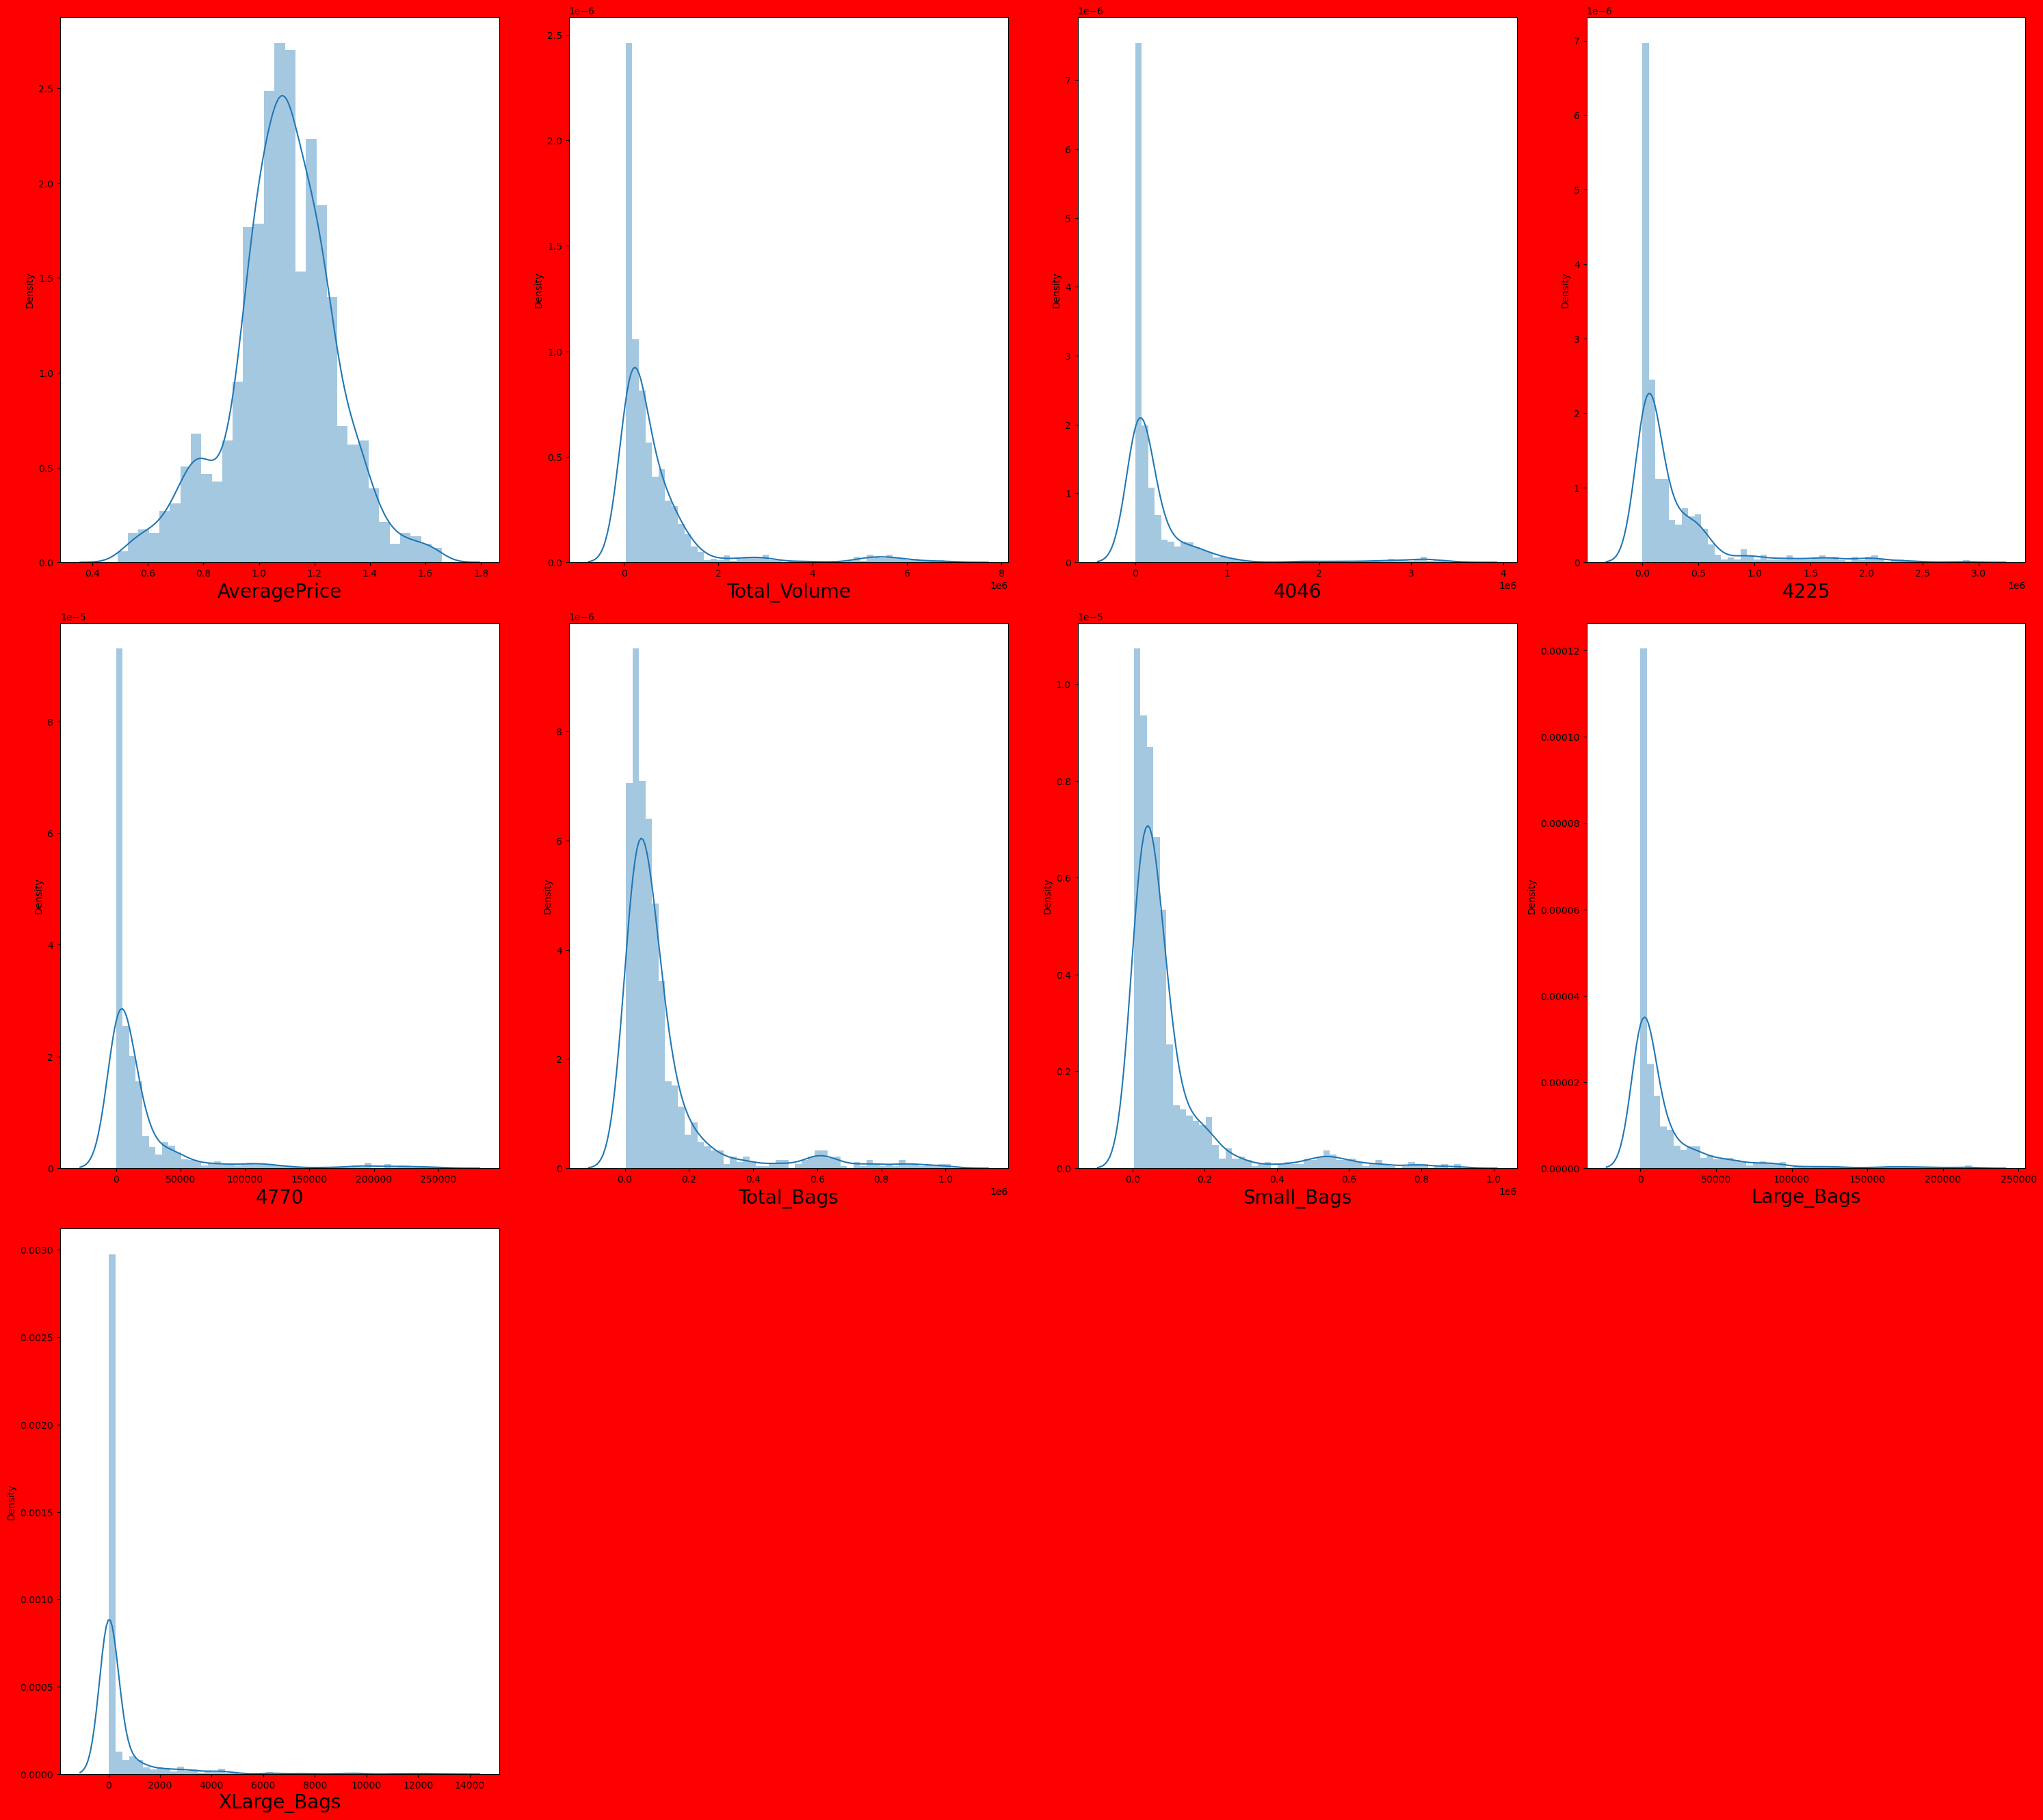

In [2622]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df_features:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df_features[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Checking Contribution Score

In [2623]:
from sklearn.feature_selection import SelectKBest, f_classif

In [2624]:
x = df.drop(columns = ['region'])
y = df['region']

In [2625]:
best_features = SelectKBest(score_func=f_classif, k=9)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(9, 'Score'))

   Feature_Name        Score
1  Total_Volume  1656.440494
2          4046  1050.634601
6    Small_Bags   709.948224
5    Total_Bags   684.727165
3          4225   634.614622
4          4770   240.508434
7    Large_Bags   109.798395
8   XLarge_Bags    64.853485
0  AveragePrice    52.956107


# 

### Checking Multi-correlation

In [2626]:
corr = df.corr()
corr

AveragePrice  Total_Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.215418 -0.358388 -0.042323 -0.026700   
Total_Volume     -0.215418      1.000000  0.906191  0.903000  0.623634   
4046             -0.358388      0.906191  1.000000  0.643420  0.498761   
4225             -0.042323      0.903000  0.643420  1.000000  0.586519   
4770             -0.026700      0.623634  0.498761  0.586519  1.000000   
Total_Bags       -0.067702      0.906876  0.691909  0.918249  0.587532   
Small_Bags       -0.030970      0.891711  0.664963  0.917318  0.615147   
Large_Bags       -0.210348      0.686758  0.593317  0.632074  0.258087   
XLarge_Bags       0.003162      0.134937  0.084093  0.118178  0.501983   
region           -0.208721      0.153222  0.211290  0.066982 -0.086478   

              Total_Bags  Small_Bags  Large_Bags  XLarge_Bags    region  
AveragePrice   -0.067702   -0.030970   -0.210348     0.003162 -0.208721  
Total_Volume    0.906876    0.891711    0.686758     0.134937  0.153222  
4046            0.691909    0.664963    0.593317     0.084093  0.211290  
4225            0.918249    0.917318    0.632074     0.118178  0.066982  
4770            0.587532    0.615147    0.258087     0.501983 -0.086478  
Total_Bags      1.000000    0.988485    0.733234     0.166563  0.125265  
Small_Bags      0.988485    1.000000    0.622155     0.179761  0.099447  
Large_Bags      0.733234    0.622155    1.000000     0.007445  0.209185  
XLarge_Bags     0.166563    0.179761    0.007445     1.000000 -0.160696  
region          0.125265    0.099447    0.209185    -0.160696  1.000000

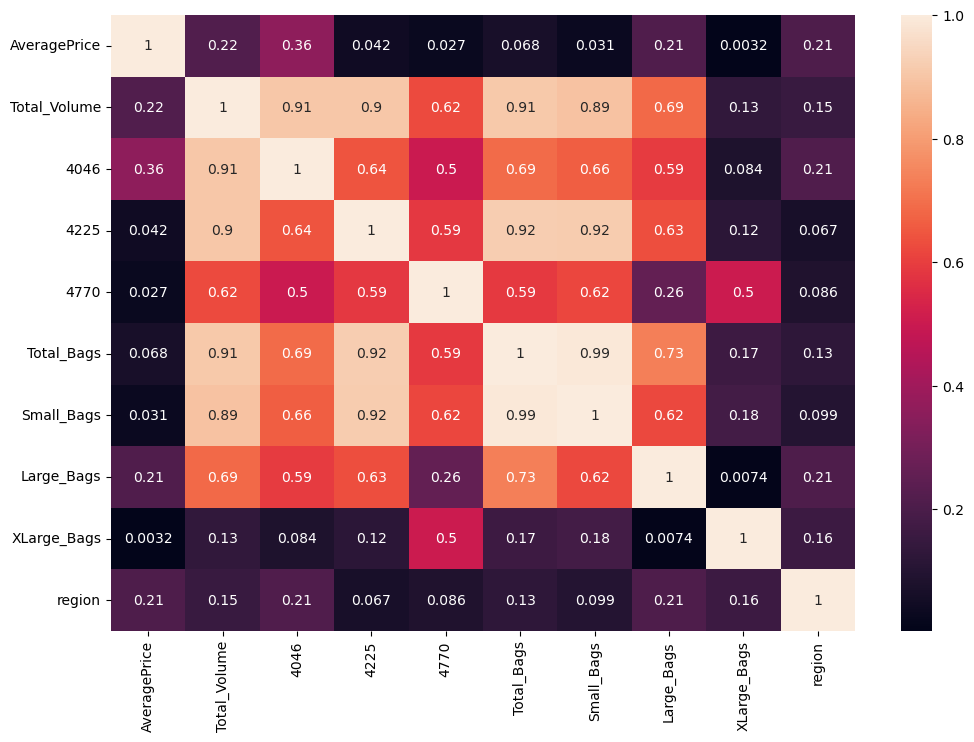

In [2627]:
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Checking Relation between Features

In [2628]:
df_features.columns

Index(['AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags'],
      dtype='object')

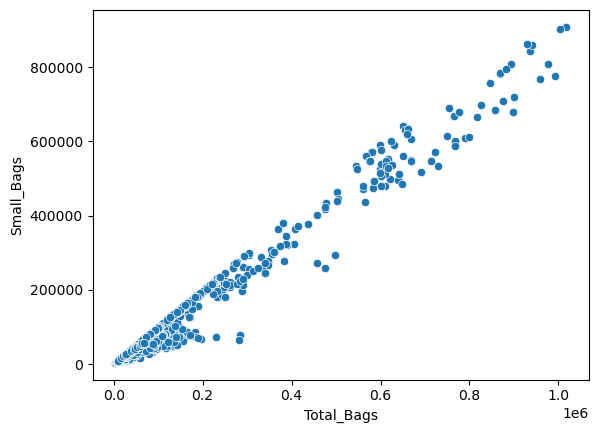

In [2629]:
sns.scatterplot(x = 'Total_Bags', y = 'Small_Bags', data = df)
plt.show()

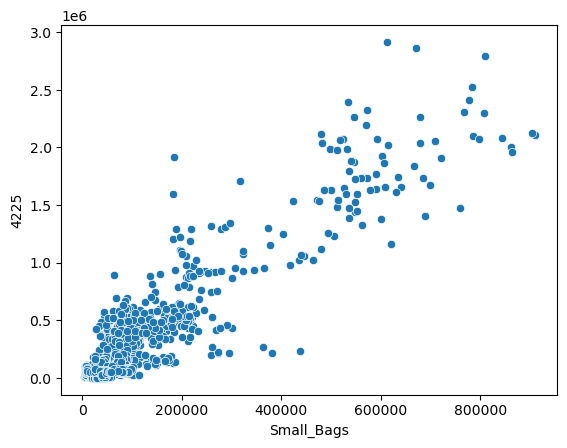

In [2630]:
sns.scatterplot(x = 'Small_Bags', y = '4225', data = df)
plt.show()

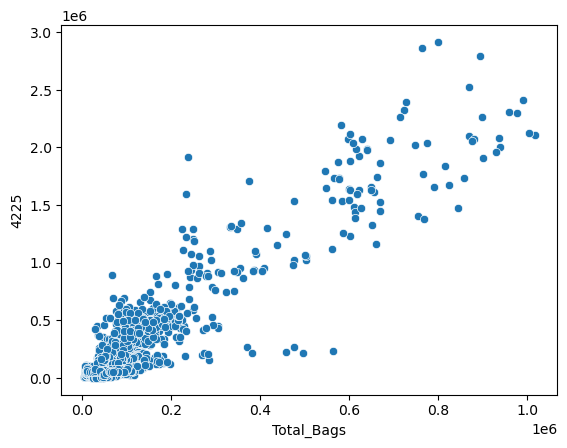

In [2631]:
sns.scatterplot(x = 'Total_Bags', y = '4225', data = df)
plt.show()

# 

### Removing Features

##### Removing features that are very related to other features

In [2632]:
df = df.drop(['Total_Bags','Total_Volume','4225'], axis=1)
df.head()

AveragePrice     4046    4770  Small_Bags  Large_Bags  XLarge_Bags  region
0          1.33  1036.74   48.16     8603.62       93.25          0.0       0
1          1.35   674.28   58.33     9408.07       97.49          0.0       0
2          0.93   794.70  130.50     8042.21      103.14          0.0       0
3          1.08  1132.00   72.58     5677.40      133.76          0.0       0
4          1.28   941.48   75.78     5986.26      197.69          0.0       0

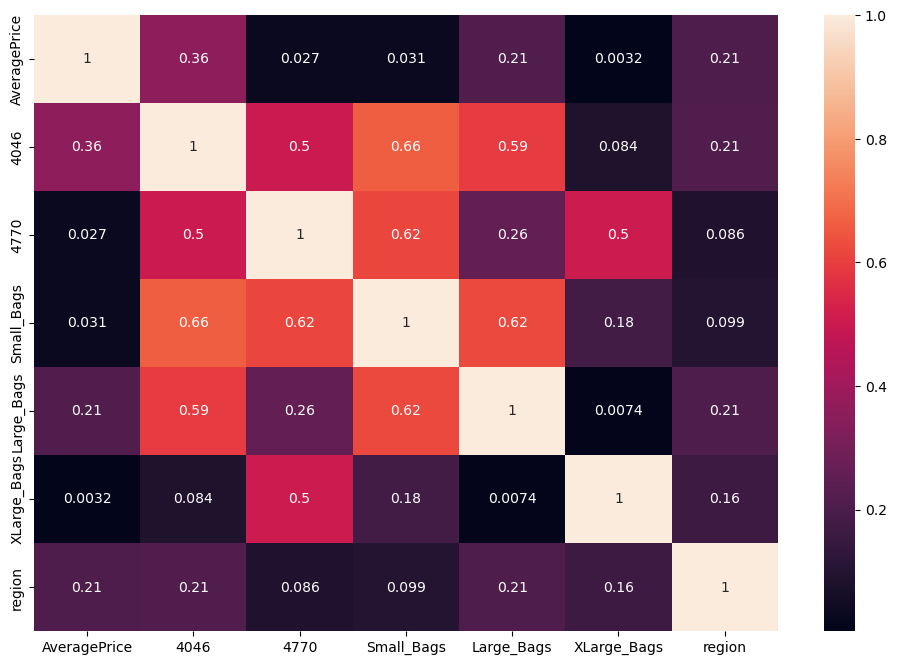

In [2633]:
df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Removing Skewness

In [2634]:
df.skew()

AveragePrice   -0.239371
4046            3.836736
4770            3.472851
Small_Bags      3.062622
Large_Bags      3.352310
XLarge_Bags     4.786100
region          0.277373
dtype: float64

In [2635]:
df['4046'] = np.log(df['4046'])
df['4770'] = np.log1p(df['4770'])
df['Small_Bags'] = np.log(df['Small_Bags'])
df['Large_Bags'] = np.log1p(df['Large_Bags'])
df['XLarge_Bags'] = np.log1p(df['XLarge_Bags'])

In [2636]:
df.skew()

AveragePrice   -0.239371
4046           -0.320068
4770           -0.499047
Small_Bags      0.229624
Large_Bags     -1.012409
XLarge_Bags     0.918190
region          0.277373
dtype: float64

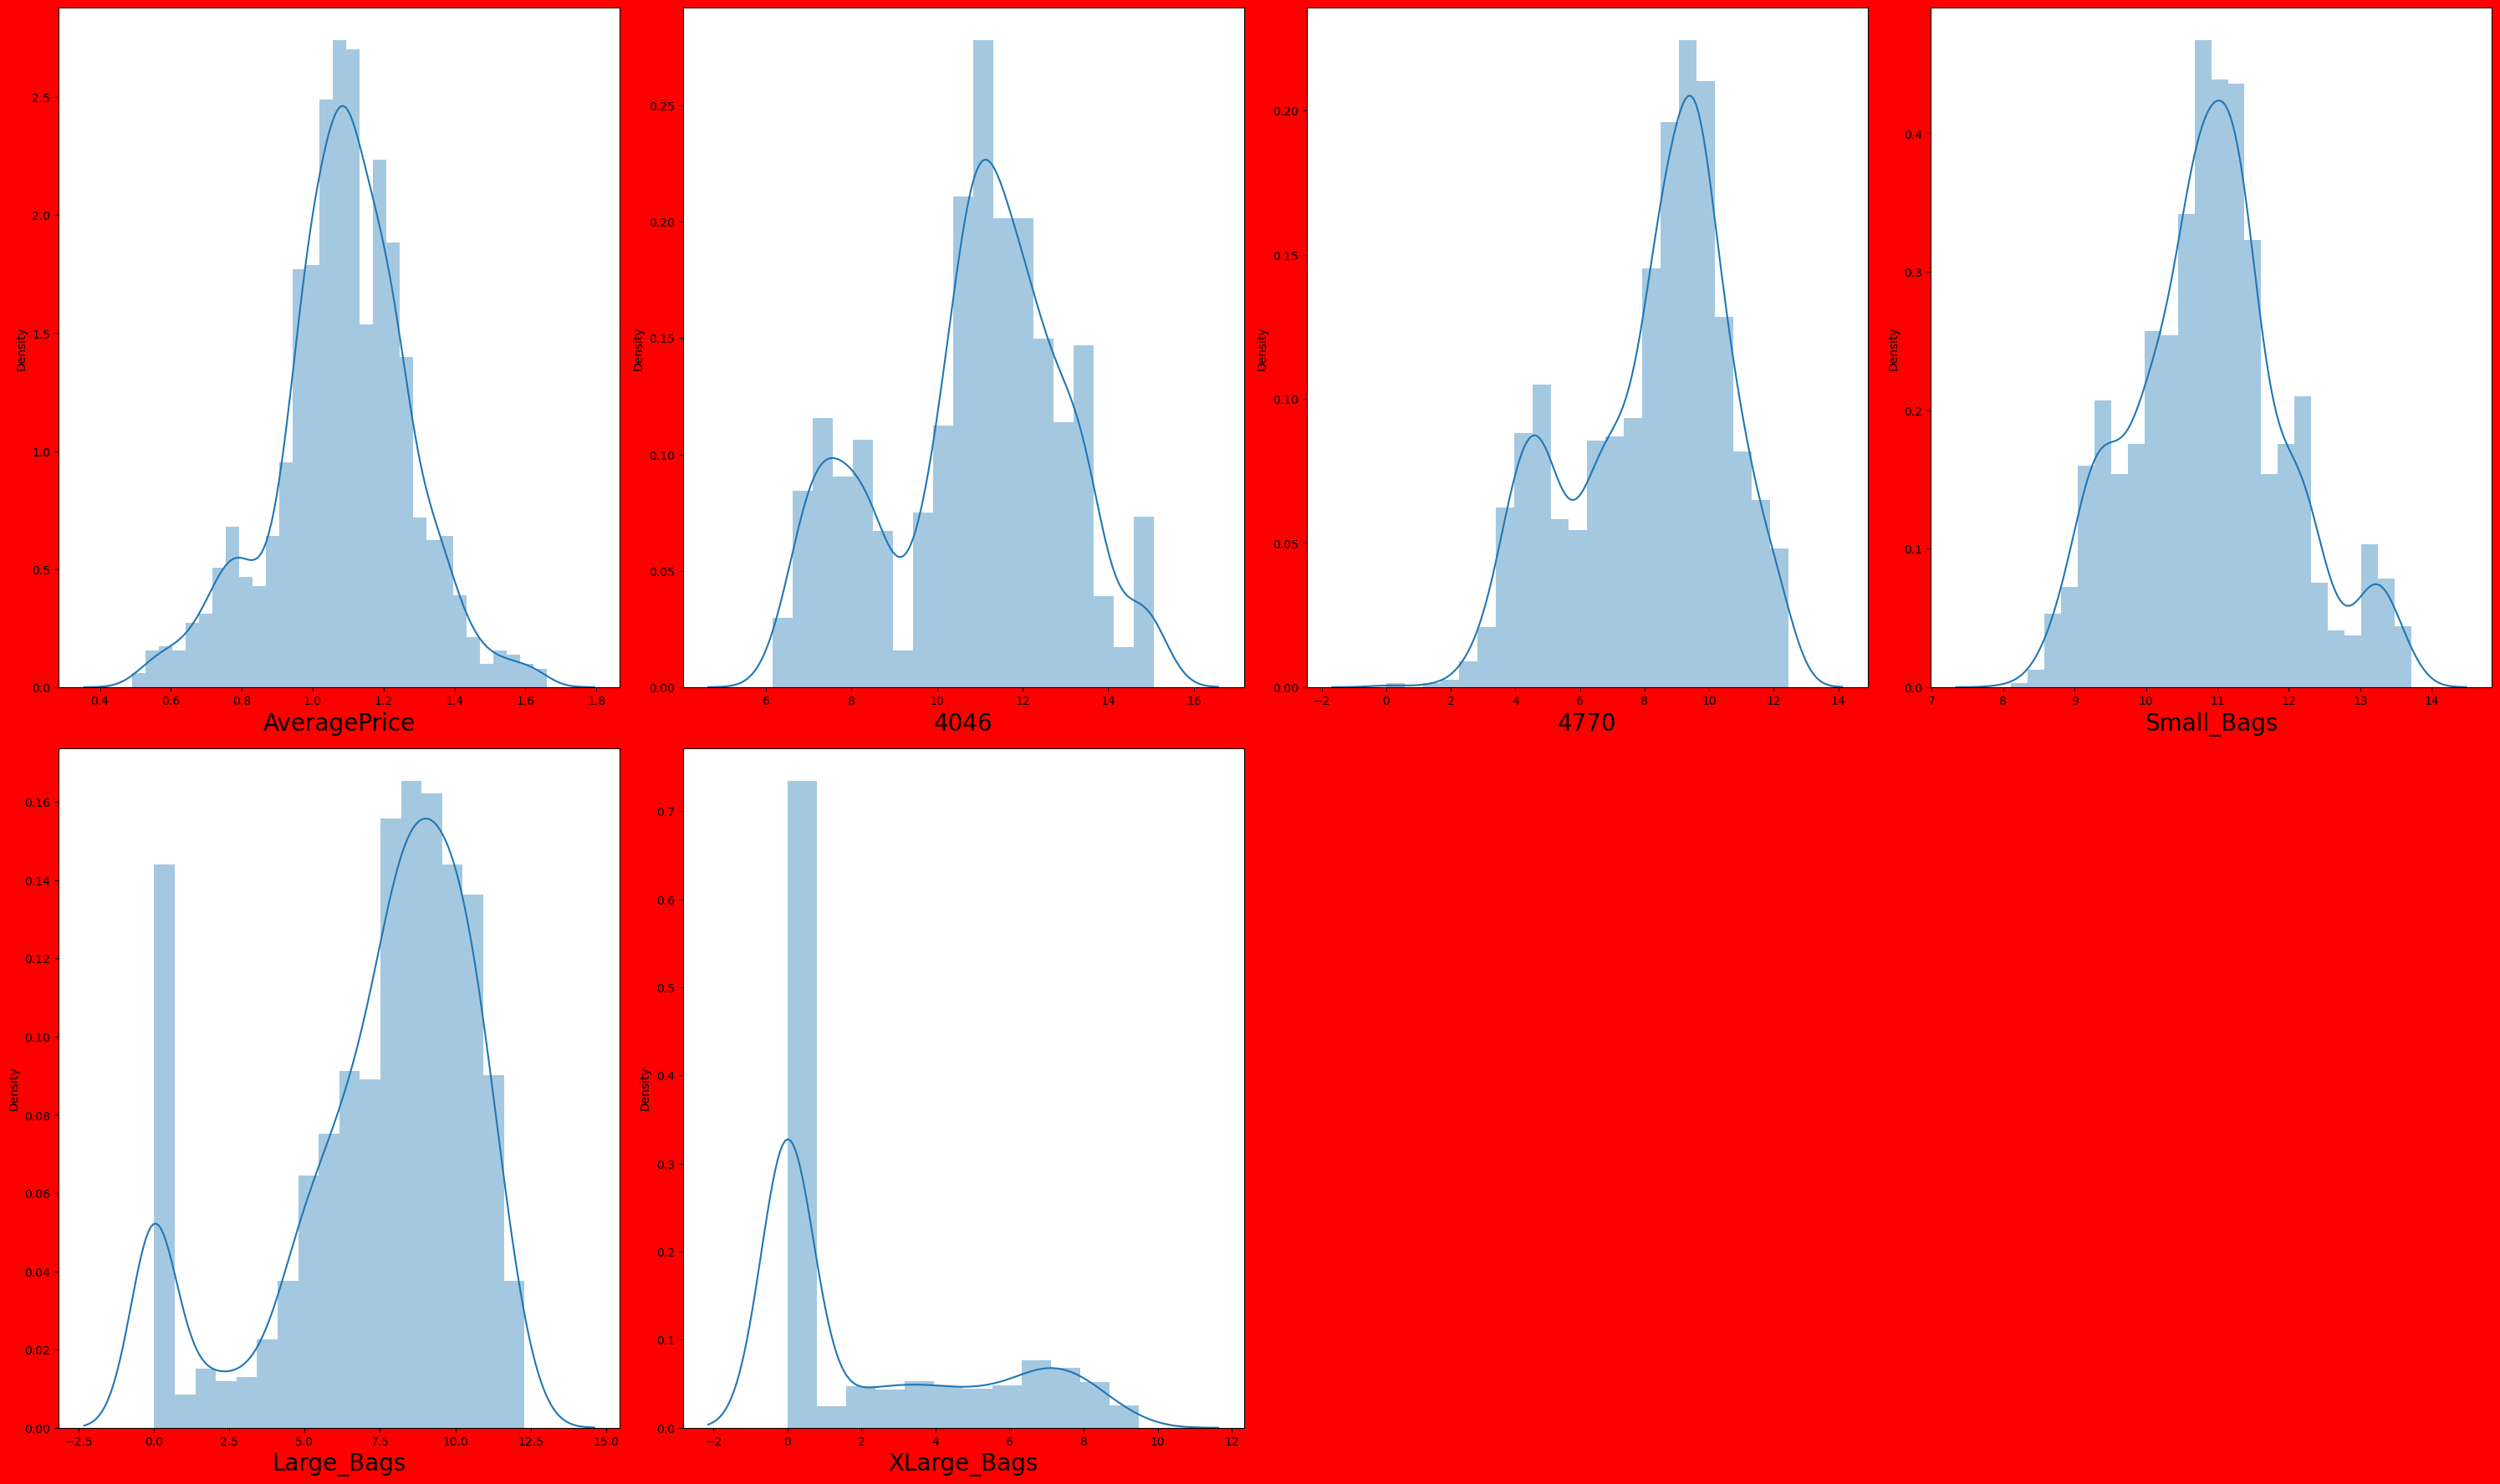

In [2637]:
df_features = df.drop(['region'], axis=1)

plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df_features:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df_features[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [2638]:
df.describe()

AveragePrice         4046         4770   Small_Bags   Large_Bags  \
count   1363.000000  1363.000000  1363.000000  1363.000000  1363.000000   
mean       1.083940    10.828353     8.141949    10.902636     7.393015   
std        0.189926     2.110938     2.360204     1.075693     3.273532   
min        0.490000     6.147870     0.000000     8.105238     0.000000   
25%        0.990000     9.644335     6.514236    10.177659     5.936807   
50%        1.090000    11.060528     8.638361    10.893141     8.207756   
75%        1.200000    12.278489     9.773273    11.477987     9.779989   
max        1.660000    15.074199    12.445010    13.720440    12.296690   

       XLarge_Bags       region  
count  1363.000000  1363.000000  
mean      2.243762    20.570066  
std       3.024802    15.611709  
min       0.000000     0.000000  
25%       0.000000     5.000000  
50%       0.000000    19.000000  
75%       4.695632    34.000000  
max       9.493779    50.000000

#### A lot of Skewness has been reduced, except XLarge_Bags

# 

### Checking Distribution of XLarge_Bags

In [2639]:
x = df.drop(columns = ['XLarge_Bags'])
y = df['XLarge_Bags']

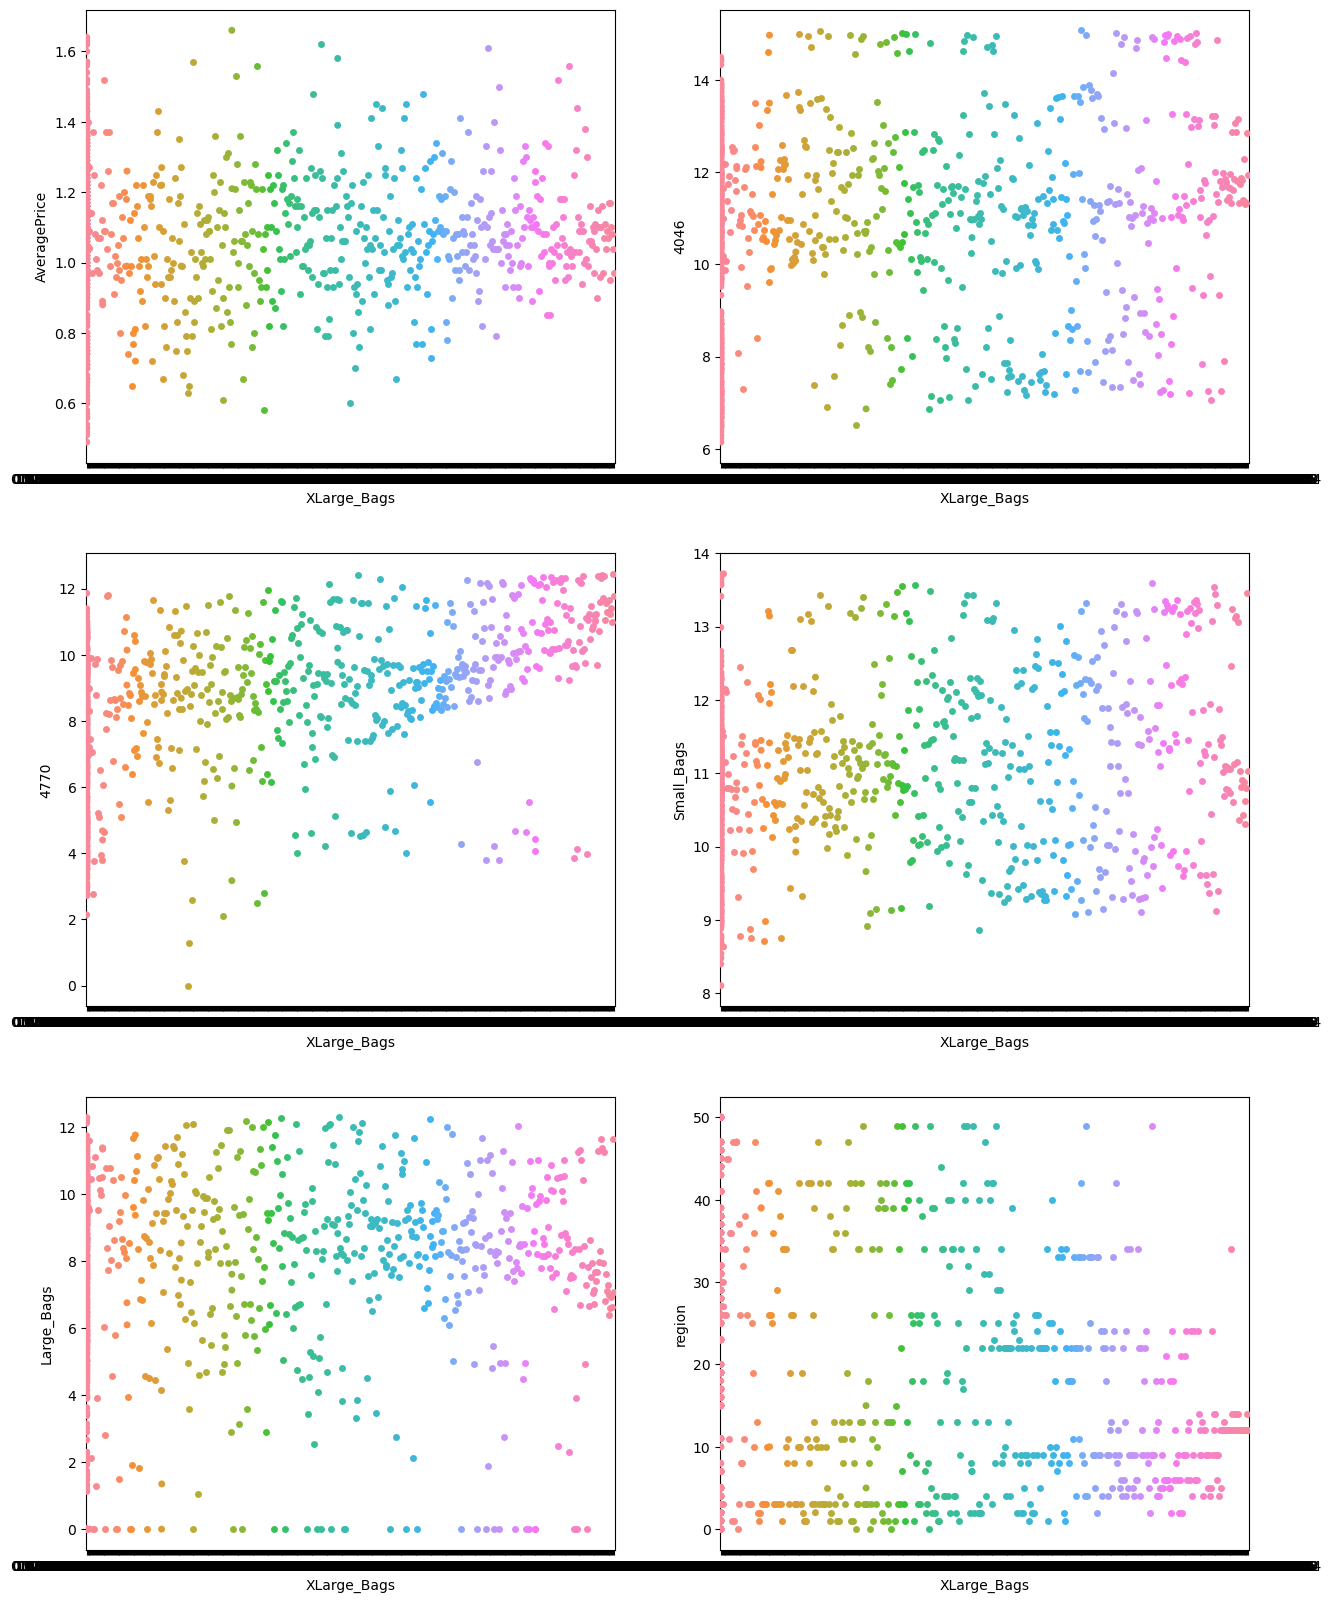

In [2640]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax = plt.subplot (3,2,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

##### So the distribution of XLarge_Bags is very unclear and irreverent. It shows no clear relation with any columns. So it can be removed.

In [2641]:
df = df.drop(columns = ['XLarge_Bags'])
df.head()

AveragePrice      4046      4770  Small_Bags  Large_Bags  region
0          1.33  6.943836  3.895080    9.059938    4.545951       0
1          1.35  6.513645  4.083115    9.149323    4.589955       0
2          0.93  6.677965  4.879007    8.992459    4.645736       0
3          1.08  7.031741  4.298373    8.644249    4.903495       0
4          1.28  6.847453  4.340944    8.697222    5.291746       0

In [2642]:
df.describe()

AveragePrice         4046         4770   Small_Bags   Large_Bags  \
count   1363.000000  1363.000000  1363.000000  1363.000000  1363.000000   
mean       1.083940    10.828353     8.141949    10.902636     7.393015   
std        0.189926     2.110938     2.360204     1.075693     3.273532   
min        0.490000     6.147870     0.000000     8.105238     0.000000   
25%        0.990000     9.644335     6.514236    10.177659     5.936807   
50%        1.090000    11.060528     8.638361    10.893141     8.207756   
75%        1.200000    12.278489     9.773273    11.477987     9.779989   
max        1.660000    15.074199    12.445010    13.720440    12.296690   

            region  
count  1363.000000  
mean     20.570066  
std      15.611709  
min       0.000000  
25%       5.000000  
50%      19.000000  
75%      34.000000  
max      50.000000

# 

# 

## Now, Classification, keeping Target=region, Features=Rest

### Checking Target values

In [2643]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50])

In [2644]:
x = df.drop(columns = ['region'])
y = df['region']

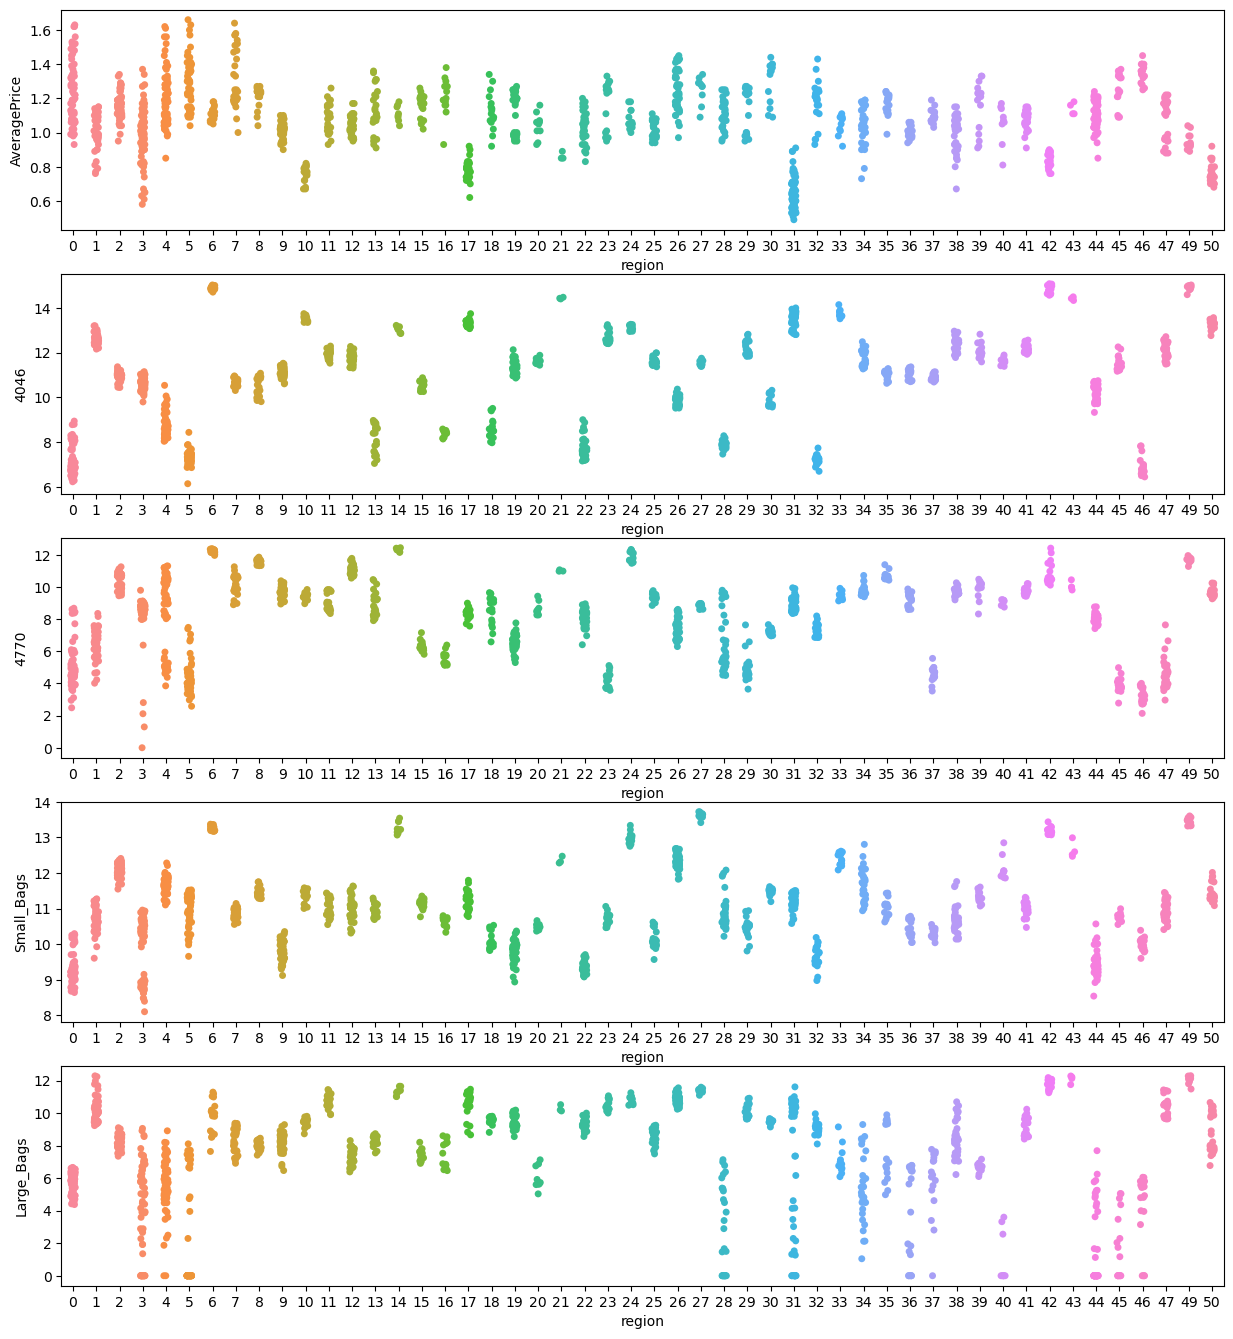

In [2645]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot (6,1,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

### Separating Features & Target

In [2646]:
x = df.drop(columns=['region'],axis=1)
y = df.region

# 

### Importing important Metrices

In [2647]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report 
from sklearn.model_selection import GridSearchCV

# 

### Standardization

In [2648]:
from sklearn.preprocessing import StandardScaler

In [2649]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Test - Train Split

In [2650]:
from sklearn.model_selection import train_test_split

In [2651]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=105)

# 

### Logistic Regression

In [962]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [963]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [964]:
cls_reg.coef_

array([[ 5.28284712e-01, -3.23701883e+00, -1.60613768e+00,
        -3.60254283e+00, -1.36650012e+00],
       [-2.26978526e-03,  3.03549729e+00, -1.74304410e+00,
        -9.76268232e-01,  1.35228766e+00],
       [ 7.99896646e-01, -1.18435430e+00,  1.46026205e+00,
         2.63812768e+00, -4.36126866e-02],
       [-2.26136801e+00, -7.31120815e-01, -8.83274044e-02,
        -2.80868905e+00, -2.14697612e+00],
       [ 6.91020033e-01, -3.30874300e+00, -2.32359906e-01,
         2.90846895e+00, -1.56268328e+00],
       [ 1.32415956e+00, -3.73947108e+00, -2.26509357e+00,
         1.99546865e+00, -2.77208080e+00],
       [ 1.17322339e+00,  3.02715700e+00,  2.13423777e+00,
         2.05042638e+00, -4.09051906e-01],
       [ 2.19529984e+00, -7.58797992e-01,  1.99700778e+00,
        -1.09277489e+00,  6.70166292e-01],
       [ 1.75047343e+00, -1.60114792e+00,  4.23203806e+00,
         2.79981109e-01,  2.43576884e-01],
       [-1.11383257e+00, -1.75993806e-01,  2.43789103e+00,
        -4.20261291e+00

In [965]:
cls_reg.intercept_

array([-1.67319257,  1.1650166 ,  1.48016484,  2.00182137,  1.54761289,
       -2.13471656, -3.3318734 ,  1.27797922, -1.25460955,  0.3862007 ,
       -0.73429353,  0.68743499, -0.43036749,  1.30603256, -2.80436357,
        2.64747943,  1.59754212, -0.21712542,  1.08880675,  1.0454917 ,
        2.17380259, -1.18961124, -0.70935576, -1.89254442, -1.74585185,
        1.56019194, -0.27103757, -1.65859686,  1.0862317 ,  0.28229031,
        1.479706  , -2.12576724, -1.00975861,  0.40383887,  2.25109401,
        1.42555197,  1.71131598,  1.32898915,  1.16514141,  1.69333811,
       -0.0437261 ,  1.64704703, -3.71696308, -1.14462243,  1.47422855,
        0.25551005, -3.11135185,  0.06512683, -4.26214468, -0.7731139 ])

In [966]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.7837573385518591


In [967]:
y_pred = cls_reg.predict(x_test)

In [968]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7331378299120235


In [969]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  2,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  4]], dtype=int64)

In [970]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00        24
           3       0.44      0.65      0.52        17
           4       0.94      0.83      0.88        18
           5       0.73      0.79      0.76        14
           6       1.00      1.00      1.00         7
           7       0.50      1.00      0.67         8
           8       1.00      0.83      0.91         6
           9       0.62      1.00      0.76        13
          10       0.00      0.00      0.00         7
          11       0.71      1.00      0.83         5
          12       0.50      1.00      0.67         4
          13       0.75      0.75      0.75         4
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         7
          16       0.67      1.00      0.80         2
          17       0.33    

### Cross-validation

In [1064]:
from sklearn.model_selection import KFold, cross_val_score

In [1065]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.73658537, 0.75121951, 0.73529412, 0.73529412, 0.7254902 ])

In [1066]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.7367766618842659

In [1067]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.5942029 , 0.66176471, 0.61764706, 0.63235294, 0.58823529])

In [1068]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.618840579710145

# 

### DecisionTreeClassifier

In [971]:
from sklearn.tree import DecisionTreeClassifier

In [973]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'best'}

In [979]:
cls_dt = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [980]:
cls_dt.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [981]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 1.0


In [984]:
y_pred = cls_dt.predict(x_test)

In [985]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9149560117302052


In [986]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [987]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        24
           3       0.94      1.00      0.97        17
           4       0.94      0.94      0.94        18
           5       0.83      0.71      0.77        14
           6       1.00      1.00      1.00         7
           7       0.73      1.00      0.84         8
           8       1.00      1.00      1.00         6
           9       0.93      1.00      0.96        13
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.50      1.00      0.67         2
          17       0.57    

### Cross-validation

In [1069]:
from sklearn.model_selection import KFold, cross_val_score

In [1070]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.90731707, 0.93658537, 0.94117647, 0.91176471, 0.92647059])

In [1071]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.9256480153036823

In [1072]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.82608696, 0.83823529, 0.82352941, 0.82352941, 0.80882353])

In [1073]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.8358056265984655

# 

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [996]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [997]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [998]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [999]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9413489736070382


In [1002]:
y_pred = cls_rf.predict(x_test)

In [1001]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9120234604105572


In [1003]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [1004]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        24
           3       0.94      1.00      0.97        17
           4       0.94      0.94      0.94        18
           5       0.83      0.71      0.77        14
           6       1.00      1.00      1.00         7
           7       0.73      1.00      0.84         8
           8       1.00      1.00      1.00         6
           9       0.93      1.00      0.96        13
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.67      1.00      0.80         2
          17       0.57    

### Cross-validation

In [1058]:
from sklearn.model_selection import KFold, cross_val_score

In [1074]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.91219512, 0.93170732, 0.94607843, 0.91666667, 0.93137255])

In [1075]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.9285700621712099

In [1076]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.8115942 , 0.83823529, 0.83823529, 0.83823529, 0.83823529])

In [1077]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8417306052855926

# 

### KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [988]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [989]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [990]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [991]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [992]:
y_pred = cls_KN.predict(x_test)

In [993]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9413489736070382


In [994]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  1,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  8]], dtype=int64)

In [995]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        18
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00         7
           7       0.89      1.00      0.94         8
           8       1.00      0.83      0.91         6
           9       1.00      0.92      0.96        13
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         5
          12       0.80      1.00      0.89         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.67      1.00      0.80         2
          17       0.80    

### Cross-validation

In [1058]:
from sklearn.model_selection import KFold, cross_val_score

In [1078]:
cross_val_score (cls_KN, x_train, y_train, cv=5)

array([0.90731707, 0.91707317, 0.93137255, 0.87745098, 0.89215686])

In [1079]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.9050741272118603

In [1080]:
cross_val_score (cls_KN, x_test, y_test, cv=5)

array([0.85507246, 0.86764706, 0.76470588, 0.83823529, 0.80882353])

In [1081]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.8268968456947997

# 

### Support Vector Classifier

In [2652]:
from sklearn.svm import SVC

In [2653]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [2654]:
cls_SVC = SVC(kernel='linear',C=500, gamma=20)

In [2655]:
cls_SVC.fit(x_train, y_train)

SVC(C=500, gamma=20, kernel='linear')

In [2656]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.9647749510763209


In [2657]:
y_pred = cls_SVC.predict(x_test)

In [2658]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.906158357771261


In [2659]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  1,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [2660]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.87      0.93      0.90        14
           2       1.00      1.00      1.00        24
           3       0.82      0.82      0.82        17
           4       0.89      0.94      0.92        18
           5       1.00      0.79      0.88        14
           6       1.00      1.00      1.00         7
           7       0.73      1.00      0.84         8
           8       1.00      1.00      1.00         6
           9       0.93      1.00      0.96        13
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.40      1.00      0.57         2
          17       0.67    

### Cross-validation

In [2661]:
from sklearn.model_selection import KFold, cross_val_score

In [2662]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.88292683, 0.91219512, 0.89215686, 0.87254902, 0.89215686])

In [2663]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.8903969392635103

In [2664]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.84057971, 0.85294118, 0.79411765, 0.79411765, 0.77941176])

In [2665]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.812233589087809

# 

### GradientBoostingClassifier

In [1018]:
from sklearn.ensemble import GradientBoostingClassifier

In [1026]:
cls_gb = GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3)

In [1027]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [1028]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.036203522504892366


In [1029]:
y_pred = cls_gb.predict(x_test)

In [1030]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.01466275659824047


In [1031]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1032]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         7
           7       0.01      0.12      0.01         8
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         2
          17       0.00    

### Cross-validation

In [1052]:
from sklearn.model_selection import KFold, cross_val_score

In [1053]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.1902439 , 0.08780488, 0.07843137, 0.00980392, 0.09803922])

In [1054]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.09871353419416547

In [1055]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.44927536, 0.07352941, 0.58823529, 0.61764706, 0.14705882])

In [1056]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.08901482544237208

### Applying BaggingClassifier to GradientBoostingClassifier

In [1091]:
from sklearn.ensemble import BaggingClassifier

In [1092]:
bag = BaggingClassifier(GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3))

In [1093]:
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [1094]:
print('Accuracy Score:',bag.score(x_train, y_train))

Accuracy Score: 0.18688845401174167


In [1095]:
y_pred = bag.predict(x_test)

In [1096]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.17595307917888564


In [1097]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 2,  0,  0, ...,  0,  0,  0],
       [ 1,  8,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [1098]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.07      0.10      0.08        21
           1       0.73      0.57      0.64        14
           2       0.48      0.46      0.47        24
           3       0.05      0.29      0.08        17
           4       0.00      0.00      0.00        18
           5       0.50      0.14      0.22        14
           6       0.00      0.00      0.00         7
           7       0.17      0.75      0.27         8
           8       0.00      0.00      0.00         6
           9       1.00      0.38      0.56        13
          10       0.00      0.00      0.00         7
          11       0.50      0.20      0.29         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.60      0.86      0.71         7
          16       0.00      0.00      0.00         2
          17       0.05    

### Cross-validation

In [1099]:
from sklearn.model_selection import KFold, cross_val_score

In [1100]:
cross_val_score (bag, x_train, y_train, cv=5)

array([0.19512195, 0.23902439, 0.30392157, 0.24509804, 0.10784314])

In [1101]:
cross_val_score (bag, x_train, y_train, cv=5).mean()

0.2074892395982783

In [1102]:
cross_val_score (bag, x_test, y_test, cv=5)

array([0.52173913, 0.58823529, 0.70588235, 0.61764706, 0.55882353])

In [1103]:
cross_val_score (bag, x_train, y_train, cv=5).mean()

0.24264945002391197

# 

### GaussianNB

In [1036]:
from sklearn.naive_bayes import GaussianNB

In [1037]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [1038]:
gnb = GaussianNB(var_smoothing=1e-09)

In [1039]:
gnb.fit(x_train, y_train)

GaussianNB()

In [1057]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.9373776908023483


In [1041]:
y_pred = gnb.predict(x_test)

In [1042]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8826979472140762


In [1043]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  1,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [1044]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.87      0.93      0.90        14
           2       1.00      0.96      0.98        24
           3       0.73      0.94      0.82        17
           4       0.95      1.00      0.97        18
           5       0.85      0.79      0.81        14
           6       1.00      1.00      1.00         7
           7       0.80      1.00      0.89         8
           8       1.00      0.83      0.91         6
           9       1.00      0.92      0.96        13
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         5
          12       0.80      1.00      0.89         4
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.50      1.00      0.67         2
          17       0.50    

### Cross-validation

In [1058]:
from sklearn.model_selection import KFold, cross_val_score

In [1059]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.85853659, 0.91707317, 0.90196078, 0.85784314, 0.89705882])

In [1060]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.88649450023912

In [1061]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.75362319, 0.83823529, 0.73529412, 0.80882353, 0.67647059])

In [1063]:
cross_val_score (gnb, x_test, y_test, cv=5).mean()

0.7624893435635125

# 

## Best Model

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [996]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [997]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [998]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [999]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9413489736070382


In [1002]:
y_pred = cls_rf.predict(x_test)

In [1001]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9120234604105572


In [1003]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[20,  0,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

In [1004]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        24
           3       0.94      1.00      0.97        17
           4       0.94      0.94      0.94        18
           5       0.83      0.71      0.77        14
           6       1.00      1.00      1.00         7
           7       0.73      1.00      0.84         8
           8       1.00      1.00      1.00         6
           9       0.93      1.00      0.96        13
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         7
          16       0.67      1.00      0.80         2
          17       0.57    

### Cross-validation

In [1058]:
from sklearn.model_selection import KFold, cross_val_score

In [1074]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.91219512, 0.93170732, 0.94607843, 0.91666667, 0.93137255])

In [1075]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.9285700621712099

In [1076]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.8115942 , 0.83823529, 0.83823529, 0.83823529, 0.83823529])

In [1077]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8417306052855926

#### Lasso Regression model has the higher R2 score. The difference between the Accuracy of Training data & R2 score is very less & the difference between the R2 score & Cross Validation mean score is the least of all models. Hence, Lasso Regression is the best model.

# 

### Saving the Best Model

In [2668]:
import pickle 

In [2669]:
with open('model_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

# 

# 

## Now, Regression, keeping Target=AveragePrice, Features=Rest

### Separating Features & Target

In [1104]:
x = df.drop(columns=['AveragePrice'],axis=1)
y = df.AveragePrice

# 

### Importing important Metrices

In [1108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 

### Standardization

In [1109]:
from sklearn.preprocessing import StandardScaler

In [1110]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Test - Train Split

In [1111]:
from sklearn.model_selection import train_test_split

In [1112]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=105)

# 

### Linear Regression

In [1113]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [1114]:
reg.fit(x_train, y_train)

LinearRegression()

In [1115]:
reg.coef_

array([-0.10444832, -0.0239562 ,  0.03907154,  0.00113351, -0.00875057])

In [1116]:
reg.intercept_

1.0820871340916154

In [1117]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.32923986580724374


In [1118]:
y_pred = reg.predict(x_test)

In [1119]:
r2_score(y_test, y_pred)

0.28604824765719983

In [1120]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.028172988902430234
RMSE 0.16784811259716398
MAE 0.13335410315173868


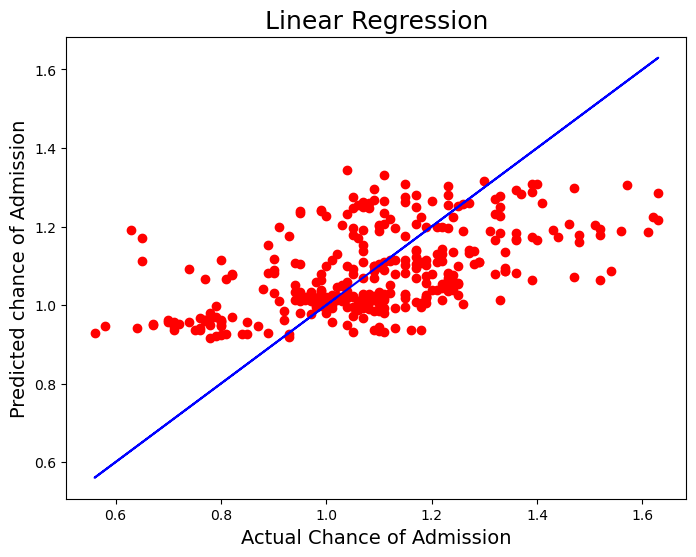

In [1121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Linear Regression', fontsize=18) 
#plt.savefig('lr.png')
plt.show()

### Cross-validation for LinearRegression

In [1122]:
from sklearn.model_selection import cross_val_score

In [1131]:
cv_score=cross_val_score (reg, x_train, y_train, cv=40)

In [1132]:
cv_score

array([ 0.19175426,  0.33935734,  0.07060619,  0.37703825,  0.17085827,
        0.01854623,  0.32368574,  0.36071988,  0.53642465,  0.21518612,
        0.19657801,  0.21331155,  0.46384446,  0.31193271,  0.39980716,
        0.29869775,  0.57627159,  0.43716194,  0.29898262,  0.29700971,
        0.29079834,  0.08175813,  0.10500855,  0.22117973,  0.29876429,
        0.37511047,  0.37473429,  0.46320901,  0.27046437,  0.17335688,
        0.37434844,  0.2898648 ,  0.31434175,  0.46363221, -0.01645367,
        0.37294728, -0.10924894,  0.40070479,  0.24953547,  0.10084682])

In [1133]:
cv_mean

0.2798169357482488

In [1143]:
cv_score=cross_val_score (reg, x_test, y_test, cv=20)

In [1144]:
cv_score

array([-0.4666242 ,  0.2244705 ,  0.47590818,  0.35957847,  0.05625918,
       -0.25342768,  0.34628163,  0.2775614 ,  0.15366639,  0.37609023,
        0.2208042 ,  0.12137586,  0.12690261,  0.06296733,  0.09495657,
        0.42523192,  0.21046004,  0.23997556, -0.65134054,  0.23963508])

In [1145]:
cv_mean

0.13203663584643097

# 

### DecisionTreeRegressor

In [1146]:
from sklearn.tree import DecisionTreeRegressor

In [1147]:
dr = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae', "gini", "entropy", "log_loss"],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'splitter': 'random'}

In [1684]:
dec = DecisionTreeRegressor(criterion='mse', splitter='best', max_features=None, min_samples_leaf= 1, min_samples_split=5,max_depth=11)

In [1685]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_split=5)

In [1686]:
print('Accuracy Score:',dec.score(x_train, y_train))

Accuracy Score: 0.9231945492346083


In [1687]:
y_pred = dec.predict(x_test)

In [1688]:
r2_score(y_test, y_pred)

0.7234547683449912

In [1689]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.010912650213225758
RMSE 0.10446363105514644
MAE 0.07332729716570319


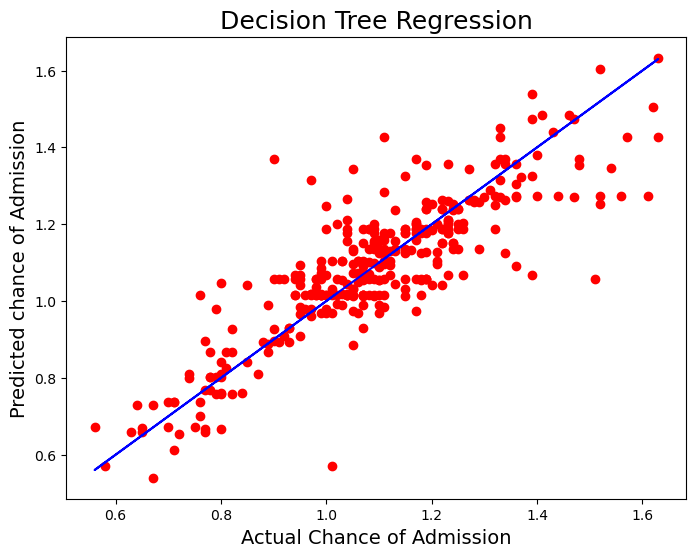

In [1690]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Decision Tree Regression', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for DecisionTreeRegressor

In [1691]:
from sklearn.model_selection import cross_val_score

In [1704]:
cv_score=cross_val_score (dec, x_train, y_train, cv=20)
cv_mean=cv_score.mean()

In [1705]:
cv_score

array([0.44077354, 0.14017834, 0.33862466, 0.70715528, 0.58760814,
       0.48788963, 0.58596043, 0.65160759, 0.67555389, 0.42732981,
       0.57601808, 0.50882037, 0.56257098, 0.62490909, 0.73880016,
       0.89353863, 0.66949174, 0.43403878, 0.6526383 , 0.50937829])

In [1706]:
cv_mean

0.5606442872093534

In [1707]:
cv_score=cross_val_score (dec, x_test, y_test, cv=20)

In [1708]:
cv_score

array([ 0.09758922,  0.35373716,  0.69136348,  0.18706163,  0.15401934,
       -1.51608509,  0.33412539,  0.5295427 ,  0.46973312,  0.71645094,
        0.10167408,  0.66274911,  0.07176485,  0.50843122,  0.5183576 ,
        0.39434453,  0.76110653,  0.31559329, -0.40810622,  0.37481885])

In [1709]:
cv_mean

0.5606442872093534

# 

### RandomForestRegressor

In [1150]:
from sklearn.ensemble import RandomForestRegressor

In [1811]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 105}

In [2091]:
rf = RandomForestRegressor(n_estimators=35, max_features= 'log2' ,min_samples_split=7,max_depth=18, max_leaf_nodes=300)

In [2092]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features='log2', max_leaf_nodes=300,
                      min_samples_split=7, n_estimators=35)

In [2093]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.9242579184055734


In [2094]:
y_pred = rf.predict(x_test)

In [2095]:
r2_score(y_test, y_pred)

0.751018439254726

In [2096]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.009824970279529985
RMSE 0.09912098808794223
MAE 0.07210113742261527


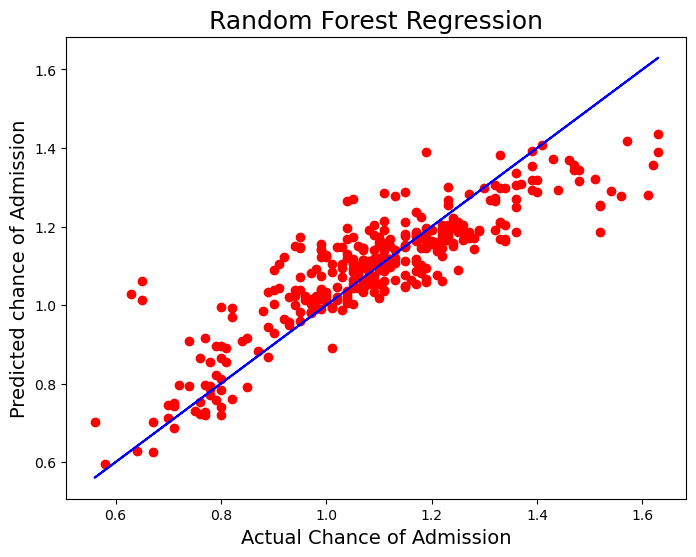

In [2097]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Random Forest Regression', fontsize=18) 
#plt.savefig('rf.png')
plt.show()

### Cross-validation for RandomForestRegressor

In [2105]:
from sklearn.model_selection import cross_val_score

In [2106]:
cv_score=cross_val_score (rf, x_train, y_train, cv=20)
cv_mean=cv_score.mean()

In [2107]:
cv_score

array([0.62504357, 0.78691439, 0.61879198, 0.7951375 , 0.86120565,
       0.73876048, 0.77284942, 0.8155238 , 0.84478761, 0.76361269,
       0.68270484, 0.63927648, 0.70421122, 0.84439903, 0.78772321,
       0.8045021 , 0.81351443, 0.67244003, 0.82281402, 0.73447798])

In [2108]:
cv_mean

0.7564345207689926

In [2109]:
cv_score=cross_val_score (rf, x_test, y_test, cv=20)
cv_mean=cv_score.mean()

In [2110]:
cv_score

array([0.2695475 , 0.6299102 , 0.66896514, 0.47242672, 0.48648033,
       0.37259816, 0.59940897, 0.61410791, 0.5431077 , 0.7643629 ,
       0.63518582, 0.45288514, 0.24202006, 0.65872396, 0.63810405,
       0.82193823, 0.48469381, 0.53241856, 0.28945938, 0.56712106])

In [2111]:
cv_mean

0.5371732804291405

# 

### KNeighborsRegressor

In [1184]:
from sklearn.neighbors import KNeighborsRegressor

In [1185]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [2214]:
reg_KN = KNeighborsRegressor(n_neighbors=2, leaf_size=1, p = 1)

In [2215]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=2, p=1)

In [2216]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.9319711833777893


In [2217]:
y_pred = reg_KN.predict(x_test)

In [2218]:
r2_score(y_test, y_pred)

0.8243730225113881

In [2219]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.00693035190615836
RMSE 0.08324873516251378
MAE 0.06020527859237537


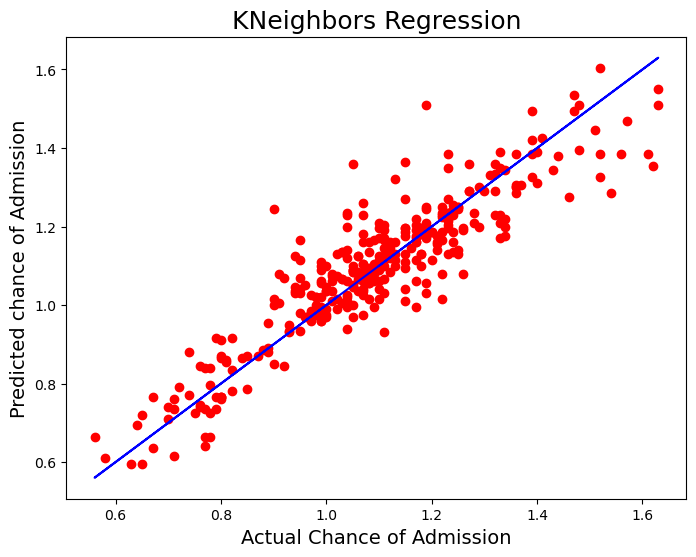

In [2220]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('KNeighbors Regression', fontsize=18) 
#plt.savefig('knn.png')
plt.show()

### Cross-validation for KNeighborsRegressor

In [2221]:
from sklearn.model_selection import cross_val_score

In [2222]:
cv_score=cross_val_score (reg_KN, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2223]:
cv_score

array([0.72921618, 0.76375282, 0.80172437, 0.7183673 ])

In [2224]:
cv_mean

0.7532651657395016

In [2225]:
cv_score=cross_val_score (reg_KN, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2226]:
cv_score

array([0.50856308, 0.60126966, 0.64213221, 0.6702177 ])

In [2227]:
cv_mean

0.6055456643482591

# 

### SVR

In [1203]:
from sklearn.svm import SVR

In [1204]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [2318]:
svr = SVR(kernel='rbf',C=100, gamma=2)

In [2319]:
svr.fit(x_train, y_train)

SVR(C=100, gamma=2)

In [2320]:
y_pred = svr.predict(x_test)

In [2321]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.8675354419989674


In [2322]:
r2_score(y_test, y_pred)

0.7060864885400184

In [2323]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.01159801354848494
RMSE 0.10769407387820808
MAE 0.07975195471160876


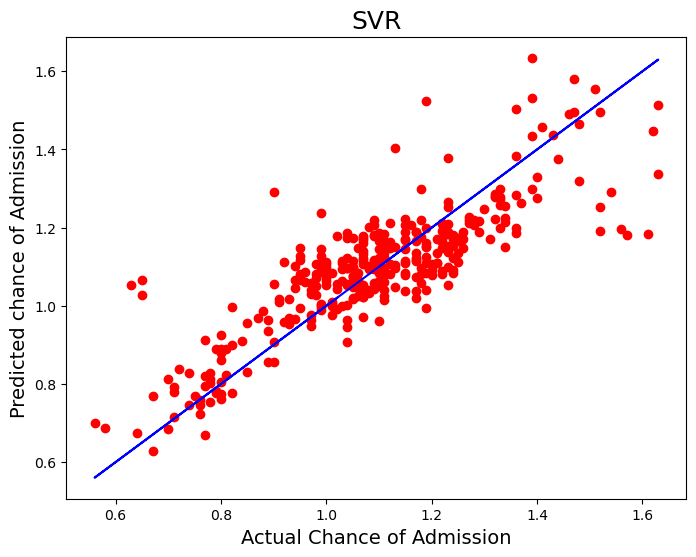

In [2324]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('SVR', fontsize=18) 
#plt.savefig('svc.png')
plt.show()

### Cross-validation for SVR

In [2325]:
from sklearn.model_selection import cross_val_score

In [2326]:
cv_score=cross_val_score (svr, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2327]:
cv_score

array([0.69556802, 0.72052517, 0.77001528, 0.72408022])

In [2328]:
cv_mean

0.7275471740398334

In [2329]:
cv_score=cross_val_score (svr, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2330]:
cv_score

array([0.44723875, 0.50776866, 0.50292564, 0.59604705])

In [2331]:
cv_mean

0.51349502699792

# 

### XGB

In [2388]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [2389]:
y_pred = xgb.predict(x_test)

In [2390]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.9995919690757364


In [2391]:
r2_score(y_test, y_pred)

0.7646243731187464

In [2392]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.009288071501005525
RMSE 0.09637464137938738
MAE 0.06739224626871149


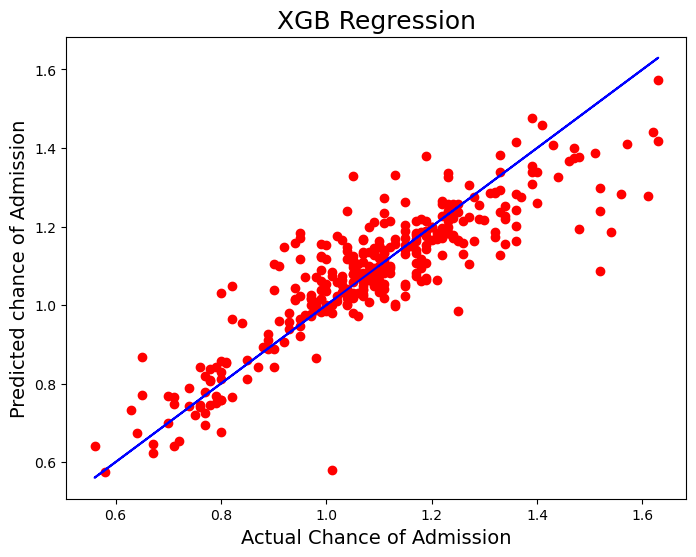

In [2393]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('XGB Regression', fontsize=18) 
#plt.savefig('xgb.png')
plt.show()

### Cross-validation for XGB

In [2394]:
from sklearn.model_selection import cross_val_score

In [2395]:
cv_score=cross_val_score (xgb, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2396]:
cv_score

array([0.67911332, 0.7915077 , 0.70944345, 0.75363832])

In [2397]:
cv_mean

0.7334257001287338

In [2398]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2399]:
cv_score

array([0.56435531, 0.62709763, 0.51178468, 0.60288568])

In [2400]:
cv_mean

0.5765308258955713

# 

### GradientBoostingRegressor

In [1232]:
from sklearn.ensemble import GradientBoostingRegressor

In [1233]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1,0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 4,
 'n_estimators': 190}

In [2541]:
gbt = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=7, min_samples_split=4)

In [2542]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=4, n_estimators=300)

In [2543]:
y_pred = gbt.predict(x_test)

In [2544]:
print('Accuracy Score:',gbt.score(x_train, y_train))

Accuracy Score: 0.9996289340615792


In [2545]:
r2_score(y_test, y_pred)

0.7885931985053262

In [2546]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.008342246451337224
RMSE 0.09133589902846101
MAE 0.06544881695280122


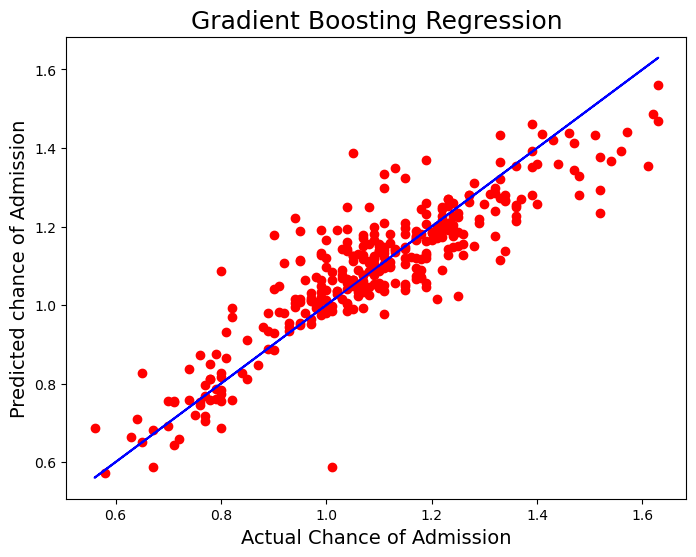

In [2547]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Gradient Boosting Regression', fontsize=18) 
#plt.savefig('gb.png')
plt.show()

### Cross-validation for GradientBoostingRegressor

In [2548]:
from sklearn.model_selection import cross_val_score

In [2549]:
cv_score=cross_val_score (gbt, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2550]:
cv_score

array([0.66250521, 0.77024487, 0.76208917, 0.7154633 ])

In [2551]:
cv_mean

0.7275756378080059

In [2552]:
cv_score=cross_val_score (gbt, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2553]:
cv_score

array([0.54437695, 0.60047138, 0.52914676, 0.5489336 ])

In [2554]:
cv_mean

0.5557321718674153

# 

### Lasso Regression

In [2555]:
from sklearn.linear_model import Lasso, LassoCV

In [2556]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [2557]:
alpha = lasscv.alpha_
alpha

3.1608026149168415e-05

In [2558]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=3.1608026149168415e-05)

In [2559]:
y_pred = reg_lasso.predict(x_test)

In [2560]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.3292396724969652


In [2561]:
r2_score(y_test, y_pred)

0.2860509697797503

In [2562]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.02817288148574815
RMSE 0.1678477926150599
MAE 0.1333547014704735


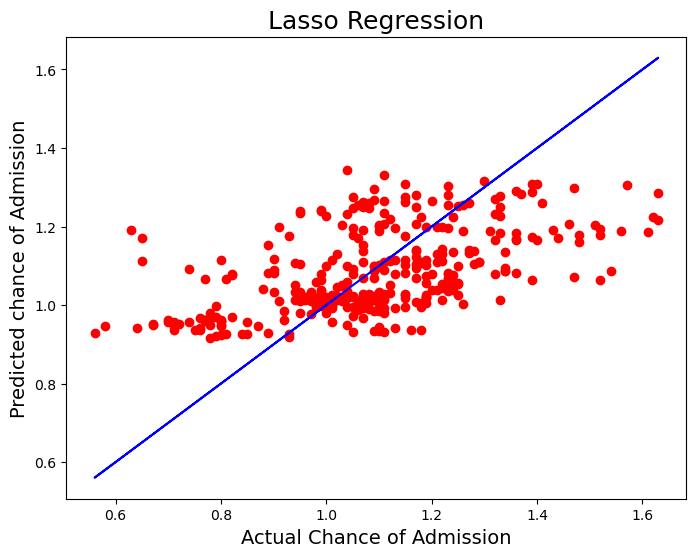

In [2563]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
#plt.savefig('ls.png')
plt.show()

### Cross-validation for Lasso Regression

In [2564]:
from sklearn.model_selection import cross_val_score

In [2565]:
cv_score=cross_val_score (reg_lasso, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2566]:
cv_score

array([0.30375563, 0.38185721, 0.27875783, 0.33790251])

In [2567]:
cv_mean

0.32556829473837484

In [2568]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2569]:
cv_score

array([0.25711343, 0.33259736, 0.17881979, 0.27967266])

In [2570]:
cv_mean

0.26205080801878766

# 

### Ridge Regression

In [2571]:
from sklearn.linear_model import Ridge, RidgeCV

In [2572]:
ridgecv = RidgeCV(alphas = np.arange(1,100,5), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        normalize=True)

In [2573]:
alpha = ridgecv.alpha_
alpha

1

In [2574]:
reg_rid = Ridge(alpha=ridgecv.alpha_)           # Passing Learning rate/speed to Ridge
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

In [2575]:
y_pred = reg_rid.predict(x_test)

In [2576]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.32923929366806304


In [2577]:
r2_score(y_test, y_pred)

0.2860170306399856

In [2578]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.028174220745725887
RMSE 0.16785178207491835
MAE 0.13335286289828172


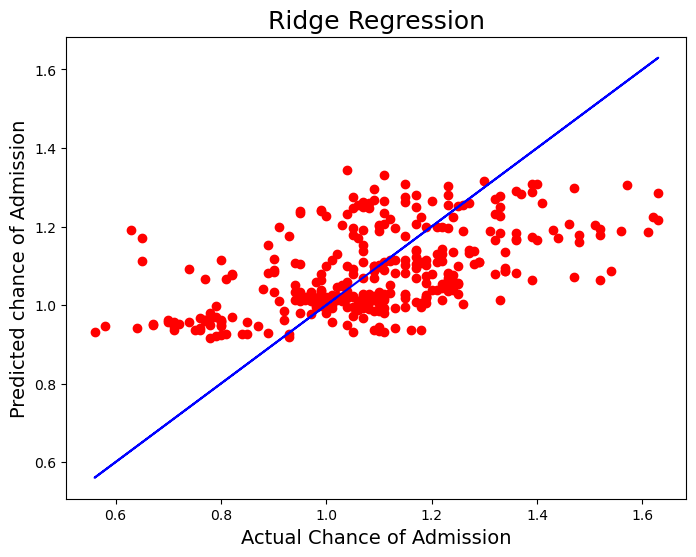

In [2579]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Ridge Regression', fontsize=18) 
#plt.savefig('rd.png')
plt.show()

### Cross-validation for Ridge Regression

In [2580]:
from sklearn.model_selection import cross_val_score

In [2581]:
cv_score=cross_val_score (reg_rid, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2582]:
cv_score

array([0.30372105, 0.38179654, 0.2788322 , 0.33787174])

In [2583]:
cv_mean

0.3255553839245581

In [2584]:
cv_score=cross_val_score (reg_rid, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2585]:
cv_score

array([0.2570012 , 0.33218531, 0.17931607, 0.28004043])

In [2586]:
cv_mean

0.2621357533677072

# 

## Best Model

### XGB

In [2388]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [2389]:
y_pred = xgb.predict(x_test)

In [2390]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.9995919690757364


In [2391]:
r2_score(y_test, y_pred)

0.7646243731187464

In [2392]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.009288071501005525
RMSE 0.09637464137938738
MAE 0.06739224626871149


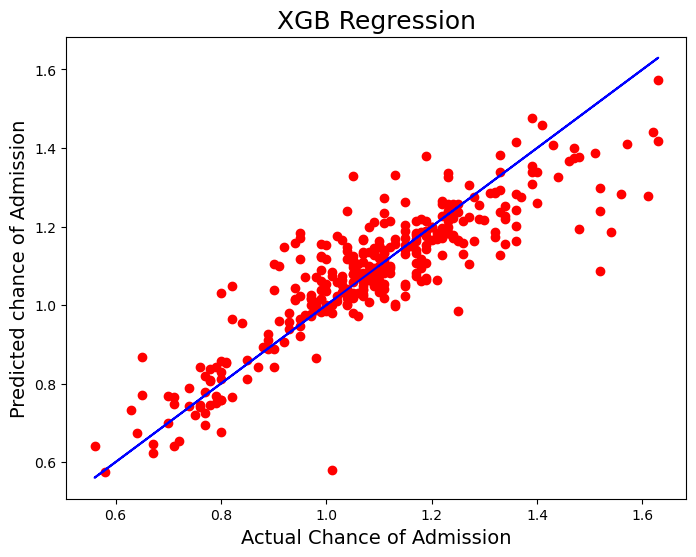

In [2393]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('XGB Regression', fontsize=18) 
#plt.savefig('xgb.png')
plt.show()

### Cross-validation for XGB

In [2394]:
from sklearn.model_selection import cross_val_score

In [2395]:
cv_score=cross_val_score (xgb, x_train, y_train, cv=4)
cv_mean=cv_score.mean()

In [2396]:
cv_score

array([0.67911332, 0.7915077 , 0.70944345, 0.75363832])

In [2397]:
cv_mean

0.7334257001287338

In [2398]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=4)
cv_mean=cv_score.mean()

In [2399]:
cv_score

array([0.56435531, 0.62709763, 0.51178468, 0.60288568])

In [2400]:
cv_mean

0.5765308258955713

#### Xgb Regression model has the higher R2 score. The difference between the Accuracy of Training data & R2 score is very less & the difference between the R2 score & Cross Validation mean score is the least of all models. Hence, Lasso Regression is the best model.

# 

## Saving the Best Model

In [2670]:
import pickle 

In [2671]:
with open('model_xgb', 'wb') as f: 
    pickle.dump(xgb, f)

# 

# 

# 

# 

# 

# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# 

### EDA

In [4]:
df.shape

(1470, 35)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Column: Attrition
Unique Values: ['Yes' 'No']


Column: BusinessTravel
Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Column: DailyRate
Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 13

#### Dropping columns that have only single values or irrelevent data

In [8]:
df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'], axis=1,inplace=True)

In [9]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# 

### Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
nominal=df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
            'MaritalStatus', 'OverTime']].copy()
nominal.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [16]:
df.Attrition = le.fit_transform(df.Attrition)
df.BusinessTravel = le.fit_transform(df.BusinessTravel)
df.Department = le.fit_transform(df.Department)
df.EducationField = le.fit_transform(df.EducationField)
df.Gender = le.fit_transform(df.Gender)
df.JobRole = le.fit_transform(df.JobRole)
df.MaritalStatus = le.fit_transform(df.MaritalStatus)
df.OverTime = le.fit_transform(df.OverTime)
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [17]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Column: Attrition
Unique Values: [1 0]


Column: BusinessTravel
Unique Values: [2 1 0]


Column: DailyRate
Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1

# 

### Choosing only best features

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [19]:
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [20]:
best_features = SelectKBest(score_func=f_classif, k=30)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(30, 'Score'))

                Feature_Name      Score
18                  OverTime  94.656457
23         TotalWorkingYears  44.252491
11                  JobLevel  43.215344
14             MaritalStatus  39.599763
27        YearsInCurrentRole  38.838303
15             MonthlyIncome  38.488819
0                        Age  38.175887
29      YearsWithCurrManager  36.712311
22          StockOptionLevel  28.140501
26            YearsAtCompany  27.001624
10            JobInvolvement  25.241985
13           JobSatisfaction  15.890004
7    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
12                   JobRole   6.649672
3                 Department   6.035877
25           WorkLifeBalance   6.026116
24     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
21  RelationshipSatisfaction   3.095576
17        NumCompaniesWorked   2.782287
28   YearsSinceLastPromotion   1.602218
5                  Education   1.446308
8                     Gender   1.274587


In [21]:
df.drop(['BusinessTravel','PerformanceRating','HourlyRate','PercentSalaryHike','MonthlyRate','EducationField','Gender','Education','YearsSinceLastPromotion','NumCompaniesWorked','RelationshipSatisfaction','DailyRate','TrainingTimesLastYear'], axis=1,inplace=True)

In [22]:
df.head()

Age  Attrition  Department  DistanceFromHome  EnvironmentSatisfaction  \
0   41          1           2                 1                        2   
1   49          0           1                 8                        3   
2   37          1           1                 2                        4   
3   33          0           1                 3                        4   
4   27          0           1                 2                        1   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  OverTime  StockOptionLevel  TotalWorkingYears  \
0           5993         1                 0                  8   
1           5130         0                 1                 10   
2           2090         1                 0                  7   
3           2909         1                 0                  8   
4           3468         0                 1                  6   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsWithCurrManager  
0                1               6                   4                     5  
1                3              10                   7                     7  
2                3               0                   0                     0  
3                3               8                   7                     0  
4                3               2                   2                     2

In [23]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

# 

### Removing Multi-colinearity

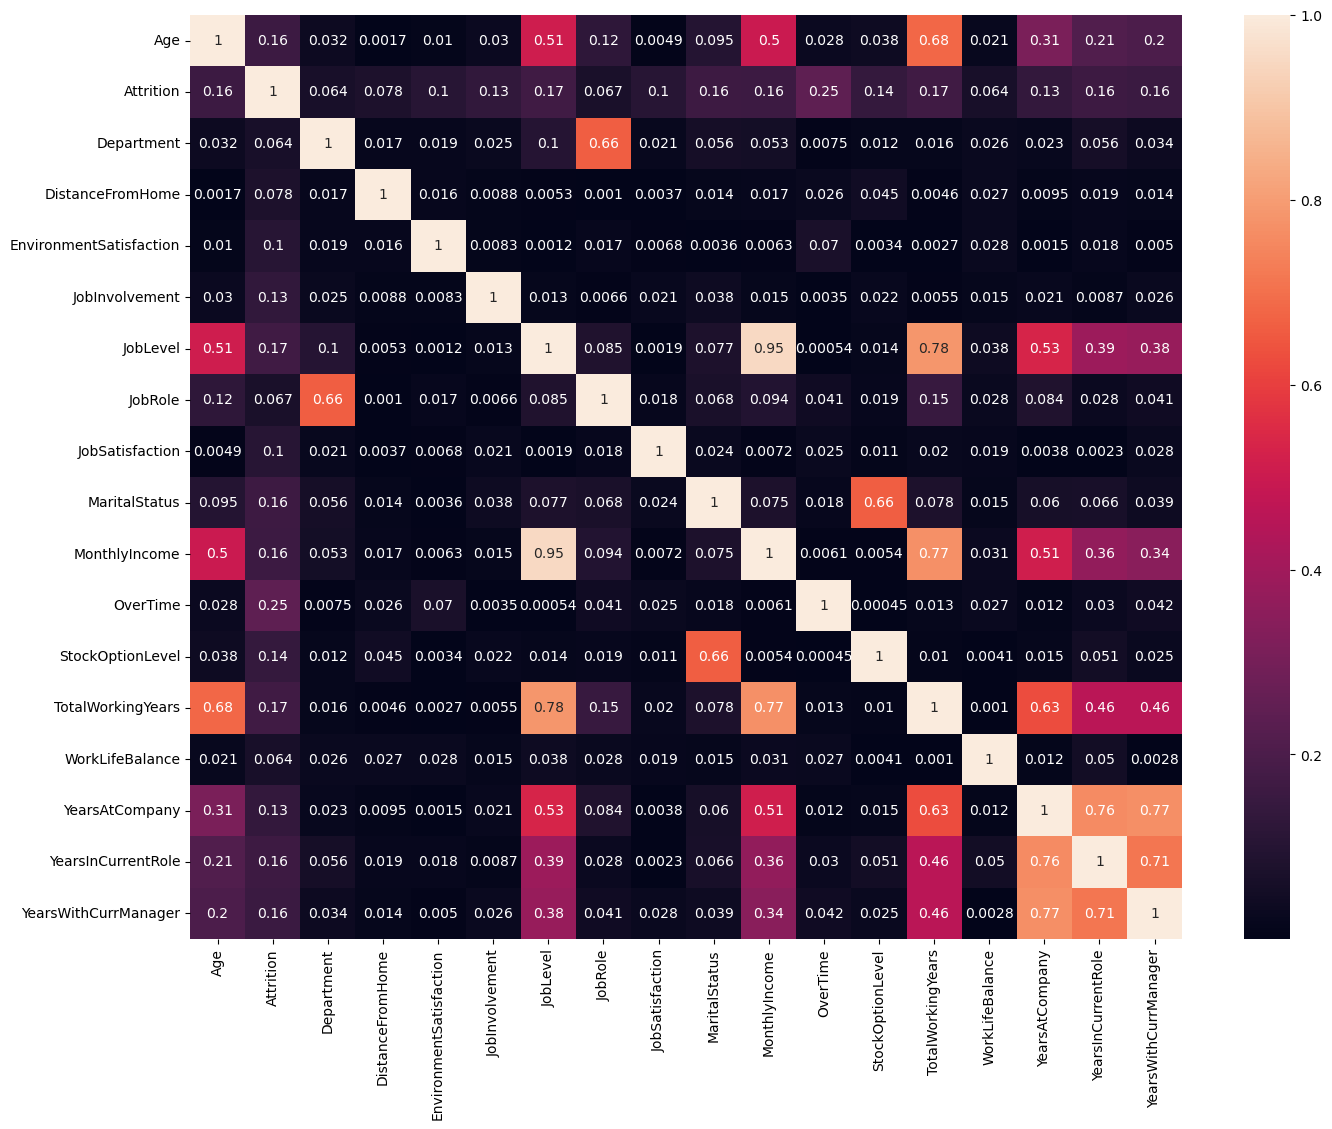

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

In [25]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [26]:
df.drop(['MonthlyIncome','TotalWorkingYears','YearsAtCompany', 'YearsWithCurrManager', 'Department'], axis=1,inplace=True)

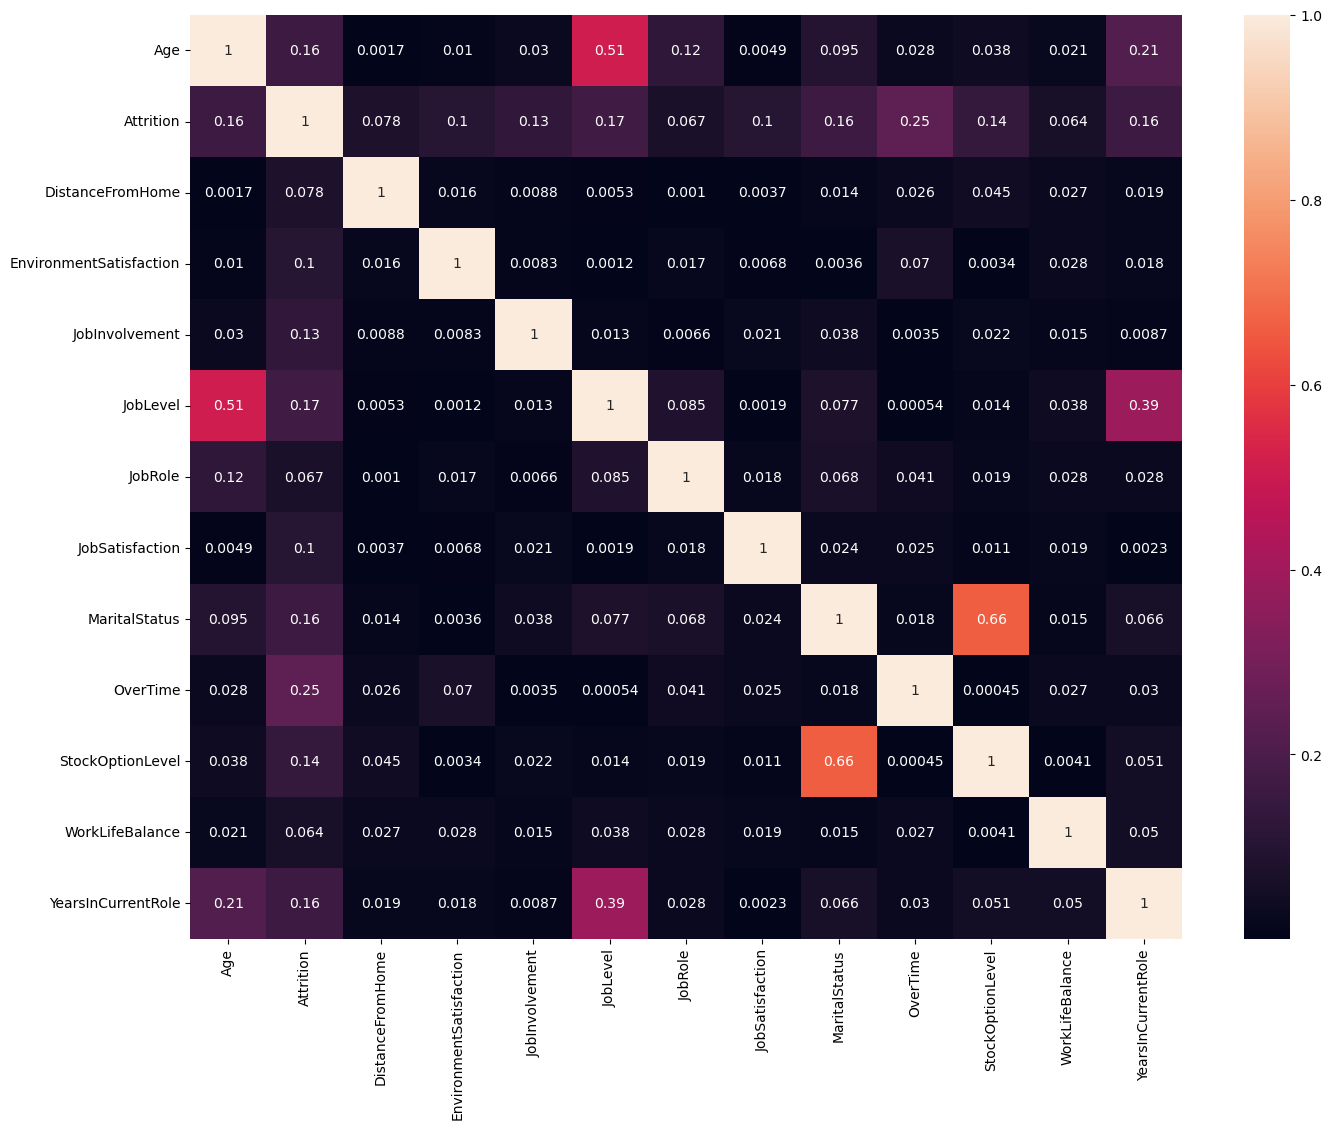

In [27]:
df_corr = df.corr().abs ()

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

In [28]:
df.shape

(1470, 13)

# 

### Removing Outliners

In [29]:
df.describe()

Age    Attrition  DistanceFromHome  EnvironmentSatisfaction  \
count  1470.000000  1470.000000       1470.000000              1470.000000   
mean     36.923810     0.161224          9.192517                 2.721769   
std       9.135373     0.367863          8.106864                 1.093082   
min      18.000000     0.000000          1.000000                 1.000000   
25%      30.000000     0.000000          2.000000                 2.000000   
50%      36.000000     0.000000          7.000000                 3.000000   
75%      43.000000     0.000000         14.000000                 4.000000   
max      60.000000     1.000000         29.000000                 4.000000   

       JobInvolvement     JobLevel      JobRole  JobSatisfaction  \
count     1470.000000  1470.000000  1470.000000      1470.000000   
mean         2.729932     2.063946     4.458503         2.728571   
std          0.711561     1.106940     2.461821         1.102846   
min          1.000000     1.000000     0.000000         1.000000   
25%          2.000000     1.000000     2.000000         2.000000   
50%          3.000000     2.000000     5.000000         3.000000   
75%          3.000000     3.000000     7.000000         4.000000   
max          4.000000     5.000000     8.000000         4.000000   

       MaritalStatus     OverTime  StockOptionLevel  WorkLifeBalance  \
count    1470.000000  1470.000000       1470.000000      1470.000000   
mean        1.097279     0.282993          0.793878         2.761224   
std         0.730121     0.450606          0.852077         0.706476   
min         0.000000     0.000000          0.000000         1.000000   
25%         1.000000     0.000000          0.000000         2.000000   
50%         1.000000     0.000000          1.000000         3.000000   
75%         2.000000     1.000000          1.000000         3.000000   
max         2.000000     1.000000          3.000000         4.000000   

       YearsInCurrentRole  
count         1470.000000  
mean             4.229252  
std              3.623137  
min              0.000000  
25%              2.000000  
50%              3.000000  
75%              7.000000  
max             18.000000

In [30]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsInCurrentRole'],
      dtype='object')

In [31]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Column: Attrition
Unique Values: [1 0]


Column: DistanceFromHome
Unique Values: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]


Column: EnvironmentSatisfaction
Unique Values: [2 3 4 1]


Column: JobInvolvement
Unique Values: [3 2 4 1]


Column: JobLevel
Unique Values: [2 1 3 4 5]


Column: JobRole
Unique Values: [7 6 2 4 0 3 8 5 1]


Column: JobSatisfaction
Unique Values: [4 2 3 1]


Column: MaritalStatus
Unique Values: [2 1 0]


Column: OverTime
Unique Values: [1 0]


Column: StockOptionLevel
Unique Values: [0 1 3 2]


Column: WorkLifeBalance
Unique Values: [1 3 2 4]


Column: YearsInCurrentRole
Unique Values: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]




In [32]:
df_con=df[['Age', 'DistanceFromHome','YearsInCurrentRole']].copy()

In [33]:
df_con.columns

Index(['Age', 'DistanceFromHome', 'YearsInCurrentRole'], dtype='object')

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

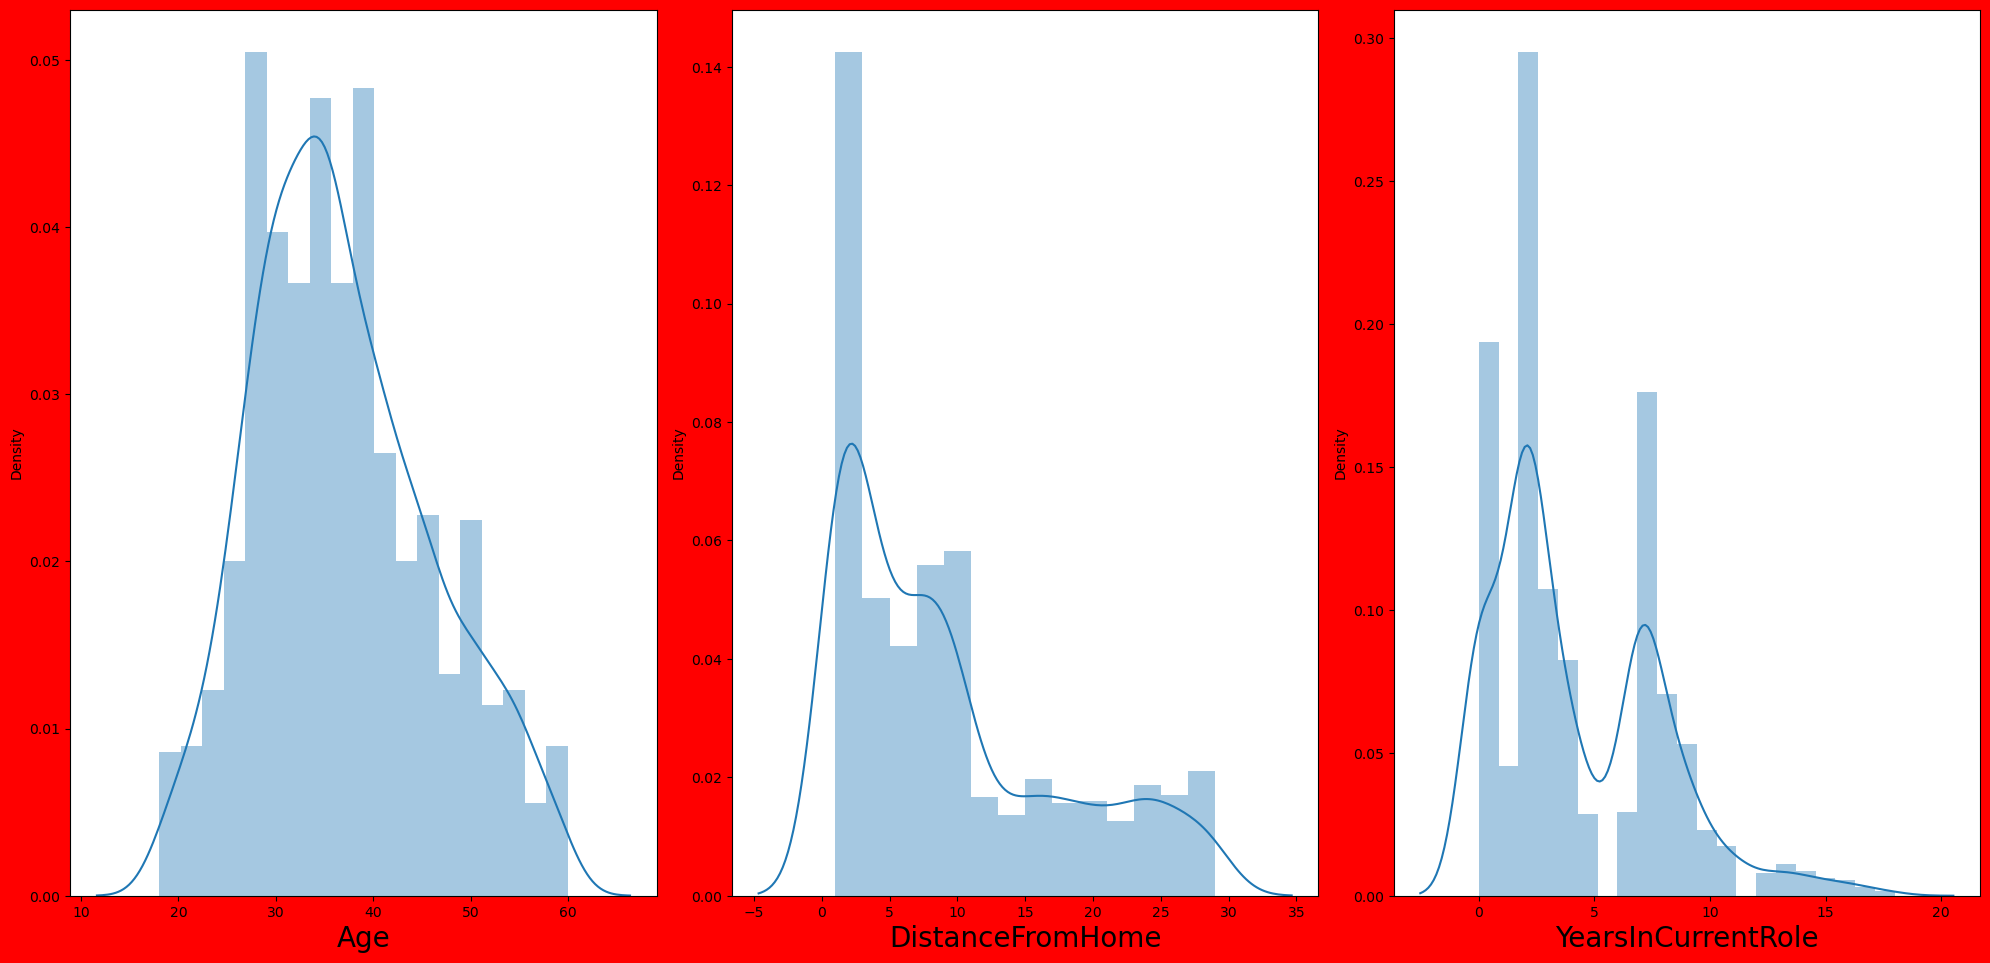

In [35]:
plt.figure(figsize=(20,105), facecolor='red')
plotnumber = 1

for column in df_con:                       
    if plotnumber<=32:                    
        ax = plt.subplot(11,3,plotnumber)    
        sns.distplot(df_con[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [36]:
df_con.columns

Index(['Age', 'DistanceFromHome', 'YearsInCurrentRole'], dtype='object')

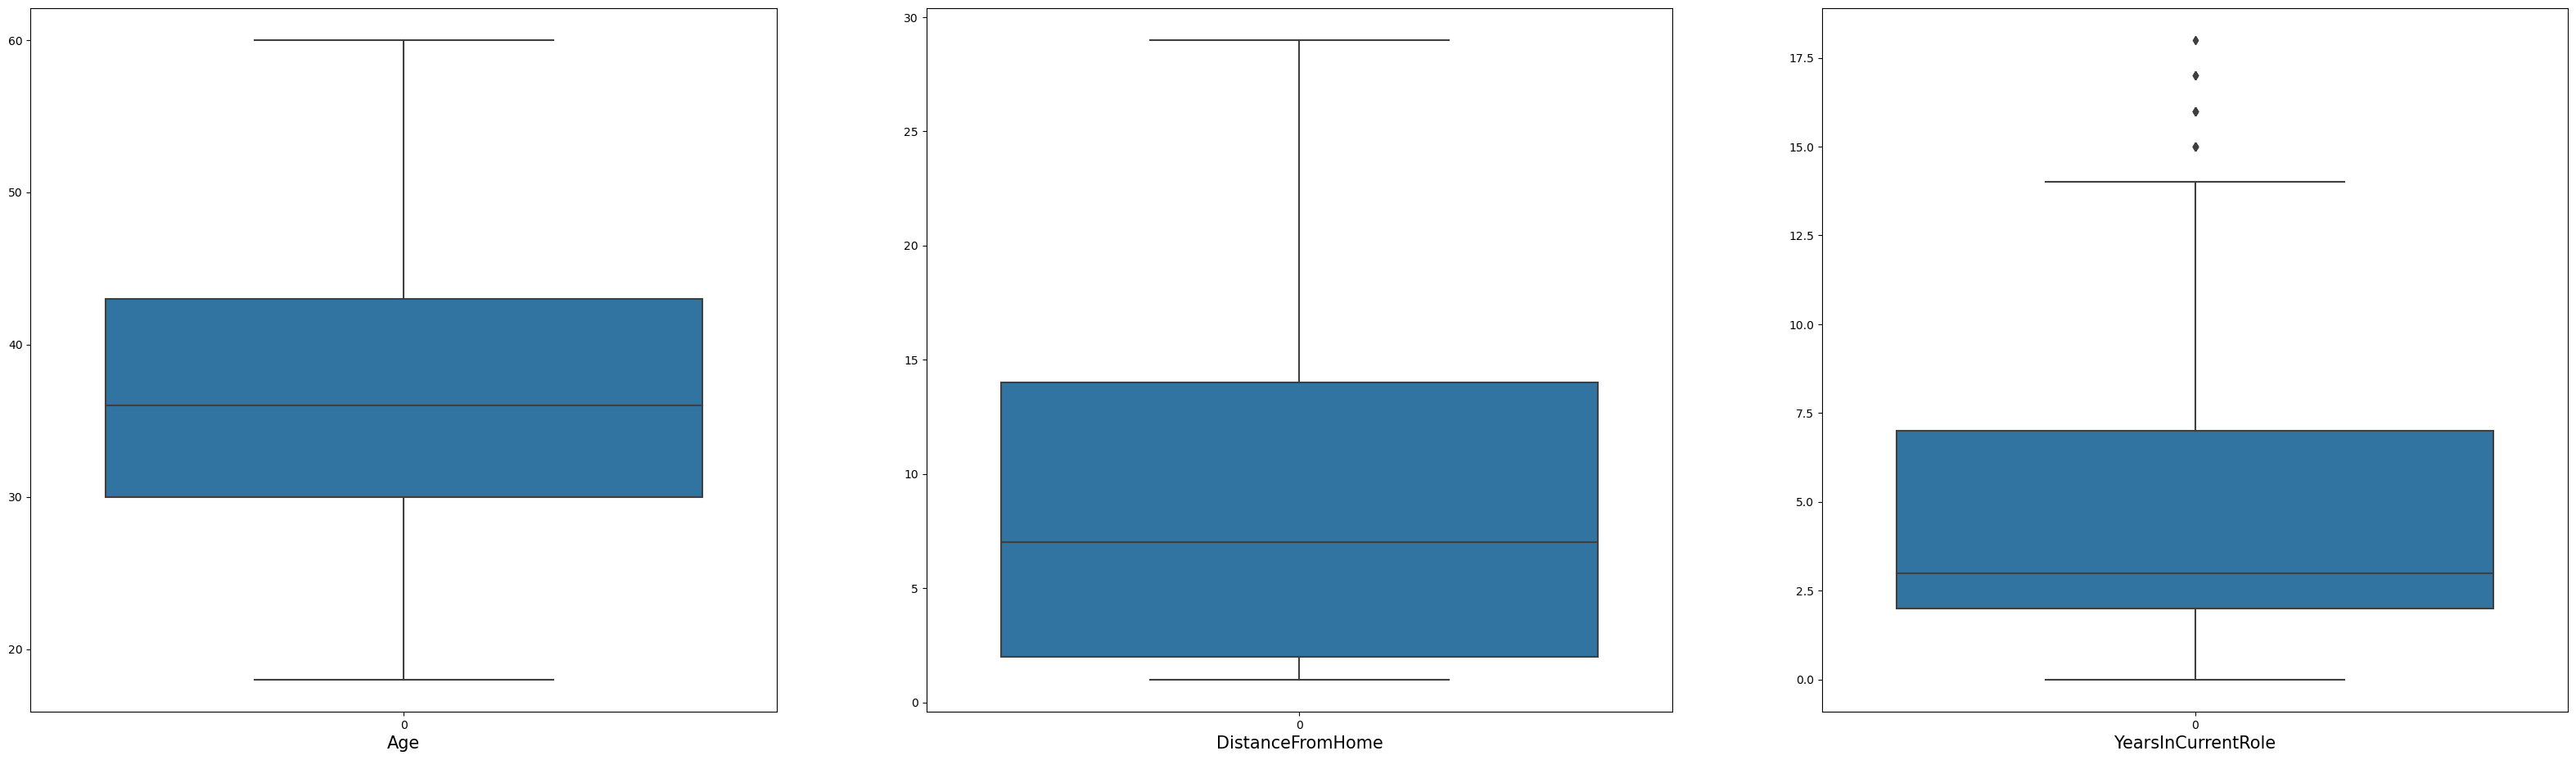

In [37]:
plt.figure(figsize=(40,145))
graph = 1

for column in df_con: 
    if graph<=32:
        plt.subplot(11,3, graph)
        ax=sns.boxplot(data= df_con[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [38]:
from scipy.stats import zscore 

z_score = zscore (df[['YearsInCurrentRole']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.9).all(axis=1)
df = df[filtering_entry]

df.describe()

Age    Attrition  DistanceFromHome  EnvironmentSatisfaction  \
count  1449.000000  1449.000000       1449.000000              1449.000000   
mean     36.793651     0.162181          9.200828                 2.728088   
std       9.100699     0.368744          8.110790                 1.092689   
min      18.000000     0.000000          1.000000                 1.000000   
25%      30.000000     0.000000          2.000000                 2.000000   
50%      35.000000     0.000000          7.000000                 3.000000   
75%      43.000000     0.000000         14.000000                 4.000000   
max      60.000000     1.000000         29.000000                 4.000000   

       JobInvolvement     JobLevel      JobRole  JobSatisfaction  \
count     1449.000000  1449.000000  1449.000000      1449.000000   
mean         2.728778     2.035197     4.458937         2.732229   
std          0.710230     1.081999     2.471636         1.104394   
min          1.000000     1.000000     0.000000         1.000000   
25%          2.000000     1.000000     2.000000         2.000000   
50%          3.000000     2.000000     5.000000         3.000000   
75%          3.000000     3.000000     7.000000         4.000000   
max          4.000000     5.000000     8.000000         4.000000   

       MaritalStatus     OverTime  StockOptionLevel  WorkLifeBalance  \
count    1449.000000  1449.000000       1449.000000      1449.000000   
mean        1.098689     0.285714          0.795721         2.757764   
std         0.731535     0.451910          0.853791         0.709045   
min         0.000000     0.000000          0.000000         1.000000   
25%         1.000000     0.000000          0.000000         2.000000   
50%         1.000000     0.000000          1.000000         3.000000   
75%         2.000000     1.000000          1.000000         3.000000   
max         2.000000     1.000000          3.000000         4.000000   

       YearsInCurrentRole  
count         1449.000000  
mean             4.058661  
std              3.356368  
min              0.000000  
25%              2.000000  
50%              3.000000  
75%              7.000000  
max             14.000000

In [39]:
df.shape

(1449, 13)

In [40]:
df_con=df[['Age', 'DistanceFromHome','YearsInCurrentRole']].copy()

In [41]:
df_con.columns

Index(['Age', 'DistanceFromHome', 'YearsInCurrentRole'], dtype='object')

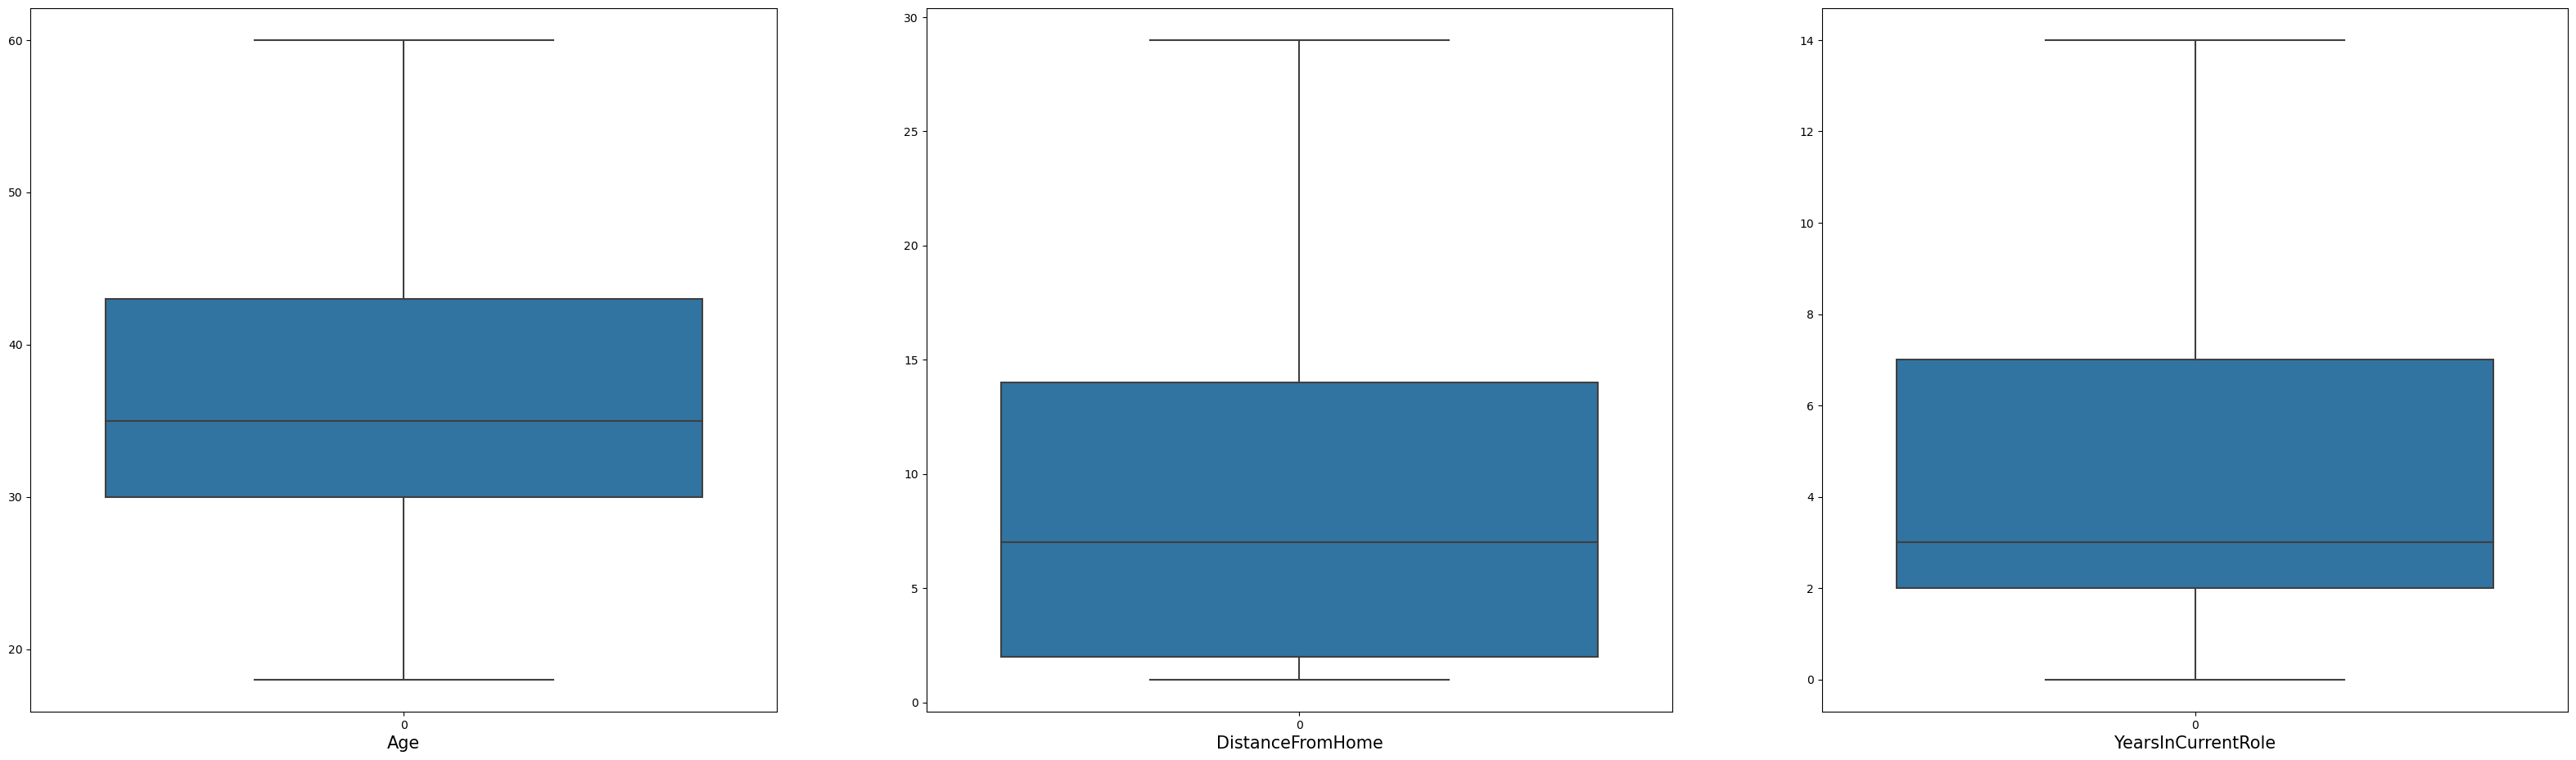

In [42]:
plt.figure(figsize=(40,145))
graph = 1

for column in df_con: 
    if graph<=32:
        plt.subplot(11,3, graph)
        ax=sns.boxplot(data= df_con[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

# 

### Removing Skewness

In [43]:
df_con=df[['Age', 'DistanceFromHome','YearsInCurrentRole']].copy()

In [44]:
df_con.columns

Index(['Age', 'DistanceFromHome', 'YearsInCurrentRole'], dtype='object')

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

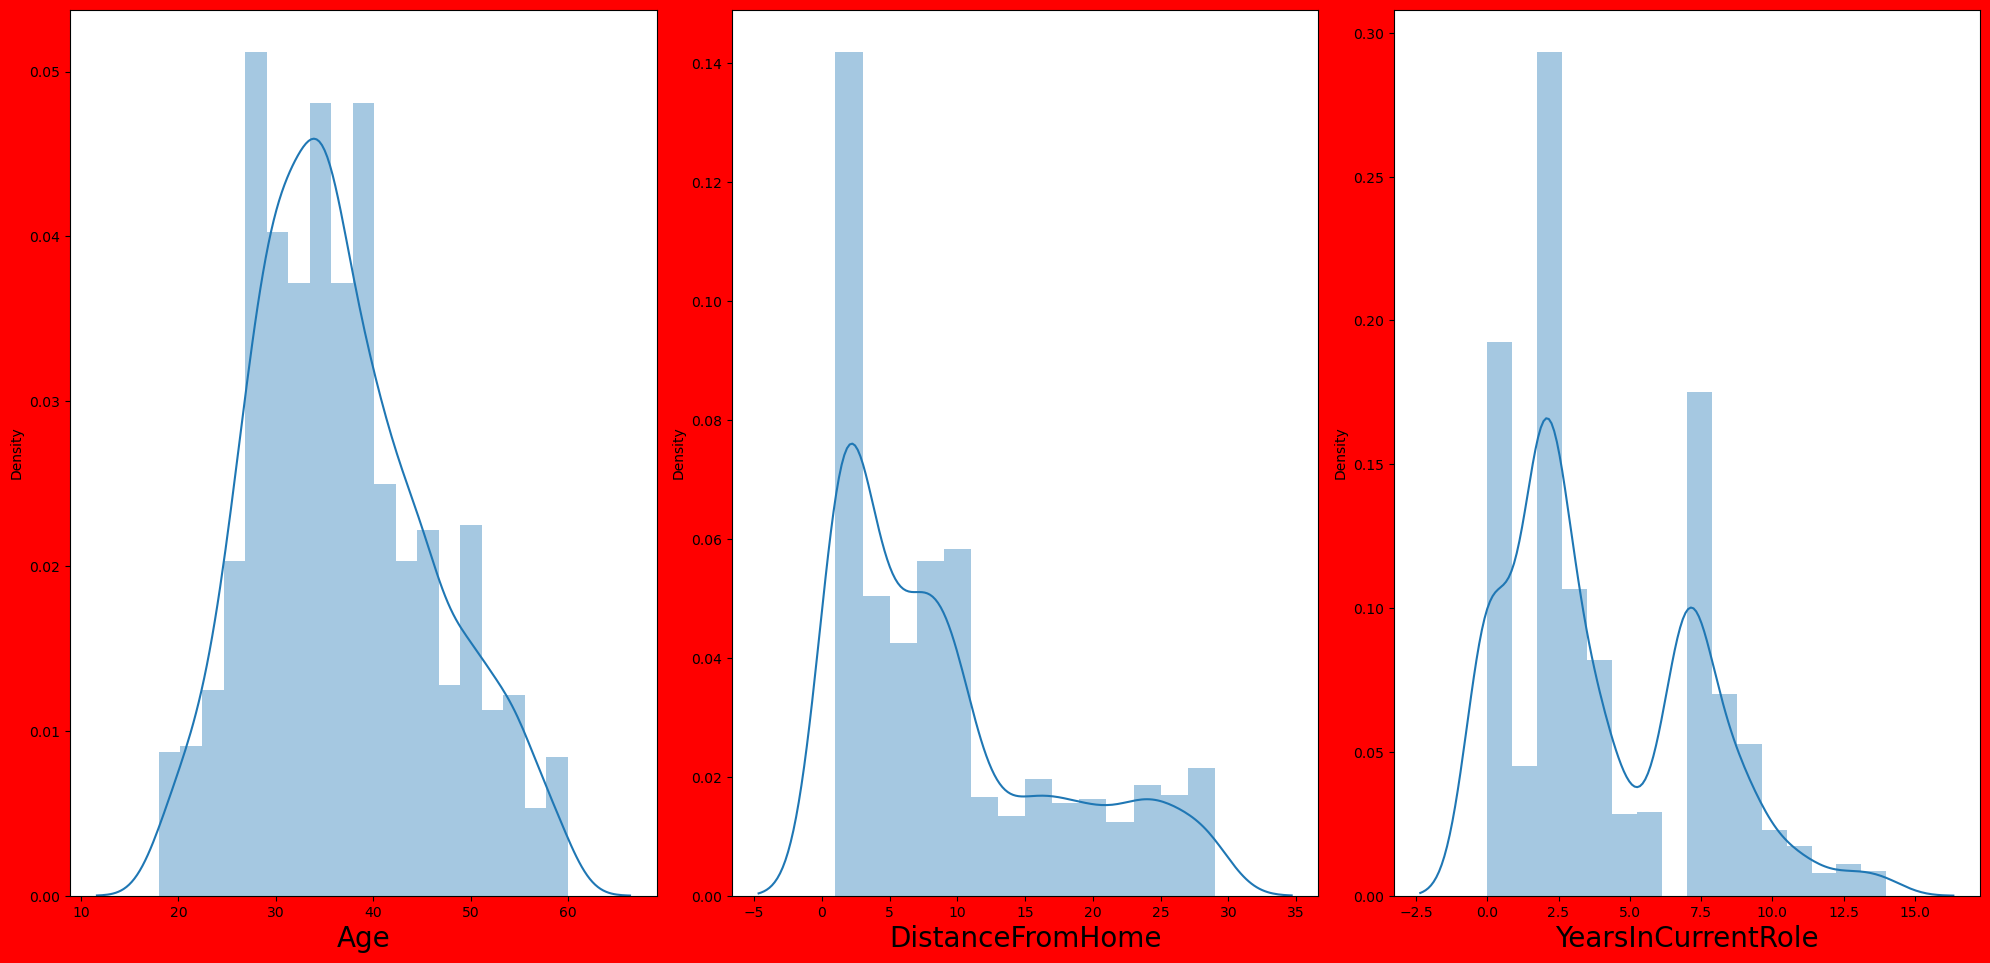

In [46]:
plt.figure(figsize=(20,105), facecolor='red')
plotnumber = 1

for column in df_con:                       
    if plotnumber<=32:                    
        ax = plt.subplot(11,3,plotnumber)    
        sns.distplot(df_con[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [47]:
df.skew()

Age                        0.426538
Attrition                  1.834803
DistanceFromHome           0.960071
EnvironmentSatisfaction   -0.330013
JobInvolvement            -0.493746
JobLevel                   1.043819
JobRole                   -0.356246
JobSatisfaction           -0.331374
MaritalStatus             -0.155122
OverTime                   0.949667
StockOptionLevel           0.970288
WorkLifeBalance           -0.545884
YearsInCurrentRole         0.683988
dtype: float64

In [48]:
df['DistanceFromHome'] = np.log1p(df['DistanceFromHome'])
df['JobLevel'] = np.log1p(df['JobLevel'])
df['OverTime'] = np.log1p(df['OverTime'])
df['StockOptionLevel'] = np.log1p(df['StockOptionLevel'])
df['YearsInCurrentRole'] = np.log1p(df['YearsInCurrentRole'])

In [49]:
df.skew()

Age                        0.426538
Attrition                  1.834803
DistanceFromHome          -0.030849
EnvironmentSatisfaction   -0.330013
JobInvolvement            -0.493746
JobLevel                   0.457281
JobRole                   -0.356246
JobSatisfaction           -0.331374
MaritalStatus             -0.155122
OverTime                   0.949667
StockOptionLevel           0.271903
WorkLifeBalance           -0.545884
YearsInCurrentRole        -0.423430
dtype: float64

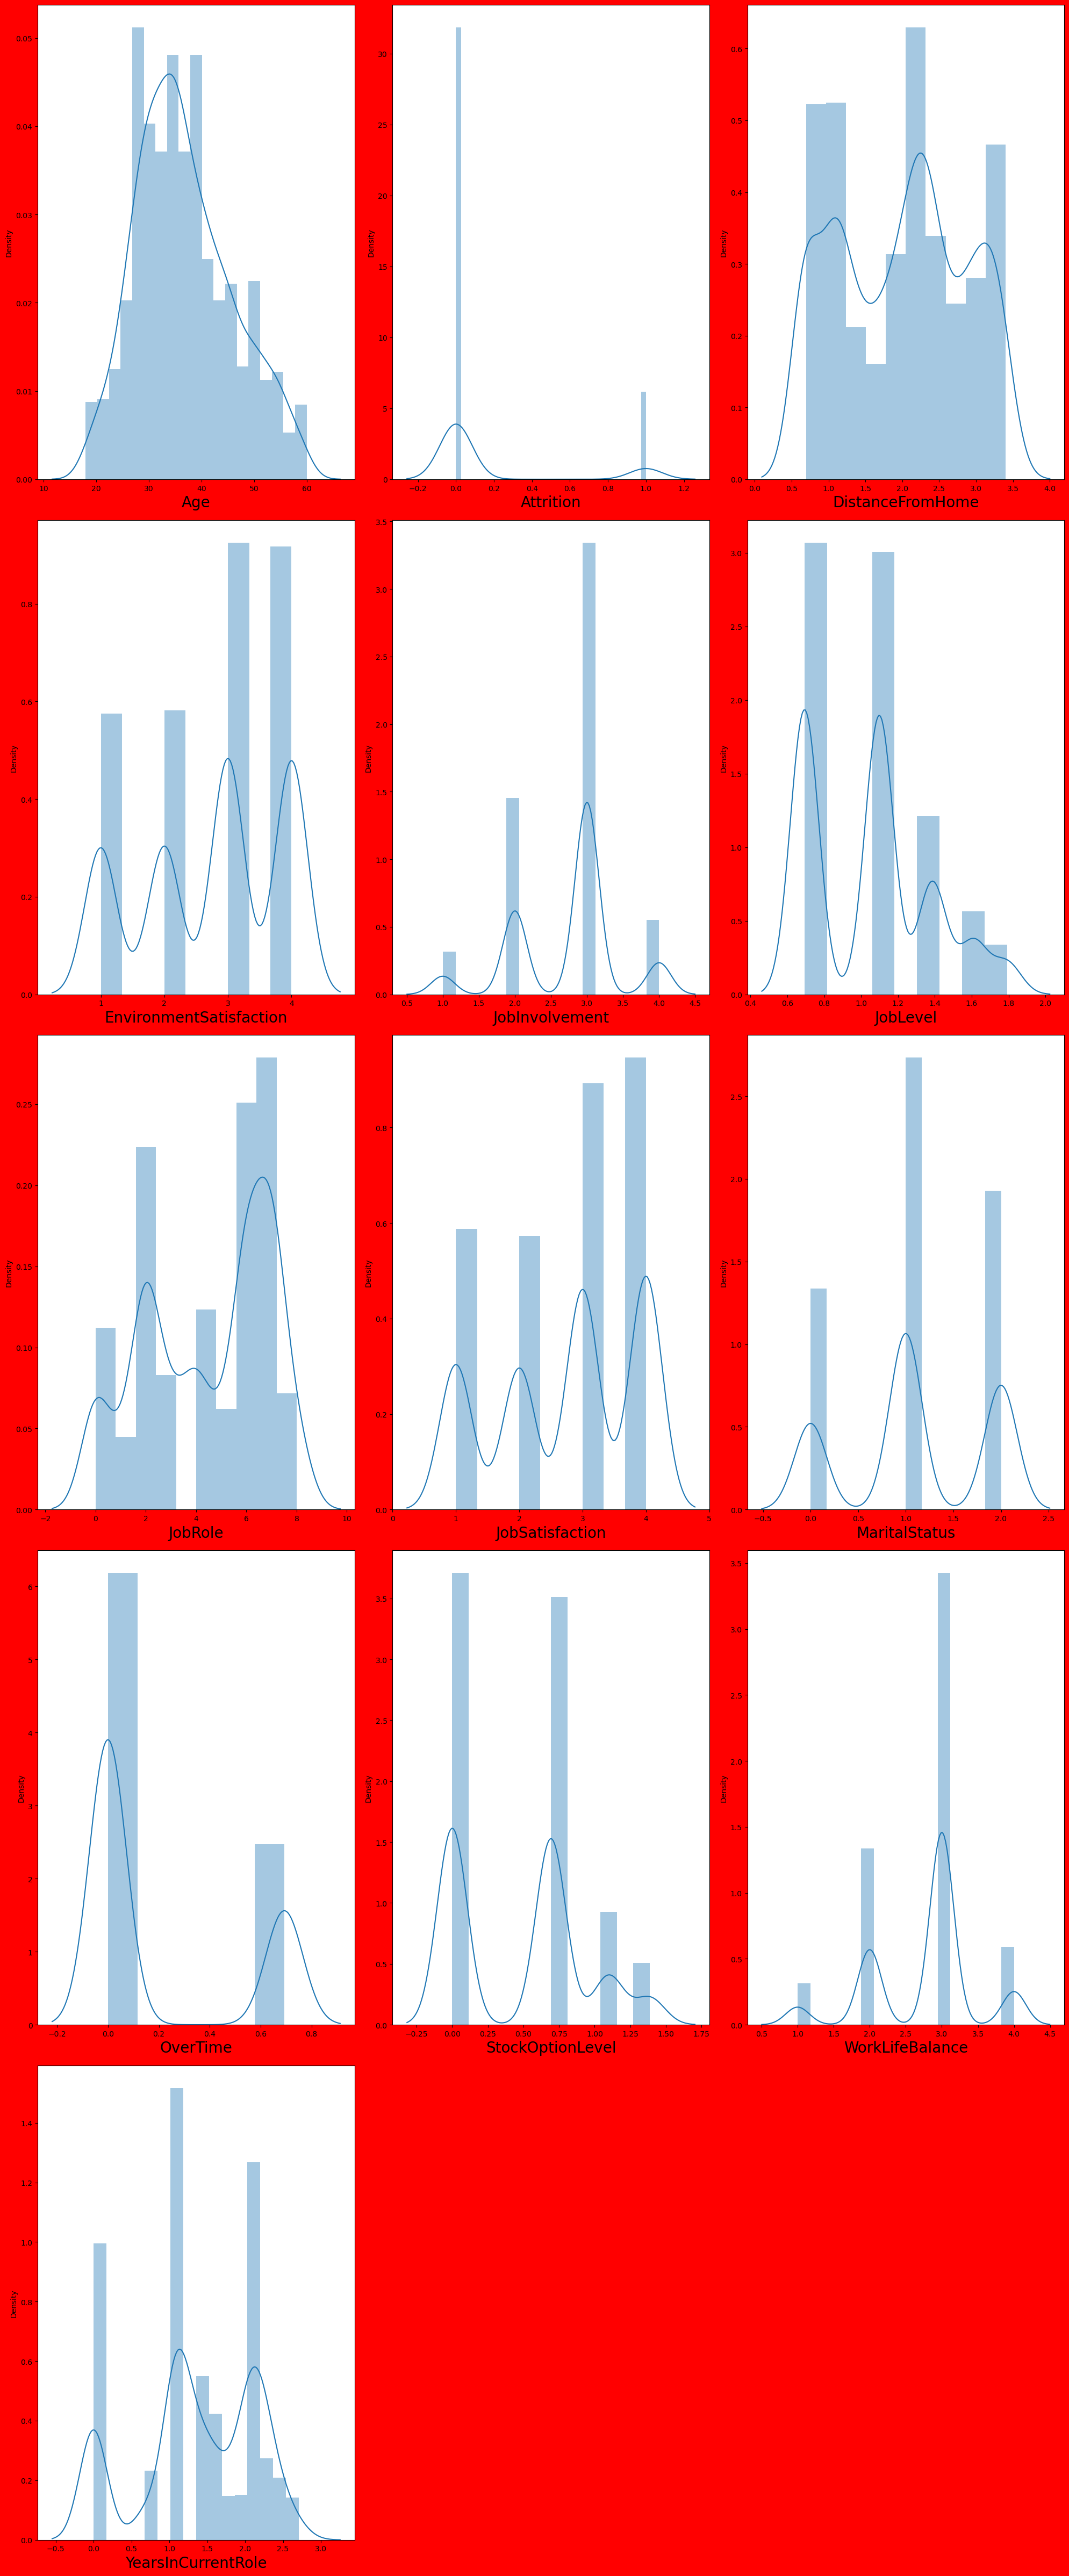

In [50]:
plt.figure(figsize=(20,105), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=32:                    
        ax = plt.subplot(11,3,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Oversampling

In [51]:
value_counts = df['Attrition'].value_counts()
print(value_counts)

0    1214
1     235
Name: Attrition, dtype: int64


In [52]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
upsample = SMOTE()

In [55]:
x, y = upsample.fit_resample(x,y)

In [56]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 1214, 0: 1214})


# 

### Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [63]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [64]:
cls_reg.coef_

array([[-0.16585451,  0.25399297, -0.67494098, -0.71835319, -0.51200028,
         0.06252171, -0.6137703 , -0.22684472,  0.90916046, -0.65711679,
        -0.49201024, -0.3639732 ]])

In [65]:
cls_reg.intercept_

array([8.11664519e-05])

In [66]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8226249313563976


In [67]:
y_pred = cls_reg.predict(x_test)

In [68]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8138385502471169


In [69]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[251,  60],
       [ 53, 243]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       311
           1       0.80      0.82      0.81       296

    accuracy                           0.81       607
   macro avg       0.81      0.81      0.81       607
weighted avg       0.81      0.81      0.81       607



### Cross-validation

In [71]:
from sklearn.model_selection import KFold, cross_val_score

In [72]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.78630137, 0.82692308, 0.81868132, 0.8021978 , 0.83791209])

In [73]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.8144031311154597

In [74]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.74590164, 0.81967213, 0.78512397, 0.83471074, 0.79338843])

In [75]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.7957593821975343

### ROC Curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [77]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82094595 1.        ]
False Positive rate =  [0.         0.19292605 1.        ]


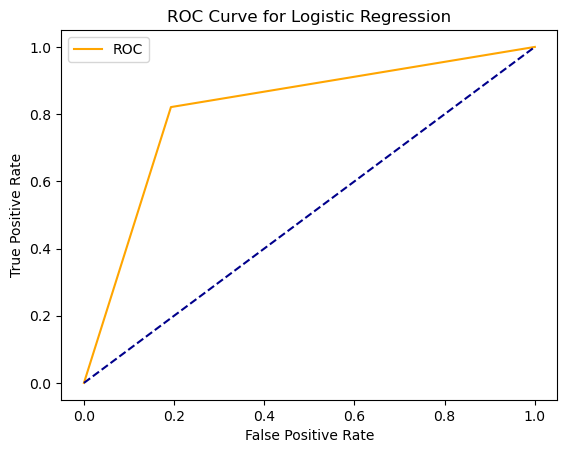

In [78]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to Logistic Regression

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
bag0 = BaggingClassifier(LogisticRegression())

In [81]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [82]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.8193300384404174


In [86]:
y_pred = bag0.predict(x_test)

In [87]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8088962108731467


In [88]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[248,  63],
       [ 53, 243]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       311
           1       0.79      0.82      0.81       296

    accuracy                           0.81       607
   macro avg       0.81      0.81      0.81       607
weighted avg       0.81      0.81      0.81       607



### Cross-validation

In [299]:
from sklearn.model_selection import KFold, cross_val_score

In [300]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.78630137, 0.83241758, 0.81318681, 0.79945055, 0.84340659])

In [301]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8144016257714887

In [302]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.74590164, 0.81967213, 0.78512397, 0.83471074, 0.79338843])

In [303]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8155005268703898

### ROC Curve

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [96]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.82094595 1.        ]
False Positive rate =  [0.         0.20257235 1.        ]


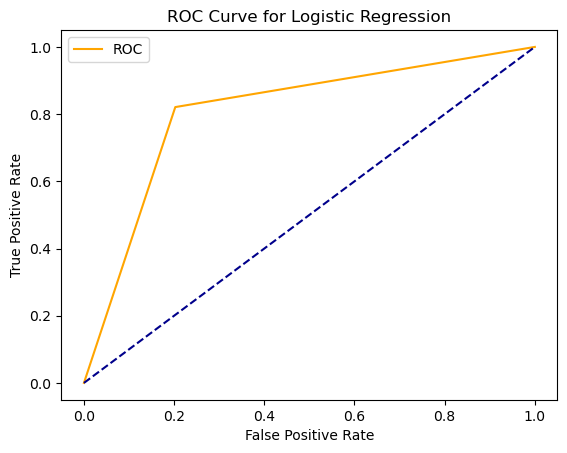

In [97]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [99]:
cls_dt = DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=16)

In [100]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16, min_samples_split=3)

In [101]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.9923119165293794


In [102]:
y_pred = cls_dt.predict(x_test)

In [103]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8797364085667215


In [104]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[267,  44],
       [ 29, 267]], dtype=int64)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       311
           1       0.86      0.90      0.88       296

    accuracy                           0.88       607
   macro avg       0.88      0.88      0.88       607
weighted avg       0.88      0.88      0.88       607



### Cross-validation

In [106]:
from sklearn.model_selection import KFold, cross_val_score

In [107]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.89589041, 0.88736264, 0.86263736, 0.86538462, 0.88736264])

In [108]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.8731431582116513

In [117]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.73770492, 0.80327869, 0.85123967, 0.73553719, 0.76033058])

In [118]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.7858555751253218

### ROC Curve

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [120]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.90202703 1.        ]
False Positive rate =  [0.        0.1414791 1.       ]


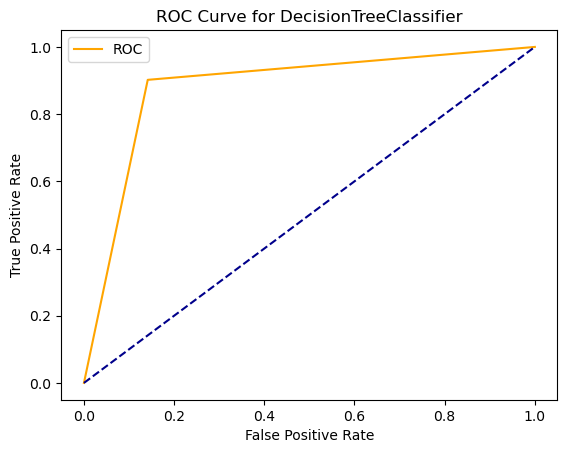

In [121]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [122]:
from sklearn.ensemble import BaggingClassifier

In [123]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=16))

In [124]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=16,
                                                        min_samples_split=3))

In [125]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.9901153212520593


In [126]:
y_pred = bag1.predict(x_test)

In [127]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9044481054365733


In [128]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[284,  27],
       [ 31, 265]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       311
           1       0.91      0.90      0.90       296

    accuracy                           0.90       607
   macro avg       0.90      0.90      0.90       607
weighted avg       0.90      0.90      0.90       607



### Cross-validation

In [130]:
from sklearn.model_selection import KFold, cross_val_score

In [131]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.91780822, 0.89285714, 0.87912088, 0.89835165, 0.92032967])

In [132]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.9027969290982989

In [133]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.77868852, 0.89344262, 0.85123967, 0.81818182, 0.83471074])

In [134]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.9027909077224147

### ROC Curve

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [136]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89527027 1.        ]
False Positive rate =  [0.         0.08681672 1.        ]


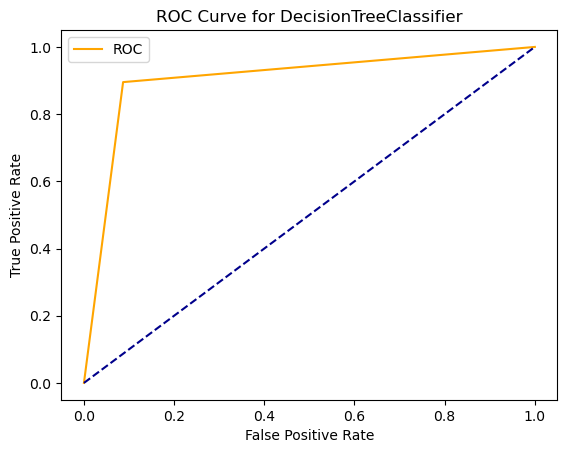

In [137]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier')
plt.legend()
plt.show()

# 

# 

### Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [139]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16)

In [140]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=450)

In [304]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9989017023613399


In [305]:
y_pred = cls_rf.predict(x_test)

In [306]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9110378912685337


In [143]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[287,  24],
       [ 30, 266]], dtype=int64)

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       311
           1       0.92      0.90      0.91       296

    accuracy                           0.91       607
   macro avg       0.91      0.91      0.91       607
weighted avg       0.91      0.91      0.91       607



### Cross-validation

In [145]:
from sklearn.model_selection import KFold, cross_val_score

In [146]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.9260274 , 0.92032967, 0.89835165, 0.93406593, 0.94230769])

In [147]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.9247659190124944

In [148]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.8442623 , 0.89344262, 0.88429752, 0.80991736, 0.87603306])

In [149]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.861631215282482

### ROC Curve

In [150]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [151]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89864865 1.        ]
False Positive rate =  [0.         0.07717042 1.        ]


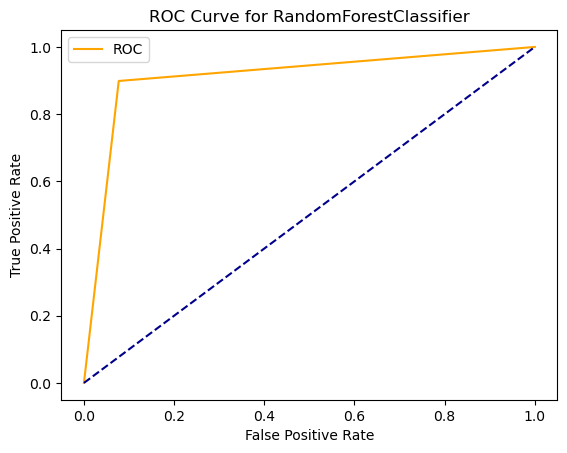

In [152]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

# 

### Applying BaggingClassifier to RandomForestClassifier

In [153]:
from sklearn.ensemble import BaggingClassifier

In [154]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16))

In [155]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=450))

In [156]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9780340472267984


In [157]:
y_pred = bag2.predict(x_test)

In [158]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.899505766062603


In [159]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[283,  28],
       [ 33, 263]], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       311
           1       0.90      0.89      0.90       296

    accuracy                           0.90       607
   macro avg       0.90      0.90      0.90       607
weighted avg       0.90      0.90      0.90       607



### Cross-validation

In [161]:
from sklearn.model_selection import KFold, cross_val_score

In [162]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.90684932, 0.91483516, 0.88461538, 0.92582418, 0.93406593])

In [163]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.918177028451001

In [164]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.81967213, 0.86885246, 0.88429752, 0.80991736, 0.85123967])

In [165]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.913784434743339

### ROC Curve

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [167]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.88851351 1.        ]
False Positive rate =  [0.         0.09003215 1.        ]


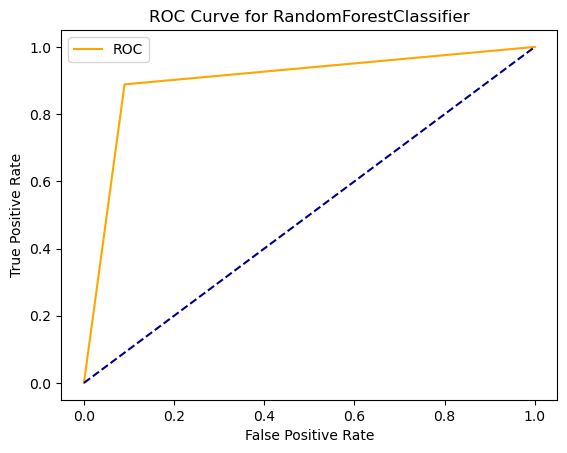

In [168]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [381]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [312]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [313]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [314]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


In [315]:
y_pred = cls_KN.predict(x_test)

In [316]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8912685337726524


In [317]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[257,  54],
       [ 12, 284]], dtype=int64)

In [318]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       311
           1       0.84      0.96      0.90       296

    accuracy                           0.89       607
   macro avg       0.90      0.89      0.89       607
weighted avg       0.90      0.89      0.89       607



### Cross-validation

In [319]:
from sklearn.model_selection import KFold, cross_val_score

In [320]:
cross_val_score (cls_KN, x_train, y_train, cv=5)

array([0.90958904, 0.91758242, 0.89835165, 0.89835165, 0.88186813])

In [321]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.9011485774499473

In [322]:
cross_val_score (cls_KN, x_test, y_test, cv=5)

array([0.78688525, 0.81967213, 0.80165289, 0.80991736, 0.7768595 ])

In [323]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.7989974258230592

### ROC Curve

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [183]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95945946 1.        ]
False Positive rate =  [0.         0.17363344 1.        ]


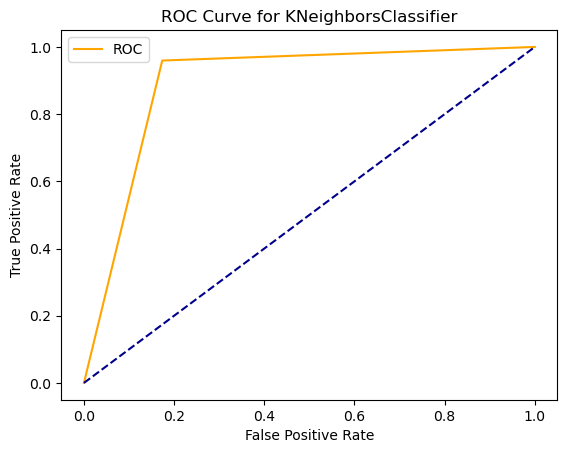

In [184]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [185]:
from sklearn.ensemble import BaggingClassifier

In [186]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance'))

In [187]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=25,
                                                      n_neighbors=3, p=1,
                                                      weights='distance'))

In [188]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.9967051070840197


In [189]:
y_pred = bag3.predict(x_test)

In [190]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8912685337726524


In [191]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[257,  54],
       [ 12, 284]], dtype=int64)

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       311
           1       0.84      0.96      0.90       296

    accuracy                           0.89       607
   macro avg       0.90      0.89      0.89       607
weighted avg       0.90      0.89      0.89       607



### Cross-validation

In [193]:
from sklearn.model_selection import KFold, cross_val_score

In [194]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.91232877, 0.90384615, 0.90384615, 0.88461538, 0.88461538])

In [195]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.9006081589643233

In [196]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.81147541, 0.82786885, 0.78512397, 0.80165289, 0.80165289])

In [197]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.8989567966280296

### ROC Curve

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [199]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95945946 1.        ]
False Positive rate =  [0.         0.17363344 1.        ]


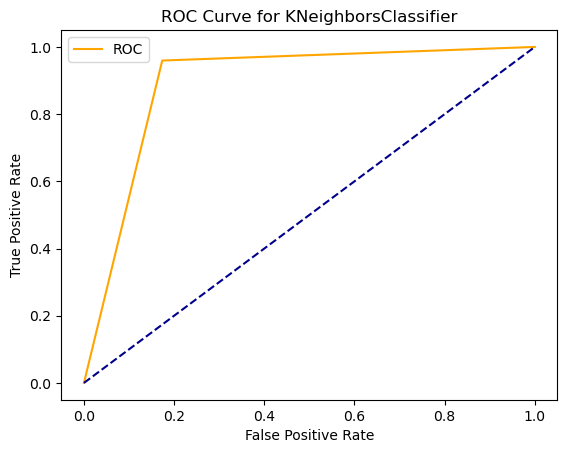

In [200]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend()
plt.show()

# 

# 

### GradientBoostingClassifier

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
cls_gb = GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3)

In [203]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

In [204]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.9879187259747392


In [205]:
y_pred = cls_gb.predict(x_test)

In [206]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8879736408566722


In [207]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[275,  36],
       [ 32, 264]], dtype=int64)

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       311
           1       0.88      0.89      0.89       296

    accuracy                           0.89       607
   macro avg       0.89      0.89      0.89       607
weighted avg       0.89      0.89      0.89       607



### Cross-validation

In [209]:
from sklearn.model_selection import KFold, cross_val_score

In [210]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.89589041, 0.92032967, 0.87087912, 0.9010989 , 0.90934066])

In [211]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.9000572030709018

In [212]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.81967213, 0.86065574, 0.89256198, 0.82644628, 0.82644628])

In [213]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.9006066536203523

### ROC Curve

In [214]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [215]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89189189 1.        ]
False Positive rate =  [0.         0.11575563 1.        ]


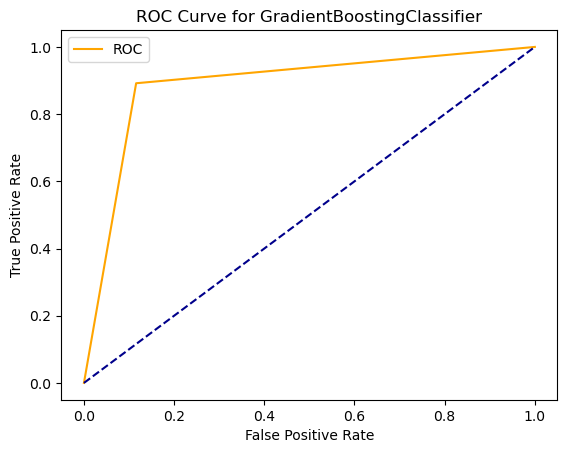

In [216]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [217]:
from sklearn.ensemble import BaggingClassifier

In [218]:
bag4 = BaggingClassifier(GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3))

In [219]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [220]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.985172981878089


In [221]:
y_pred = bag4.predict(x_test)

In [222]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.9044481054365733


In [223]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[285,  26],
       [ 32, 264]], dtype=int64)

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       311
           1       0.91      0.89      0.90       296

    accuracy                           0.90       607
   macro avg       0.90      0.90      0.90       607
weighted avg       0.90      0.90      0.90       607



### Cross-validation

In [225]:
from sklearn.model_selection import KFold, cross_val_score

In [226]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.91780822, 0.90934066, 0.9010989 , 0.90934066, 0.94230769])

In [227]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.911592653921421

In [228]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.82786885, 0.83606557, 0.89256198, 0.82644628, 0.85950413])

In [229]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.9088378744543129

### ROC Curve

In [230]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [231]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89189189 1.        ]
False Positive rate =  [0.         0.08360129 1.        ]


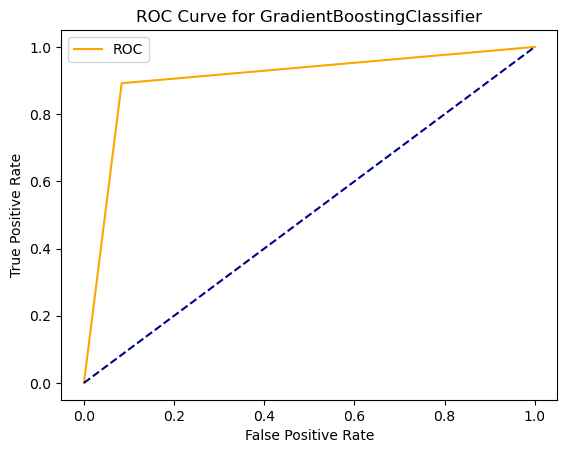

In [232]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend()
plt.show()

# 

### Support Vector Classifier

In [233]:
from sklearn.svm import SVC

In [234]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [235]:
cls_SVC = SVC(kernel='linear',C=500, gamma=20)

In [236]:
cls_SVC.fit(x_train, y_train)

SVC(C=500, gamma=20, kernel='linear')

In [237]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.8270181219110379


In [238]:
y_pred = cls_SVC.predict(x_test)

In [239]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8105436573311368


In [240]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[250,  61],
       [ 54, 242]], dtype=int64)

In [241]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       311
           1       0.80      0.82      0.81       296

    accuracy                           0.81       607
   macro avg       0.81      0.81      0.81       607
weighted avg       0.81      0.81      0.81       607



### Cross-validation

In [242]:
from sklearn.model_selection import KFold, cross_val_score

In [243]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.79452055, 0.83241758, 0.83241758, 0.7967033 , 0.8489011 ])

In [244]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.8209920216769531

In [245]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.76229508, 0.83606557, 0.79338843, 0.80991736, 0.80991736])

In [246]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.8023167592467146

### ROC Curve

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [248]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81756757 1.        ]
False Positive rate =  [0.         0.19614148 1.        ]


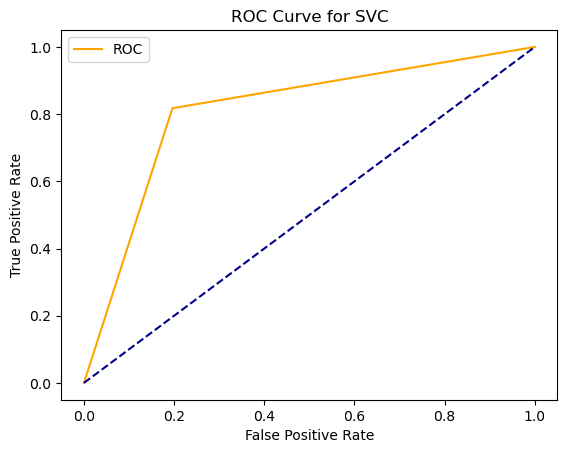

In [249]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to SVC

In [250]:
from sklearn.ensemble import BaggingClassifier

In [251]:
bag5 = BaggingClassifier(SVC(kernel='linear',C=500, gamma=20))

In [252]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=500, gamma=20, kernel='linear'))

In [253]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8308621636463481


In [254]:
y_pred = bag5.predict(x_test)

In [255]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8023064250411862


In [256]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[251,  60],
       [ 60, 236]], dtype=int64)

In [257]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       311
           1       0.80      0.80      0.80       296

    accuracy                           0.80       607
   macro avg       0.80      0.80      0.80       607
weighted avg       0.80      0.80      0.80       607



### Cross-validation

In [258]:
from sklearn.model_selection import KFold, cross_val_score

In [259]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.79726027, 0.82967033, 0.82967033, 0.79945055, 0.8543956 ])

In [260]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.8187957248231219

In [261]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.75409836, 0.82786885, 0.78512397, 0.83471074, 0.83471074])

In [262]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.8215429775703746

### ROC Curve

In [263]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [264]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.7972973 1.       ]
False Positive rate =  [0.         0.19292605 1.        ]


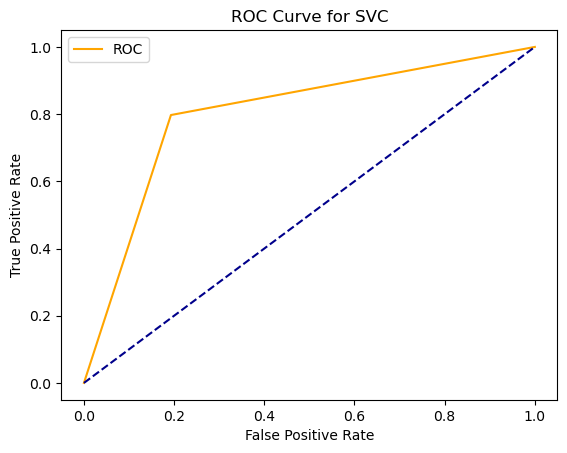

In [265]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend()
plt.show()

# 

### GaussianNB

In [266]:
from sklearn.naive_bayes import GaussianNB

In [267]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [268]:
gnb = GaussianNB(var_smoothing=1e-09)

In [269]:
gnb.fit(x_train, y_train)

GaussianNB()

In [270]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.7940691927512356


In [271]:
y_pred = gnb.predict(x_test)

In [272]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7759472817133443


In [273]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[231,  80],
       [ 56, 240]], dtype=int64)

In [274]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       311
           1       0.75      0.81      0.78       296

    accuracy                           0.78       607
   macro avg       0.78      0.78      0.78       607
weighted avg       0.78      0.78      0.78       607



### Cross-validation

In [275]:
from sklearn.model_selection import KFold, cross_val_score

In [276]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.78630137, 0.76648352, 0.76373626, 0.82142857, 0.8021978 ])

In [277]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.7880295047418334

In [278]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.74590164, 0.79508197, 0.76033058, 0.7768595 , 0.81818182])

In [279]:
cross_val_score (gnb, x_test, y_test, cv=5).mean()

0.7792711014767647

### ROC Curve

In [280]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [281]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81081081 1.        ]
False Positive rate =  [0.         0.25723473 1.        ]


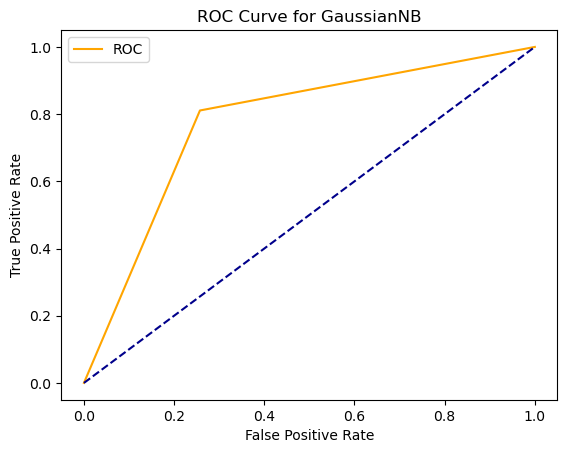

In [282]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [283]:
from sklearn.ensemble import BaggingClassifier

In [284]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [285]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [286]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.7962657880285557


In [287]:
y_pred = bag6.predict(x_test)

In [288]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7808896210873146


In [289]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[234,  77],
       [ 56, 240]], dtype=int64)

In [290]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       311
           1       0.76      0.81      0.78       296

    accuracy                           0.78       607
   macro avg       0.78      0.78      0.78       607
weighted avg       0.78      0.78      0.78       607



### Cross-validation

In [291]:
from sklearn.model_selection import KFold, cross_val_score

In [292]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.78630137, 0.76373626, 0.76648352, 0.82142857, 0.8021978 ])

In [293]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.7891299111847057

In [294]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.74590164, 0.80327869, 0.74380165, 0.79338843, 0.82644628])

In [295]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.7869321089869035

### ROC Curve

In [296]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [297]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.81081081 1.        ]
False Positive rate =  [0.         0.24758842 1.        ]


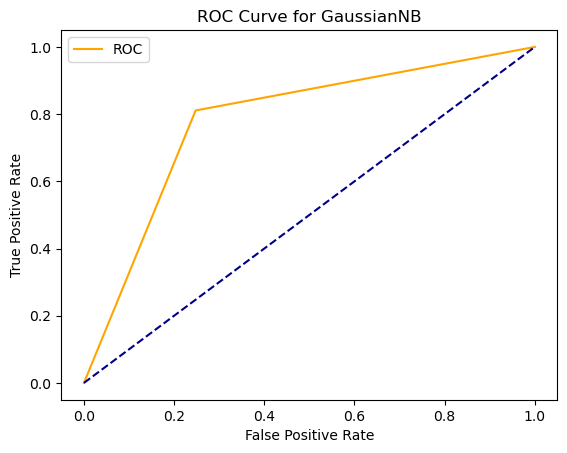

In [298]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend()
plt.show()

# 

### Best Model

### BaggingClassifier to RandomForestClassifier

### Reasons:-
#### 1) BaggingClassifier to RandomForestClassifier has the higher test score. 
#### 2) The difference between the Accuracy of Training data & Testing data is very less.
#### 3) The difference between the Cross Validation mean score of Training & Testing data is least. 
#### 4) The difference between the Accuracy Testing data & Cross Validation mean score of Testing data is less to. 
#### 5) Hence, Lasso Regression is the best model.

### Applying BaggingClassifier to RandomForestClassifier

In [153]:
from sklearn.ensemble import BaggingClassifier

In [154]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=16))

In [155]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=450))

In [156]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9780340472267984


In [157]:
y_pred = bag2.predict(x_test)

In [158]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.899505766062603


In [159]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[283,  28],
       [ 33, 263]], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       311
           1       0.90      0.89      0.90       296

    accuracy                           0.90       607
   macro avg       0.90      0.90      0.90       607
weighted avg       0.90      0.90      0.90       607



### Cross-validation

In [161]:
from sklearn.model_selection import KFold, cross_val_score

In [162]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.90684932, 0.91483516, 0.88461538, 0.92582418, 0.93406593])

In [163]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.918177028451001

In [164]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.81967213, 0.86885246, 0.88429752, 0.80991736, 0.85123967])

In [165]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.913784434743339

### ROC Curve

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [167]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.88851351 1.        ]
False Positive rate =  [0.         0.09003215 1.        ]


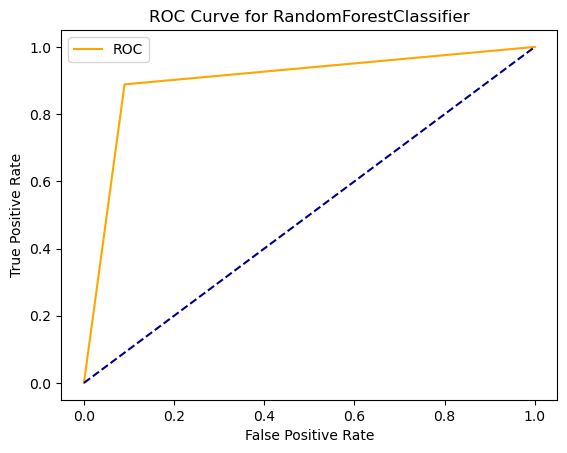

In [168]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend()
plt.show()

# 

# 

### Saving the Best Model

In [324]:
import pickle 

In [325]:
with open('model_bagrf', 'wb') as f: 
    pickle.dump(bag2, f)

# 

# 